<h1>Sustainable Energy Transitions</h1>
<div>A project by <a href="http://www.ssgouridis.org" target="_blank" >Sgouris Sgouridis</a> and <a href="http://www.csaladen.es" target="_blank" >Dénes Csala</a> at <a  href="http://www.masdar.ac.ae" target="_blank">Masdar Institute of Science and Technology</a></div>
<h2><br>Plotting notebook</h2>

This workbook will guide you through the mining, processing, formatting and saving the input data for the <a target="_blank" href="http://set.csaladen.es/set2.html">SET 2.0</a> model.
</p>
<p>This is document has been created using  <a target="_blank" href="http://ipython.org/">IPython Notebook</a> in the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution and it can be edited and run in <i>active</i> mode by clicking download in top right corner of this page. The code is partitioned into sections, called <i>cells</i>. When you are using this workbook in <i>active</i> mode, double-click on a cell to edit it and then run using <code>Ctrl + Enter</code>. Hitting <code>Shift + Enter</code> runs the code and steps into the next cell, while <code>Alt + Enter</code> runs the code and adds a new, empty cell. If you are running this notebook on a presonal computer, you will need a machine with at least <i>1GB</i> of memory (<i>2GB</i> recommended) and a processor of <i>1GHz</i>.
<h2>Data</h2>
<p>The major data sources for this work are the <a href="http://set.csaladen.es/data/results/index.html" target="_blank">outputs</a> generated by the SET 2.0 model.
</p>
<h2>Processing</h2>
<p>The data processing has been done using the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution of <a target="_blank" href="https://www.python.org/">Python 2.7</a> using the <i>IPython Notebook</i> editor. If you have not generated your own data, please download <a href="http://set.csaladen.es/data/results/index.html" target="_blank">all</a> results files, and run this <i>Iptyhon</i> notebook in the same folder. Then the data is loaded into a <a target="_blank" href="http://pandas.pydata.org/">pandas</a> dataframe, which represents the backbone of the data analysis. Numerical processing is done with <a target="_blank" href="http://www.numpy.org/">NumPy</a> and for plotting we use <a target="_blank" href="http://matplotlib.org/">matplotlib</a>. Please make sure you have all of these compoents set up in your <i>Python</i> installation. The workbook generates <i>.jpg</i> files to be inlcuded on the <a target="_blank" href="http://set.csaladen.es/">main</a> data presentation site.
</p>

<h1>Code</h1>

Import dependencies.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
mycolors=['#dd1c77','#df65b0','#980043']
abc='abcdefghijklmnopqrstuvwxyz' #for plot labeling

#GDP

In [3]:
import zipfile
gdp=pd.read_csv(zipfile.ZipFile('E:\Dropbox (MIT)\Public\Food-Energy\db\WDI_csv.zip').open('WDI_Data.csv'))

Set up save path on your local computer.

In [4]:
path="E:\Skydrive\GitHub\set"

In [6]:
gdp=gdp.drop(['Indicator Code','Country Name'],axis=1).set_index(['Indicator Name','Country Code'])

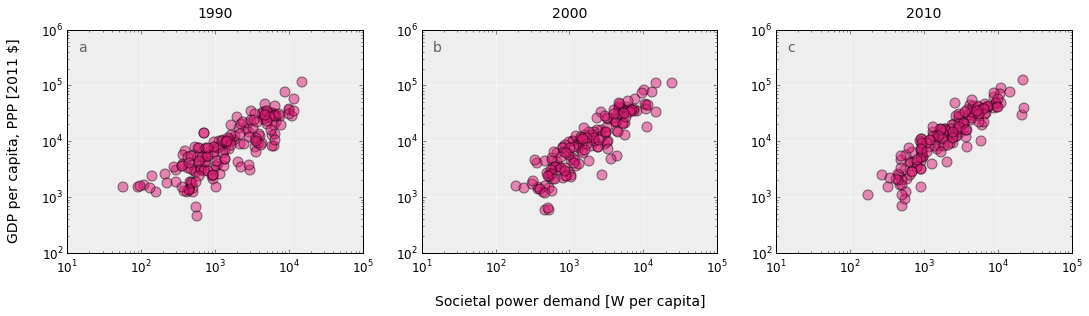

In [312]:
years=[1990,2000,2010]
fig, ax = plt.subplots(1,3,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(18,4))
    
for k in range(len(years)):
    labels={}    
    year=repr(years[k])
    for i in gdp.loc['Energy use (kg of oil equivalent per capita)'][year].T.iteritems():
        if not np.isnan(i[1]):
            if i[0] not in labels: labels[i[0]]=[]
            labels[i[0]].append(i[1]*11.63*1000/8760)
    for i in gdp.loc['GDP per capita, PPP (constant 2011 international $)'][year].T.iteritems():
    #for i in gdp.loc['GDP per capita (current US$)'][year].T.iteritems():
        if i[0] in labels:
            if not np.isnan(i[1]):
                labels[i[0]].append(i[1])
            else:
                labels.pop(i[0])

    for i in labels:
        ax[k].scatter(labels[i][0],labels[i][1],100,alpha=0.5,c=mycolors[0])
        #ax[k].text(labels[i][0],labels[i][1],i,horizontalalignment='center',verticalalignment='center',size=12,color="w",alpha=0.5)
    ax[k].grid(color='white', linestyle='solid')
    ax[k].set_ylim(100,1000000)
    ax[k].set_xlim(10,100000)
    ax[k].set_yscale('log')
    ax[k].set_xscale('log')
    ax[k].set_title(year,size=14,y=1.03)
    ax[k].tick_params(labelsize=12) 
    
    ax[k].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k].transAxes,size=14,alpha=0.6)        
    
ax[1].set_xlabel('Societal power demand [W per capita]',size=14,labelpad=20)
ax[0].set_ylabel('GDP per capita, PPP [2011 $]',size=14,labelpad=20)
plt.savefig(path+'/plots/gdp.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/gdp.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

#Demand

In [7]:
df=pd.read_excel('data/results/demand.xlsx')
sets={}
for i in df.T.iteritems():
    if 'Demand' in repr(i[1][0]):
        l=i[1][0]
        sets[i[1][0]]=[[],[]]
    else: 
        sets[l][0].append(i[1][0])
        sets[l][1].append(i[1][1])
pop=pd.read_excel('data/parameters/pop.xlsx',header=None).set_index(0)

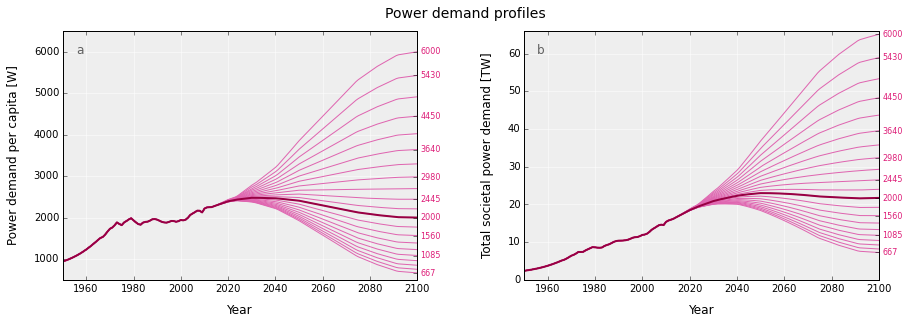

In [63]:
fig, axis = plt.subplots(1,2,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(12,4))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.3)

ax=axis[0]
for i in sets:
    if i in {'Demand 2000'}:c=1
    else: c=1
    ax.plot(sets[i][0],sets[i][1],color=mycolors[1],linewidth=c)
ax.plot(sets['Demand 2000'][0],sets['Demand 2000'][1],color=mycolors[2],linewidth=2)
ax.grid(color='white', linestyle='solid')
ax.set_xlim(1950,2100)
ax.set_ylim(500,6500)
ax.tick_params(labelsize=10) 
ax.set_xlabel('Year',size=12,labelpad=10)
ax.set_ylabel('Power demand per capita [W]',size=12,labelpad=14)
ax2=ax.twinx()
ax2.tick_params(labelsize=10) 
ax2.set_ylim(500,6500)
ax2.set_yticks([667,1085,1560,2000,2445,2980,3640,4450,5430,6000])
ax2.set_yticklabels([667,1085,1560,2000,2445,2980,3640,4450,5430,6000],size=8,color=mycolors[0])

ax=axis[1]
for i in sets:
    if i in {'Demand 2000'}:c=1
    else: c=1
    y=[sets[i][1][j]*pop.loc[sets[i][0][j]].values[0]/1e6 for j in range(len(sets[i][0]))]
    ax.plot(sets[i][0],y,color=mycolors[1],linewidth=c)
y=[sets['Demand 2000'][1][i]*pop.loc[sets['Demand 2000'][0][i]].values[0]/1e6 for i in range(len(sets['Demand 2000'][0]))]
ax.plot(sets['Demand 2000'][0],y,color=mycolors[2],linewidth=2)
ax.grid(color='white', linestyle='solid')
ax.set_xlim(1950,2100)
ax.set_ylim(0,66)
ax.tick_params(labelsize=10) 
ax.set_xlabel('Year',size=12,labelpad=10)
ax.set_ylabel('Total societal power demand [TW]',size=12,labelpad=14)
ax2=ax.twinx()
ax2.tick_params(labelsize=10) 
ax2.set_ylim(0,66)
ax2.set_yticks(np.array([6.67,10.85,15.60,20.00,24.45,29.80,36.40,44.50,54.30,60.00])*pop.loc[2100].values[0]/10000.0)
ax2.set_yticklabels([667,1085,1560,2000,2445,2980,3640,4450,5430,6000],size=8,color=mycolors[0])

for k in range(2):
    axis[k].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=axis[k].transAxes,size=12,alpha=0.6)

plt.suptitle('Power demand profiles',size=14,y=1.03)
plt.savefig(path+'/plots/demand.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/demand.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

#Fossil

In [5]:
df=pd.read_excel('data/results/fossil.xlsx')
sets={}
for i in df.T.iteritems():
    if 'Demand' in repr(i[1][0]):
        l=i[1][0]
        sets[i[1][0]]=[[],[]]
    else: 
        sets[l][0].append(i[1][0])
        sets[l][1].append(i[1][1])
titless=[['Fossil phase-out: 2015 - 2050',\
        'Fossil phase-out: 2015 - 2080',\
        'Fossil phase-out: 2020 - 2040'],\
        ['Fossil phase-out: 2020 - 2075',\
        'Fossil phase-out: 2020 - 2100',\
        'Fossil phase-out: 2030 - 2060'],\
        ['Fossil phase-out: 2025 - 2100',\
        'Fossil phase-out: 2025 - 2130',\
        'Fossil phase-out: 2040 - 2080']]
caps=[r"Emissions cap: 510 GtCO$_2$",r"Emissions cap: 990 GtCO$_2$",r"Emissions cap: 1505 GtCO$_2$"]
trans=["Early","Fuel switch","Late"]

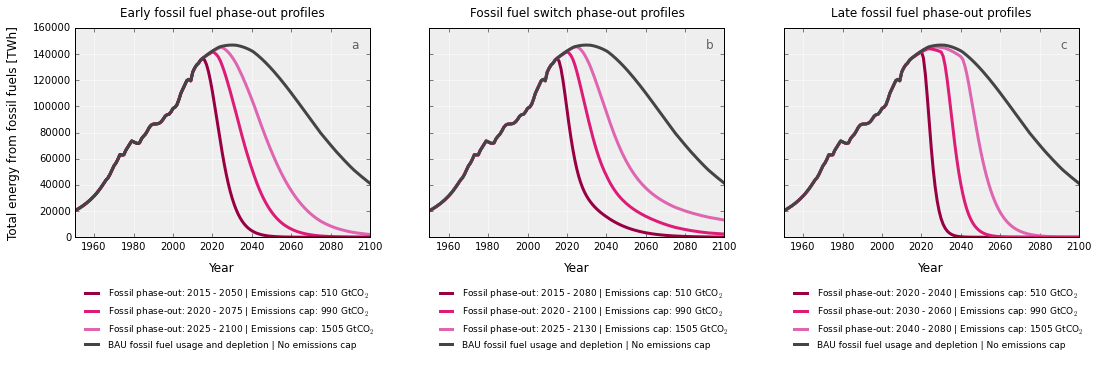

In [158]:
#fig, axis = plt.subplots(1,3,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(18,4))
fig = plt.figure(figsize=(18,6))                                                               
axis=[]
axis.append(plt.subplot2grid((3,3), (0,0), rowspan=2, axisbg='#EEEEEE',axisbelow=True))
axis.append(plt.subplot2grid((3,3), (0,1), rowspan=2, axisbg='#EEEEEE',axisbelow=True))
axis.append(plt.subplot2grid((3,3), (0,2), rowspan=2, axisbg='#EEEEEE',axisbelow=True))
axis.append(plt.subplot2grid((3,3), (2,0), axisbg=None,axisbelow=True))
axis.append(plt.subplot2grid((3,3), (2,1), axisbg=None,axisbelow=True))
axis.append(plt.subplot2grid((3,3), (2,2), axisbg=None,axisbelow=True))
fig.subplots_adjust(hspace=0.5)

for i in range(3):
    axis[i+3].plot([0],[0],color='#980043',linewidth=3,label=titless[0][i]+' | '+caps[0])
    axis[i+3].plot([0],[0],color='#dd1c77',linewidth=3,label=titless[1][i]+' | '+caps[1])
    axis[i+3].plot([0],[0],color='#df65b0',linewidth=3,label=titless[2][i]+' | '+caps[2])
    axis[i+3].plot([0],[0],color='#444444',linewidth=3,label='BAU fossil fuel usage and depletion | No emissions cap')
    axis[i+3].set_axis_off()
    
k=0
for i in np.sort(list(sets.keys())):
    k+=1 
    if k in {10,3,7}: a=0
    elif k in {1,4,8}: a=2
    elif k in {2,5,9}: a=1
    else: continue
    ax=axis[a]
       
    if k in {7,8,9}: d="#dd1c77"
    elif k in {10,1,2}: d="#980043"
    elif k in {3,4,5}: d="#df65b0"
    
    ax.plot(sets[i][0],sets[i][1],color=d,linewidth=3)

for i in range(3):
    axis[i].plot(sets['Demand 2000'][0],sets['Demand 2000'][1],color='#444444',linewidth=3)
    axis[i].grid(color='white', linestyle='solid')
    axis[i].set_xlim(1950,2100)
    #axis[i].set_ylim(0,180000)
    axis[i].tick_params(labelsize=10) 
    axis[i].set_xlabel('Year',size=12,labelpad=10)
    if i!=0:
        axis[i].set_yticklabels([])
    axis[i+3].legend(loc=2,framealpha=0,fontsize=9)
    axis[i].text(0.94, 0.95, abc[i],
    horizontalalignment='left',
    verticalalignment='top',
    transform=axis[i].transAxes,size=12,alpha=0.6)

axis[0].set_title('Early fossil fuel phase-out profiles',size=12,y=1.03)
axis[1].set_title('Fossil fuel switch phase-out profiles',size=12,y=1.03)
axis[2].set_title('Late fossil fuel phase-out profiles',size=12,y=1.03)     
axis[0].set_ylabel('Total energy from fossil fuels [TWh]',size=12,labelpad=14)    

plt.savefig(path+'/plots/fossil.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=100)
plt.savefig(path+'/plots_highres/fossil.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

#Sensitivity

In [6]:
#plots setup

demand=10 #demand bracket
eroei=9 #eroei bracket
D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

colors='Spectral_r'
bases=[7,10,13]
shares=["6.1","3.2","10.1"]

order=[3,5,4,0,2,1,6,8,7]

lifetime=25
moving_window=10

#Read data

In [7]:
DF={}
DF2={}
DF3={}
for k in range(len(order)):
    i=order[k]+7
    DF[k]=pd.read_excel('data/results/results'+repr(i)+'.xlsx',sheetname=1,header=None)
    DF2[k]=pd.read_excel('data/results/results'+repr(i)+'.xlsx',sheetname=2,header=None)
    DF3[k]=pd.read_excel('data/results/results'+repr(i)+'.xlsx',sheetname=0,header=None)

#Demand plots

Demand Rates

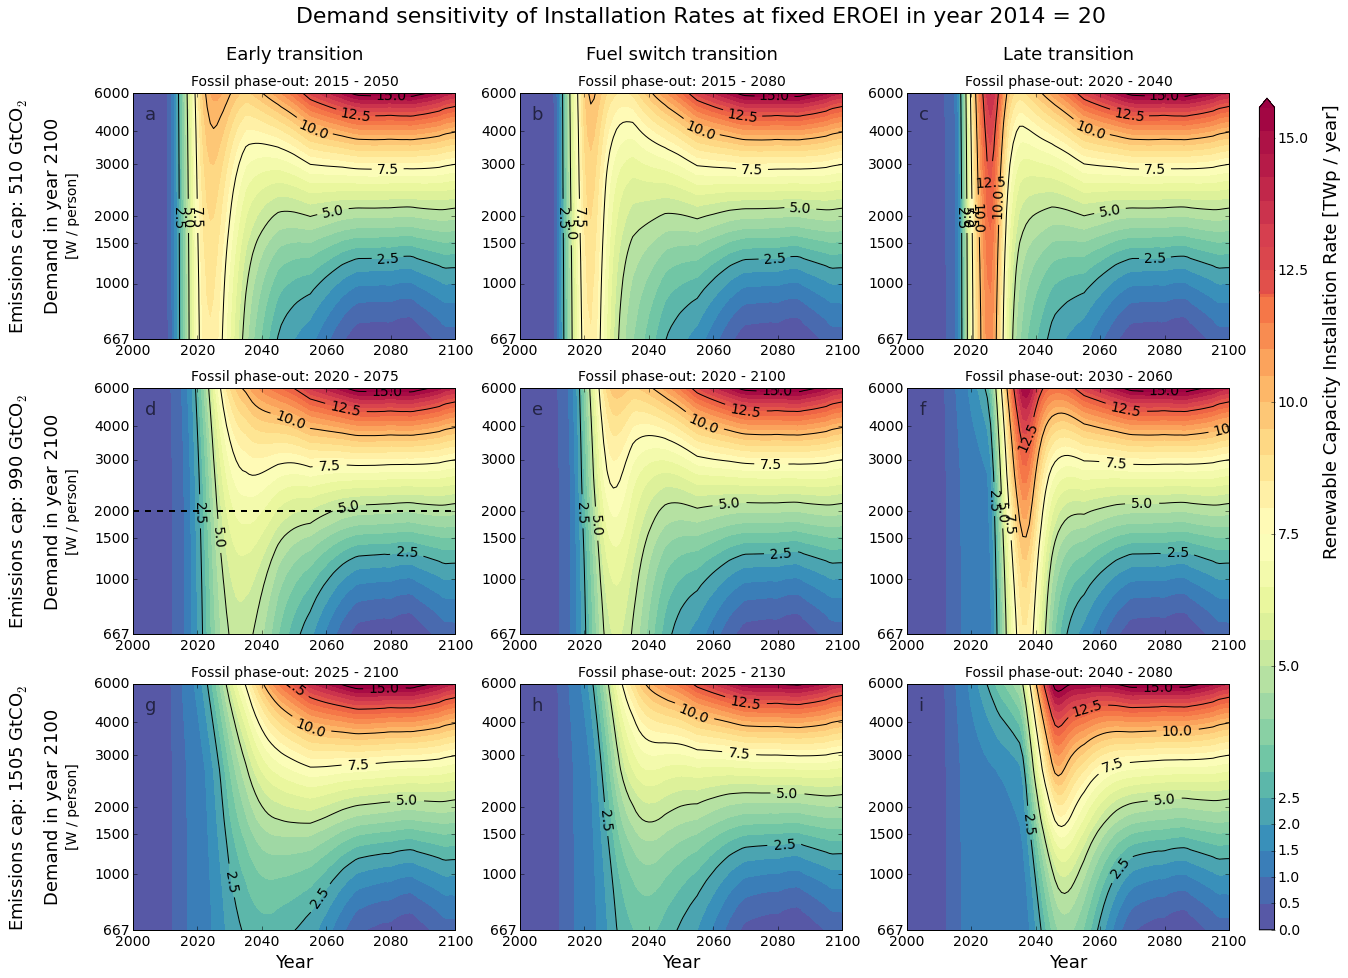

In [41]:
eroei=9 #eroei bracket
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig, ax=plt.subplots(3,3,figsize=(21,15))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df2=df2[df2.columns[eroei::21]]
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]
    
    #modified
    #a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
    #a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
    #original
    #a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='max')
    #new
    a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='max')
    b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
    ax[k/3][k%3].set_ylim(1,21)
    ax[k/3][k%3].set_xlim(0,100)
    ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[k/3][k%3].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[k/3][k%3].set_yticklabels(tick1,size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('[W / person]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.22, 0.5, 'Demand in year 2100',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Renewable Capacity Installation Rate [TWp / year]',
        horizontalalignment='center',
        verticalalignment='top',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.770])
        fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
        cbar_ax.tick_params(labelsize=14) 
        cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
        fig.colorbar(a2, cax=cbar_ax, ticks=[])
        cbar_ax.tick_params(labelsize=14)
        cbar_ax.text(0.45, -0.005, '_',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=cbar_ax.transAxes,size=27,color="#e34e49")
        cbar_ax.text(0.45, 0, '_',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=cbar_ax.transAxes,size=27,color="#e34e49")

ax[1][0].plot([11 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand sensitivity of Installation Rates at fixed EROEI in year 2014 = '+repr(E),size=22)
plt.savefig(path+'/plots_highres/Demand_Sensitivity_Rates_EROEI'+repr(E)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All parser Demand Rates

In [221]:
for eroei in range(21):

    E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

    vi=0
    vx=15.0
    vx2=35.0
    lev=vx/2.5+1
    lev2=(vx2-vx)/2.5+1
    lev=vx/2.5+1
    fig, ax=plt.subplots(3,3,figsize=(21,15))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF[k].copy()
        df=df[df.columns[eroei::21]]
        df.index=range(1950,2111)
        df2=DF2[k].copy()
        df2.index=range(1950,2111)
        df2=df2[df2.columns[eroei::21]]
        df+=df2/lifetime
        df=pd.rolling_mean(df,moving_window,center=True) 
        df=df.loc[2001:2101]

        a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
        a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
        b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
        ax[k/3][k%3].set_ylim(1,21)
        ax[k/3][k%3].set_xlim(0,100)
        ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
        ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
        ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
        ax[k/3][k%3].set_yticks(ticks)
        tick1=[667,1000,1500,2000,3000,4000,6000]
        ax[k/3][k%3].set_yticklabels(tick1,size=14)
        if (k/3==2):
            ax[k/3][k%3].set_xlabel('Year',size=18)
        if (k%3==0):
            ax[k/3][k%3].set_ylabel('[W / person]',size=14,labelpad=15)
            ax[k/3][k%3].text(-0.22, 0.5, 'Demand in year 2100',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
            ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        if (k/3==0):
            ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
        if (k==2):
            ax[k/3][k%3].text(1.32, 0.95, 'Renewable Capacity Installation Rate [TWp / year]',
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
            fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
            cbar_ax.tick_params(labelsize=14) 
            cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
            fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
            cbar_ax.tick_params(labelsize=14)

    plt.suptitle('Demand sensitivity of Installation Rates at fixed EROEI in year 2014 = '+repr(E),size=22)
    plt.savefig(path+'/plots/Demand_Sensitivity_Rates_EROEI'+repr(E)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
    plt.close()

Demand Cumulative

In [96]:
colors='PiYG'

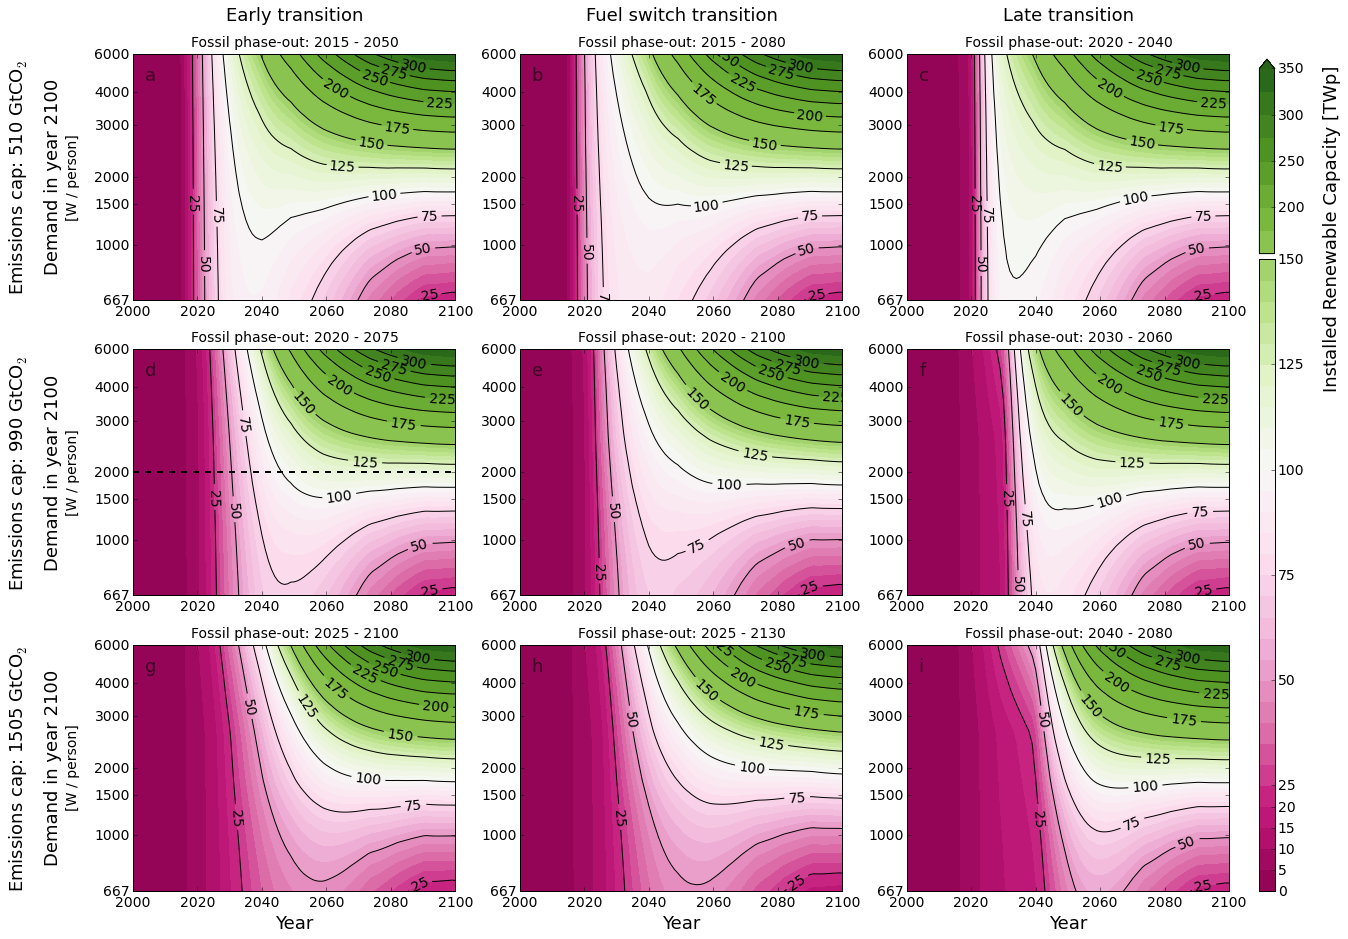

In [97]:
eroei=9 #eroei bracket
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=150
vx2=350
lev=vx/25+1
lev2=(vx2-vx)/25+1

fig, ax=plt.subplots(3,3,figsize=(21,15))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF2[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df=df.loc[2001:2101]
    
    a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
    a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
    b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(int),colors='k')
    ax[k/3][k%3].set_ylim(1,21)
    ax[k/3][k%3].set_xlim(0,100)
    ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[k/3][k%3].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[k/3][k%3].set_yticklabels(tick1,size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('[W / person]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.22, 0.5, 'Demand in year 2100',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Installed Renewable Capacity [TWp]',
        horizontalalignment='center',
        verticalalignment='top',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
        fig.colorbar(a, cax=cbar_ax, ticks=[0,5,10,15,20,25,50,75,100,125,150])
        cbar_ax.tick_params(labelsize=14) 
        cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
        fig.colorbar(a2, cax=cbar_ax, ticks=[200,250,300,350])
        cbar_ax.tick_params(labelsize=14) 

ax[1][0].plot([11 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
#plt.suptitle('Demand sensitivity of Installed Capacity at fixed EROEI in year 2014 = '+repr(E),size=22)
plt.savefig(path+'/plots_highres/Demand_Sensitivity_Cumulative_EROEI'+repr(E)+'_inv.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All parser Demand Cumulative

In [341]:
for eroei in range(21):

    E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

    vi=0
    vx=150
    vx2=350
    lev=vx/25+1
    lev2=(vx2-vx)/25+1

    fig, ax=plt.subplots(3,3,figsize=(21,15))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF2[k].copy()
        df=df[df.columns[eroei::21]]
        df.index=range(1950,2111)
        df=df.loc[2001:2101]

        a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
        a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
        b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(int),colors='k')
        ax[k/3][k%3].set_ylim(1,21)
        ax[k/3][k%3].set_xlim(0,100)
        ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
        ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
        ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
        ax[k/3][k%3].set_yticks(ticks)
        tick1=[667,1000,1500,2000,3000,4000,6000]
        ax[k/3][k%3].set_yticklabels(tick1,size=14)
        if (k/3==2):
            ax[k/3][k%3].set_xlabel('Year',size=18)
        if (k%3==0):
            ax[k/3][k%3].set_ylabel('[W / person]',size=14,labelpad=15)
            ax[k/3][k%3].text(-0.22, 0.5, 'Demand in year 2100',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
            ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        if (k/3==0):
            ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
        if (k==2):
            ax[k/3][k%3].text(1.32, 0.95, 'Installed Renewable Capacity [TWp]',
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
            fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,5,10,15,20,25,50,75,100,125,150])
            cbar_ax.tick_params(labelsize=14) 
            cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
            fig.colorbar(a2, cax=cbar_ax, ticks=[200,250,300,350])
            cbar_ax.tick_params(labelsize=14)

    plt.suptitle('Demand sensitivity of Installed Capacity at fixed EROEI in year 2014 = '+repr(E),size=22)
    plt.savefig(path+'/plots/Demand_Sensitivity_Cumulative_EROEI'+repr(E)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
    plt.close()

Demand Epsilon

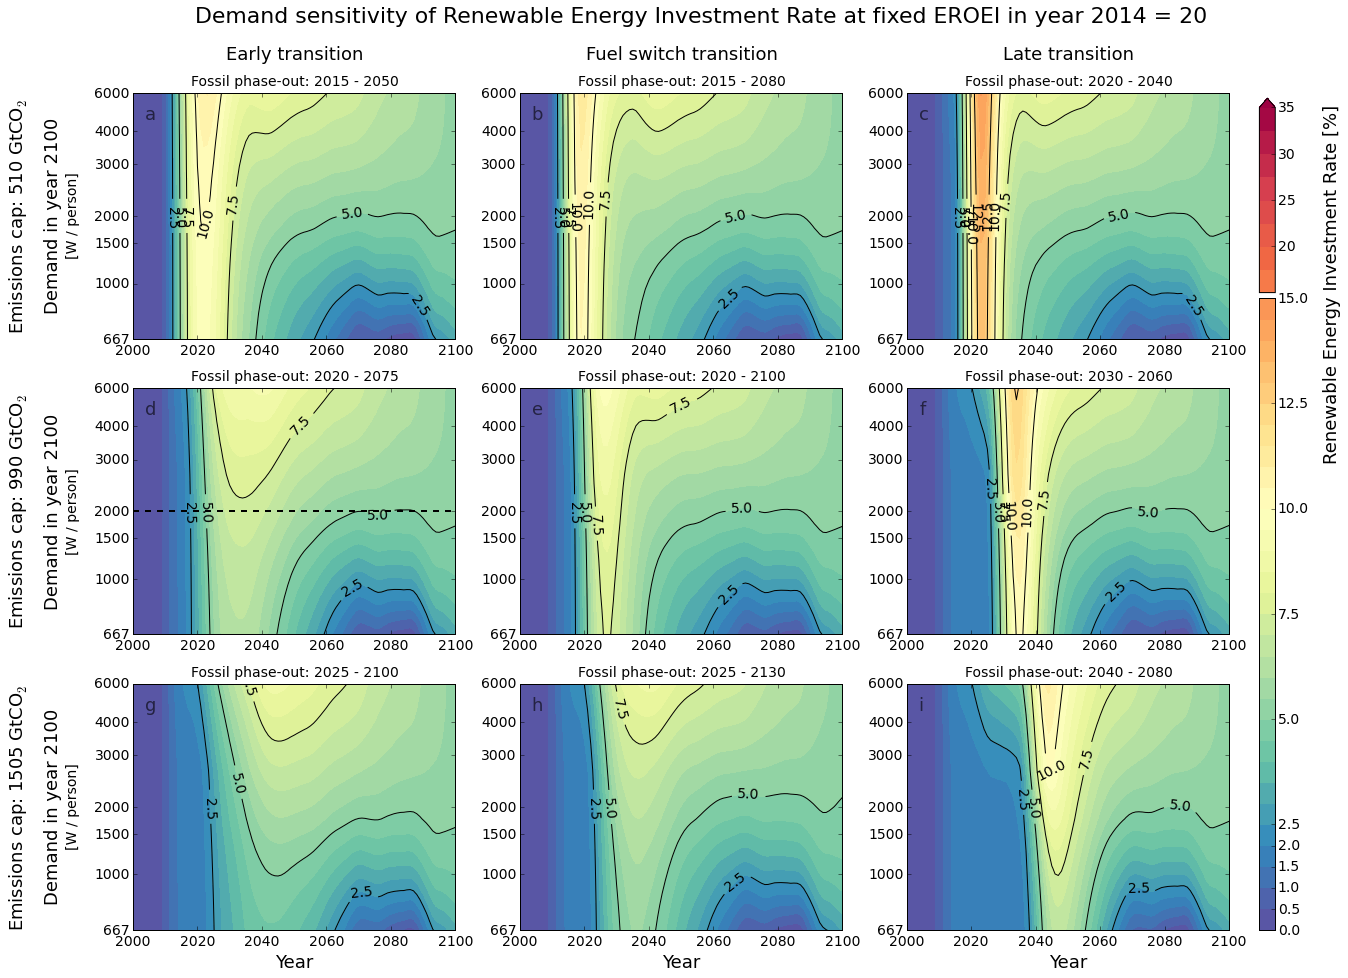

In [43]:
eroei=9 #eroei bracket
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1

fig, ax=plt.subplots(3,3,figsize=(21,15))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df=df.loc[2001:2101]
    
    a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
    a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
    b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
    ax[k/3][k%3].set_ylim(1,21)
    ax[k/3][k%3].set_xlim(0,100)
    ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[k/3][k%3].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[k/3][k%3].set_yticklabels(tick1,size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('[W / person]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.22, 0.5, 'Demand in year 2100',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Renewable Energy Investment Rate [%]',
        horizontalalignment='center',
        verticalalignment='top',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
        fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
        cbar_ax.tick_params(labelsize=14) 
        cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
        fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
        cbar_ax.tick_params(labelsize=14)

ax[1][0].plot([11 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand sensitivity of Renewable Energy Investment Rate at fixed EROEI in year 2014 = '+repr(E),size=22)
plt.savefig(path+'/plots_highres/Demand_Sensitivity_Epsilon_EROEI'+repr(E)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All parser Demand Epsilon

In [225]:
for eroei in range(21):

    E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

    vi=0
    vx=15.0
    vx2=35.0
    lev=vx/2.5+1
    lev2=(vx2-vx)/2.5+1

    fig, ax=plt.subplots(3,3,figsize=(21,15))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF3[k].copy()
        df=df[df.columns[eroei::21]]
        df.index=range(1950,2111)
        df=df.loc[2001:2101]

        a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
        a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
        b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
        ax[k/3][k%3].set_ylim(1,21)
        ax[k/3][k%3].set_xlim(0,100)
        ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
        ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
        ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
        ax[k/3][k%3].set_yticks(ticks)
        tick1=[667,1000,1500,2000,3000,4000,6000]
        ax[k/3][k%3].set_yticklabels(tick1,size=14)
        if (k/3==2):
            ax[k/3][k%3].set_xlabel('Year',size=18)
        if (k%3==0):
            ax[k/3][k%3].set_ylabel('[W / person]',size=14,labelpad=15)
            ax[k/3][k%3].text(-0.22, 0.5, 'Demand in year 2100',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
            ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        if (k/3==0):
            ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
        if (k==2):
            ax[k/3][k%3].text(1.32, 0.95, 'Renewable Energy Investment Rate [%]',
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
            fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
            cbar_ax.tick_params(labelsize=14) 
            cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
            fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
            cbar_ax.tick_params(labelsize=14) 

    plt.suptitle('Demand sensitivity of Renewable Energy Investment Rate at fixed EROEI in year 2014 = '+repr(E),size=22)
    plt.savefig(path+'/plots/Demand_Sensitivity_Epsilon_EROEI'+repr(E)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
    plt.close()

#EROEI plots

EROEI Rates

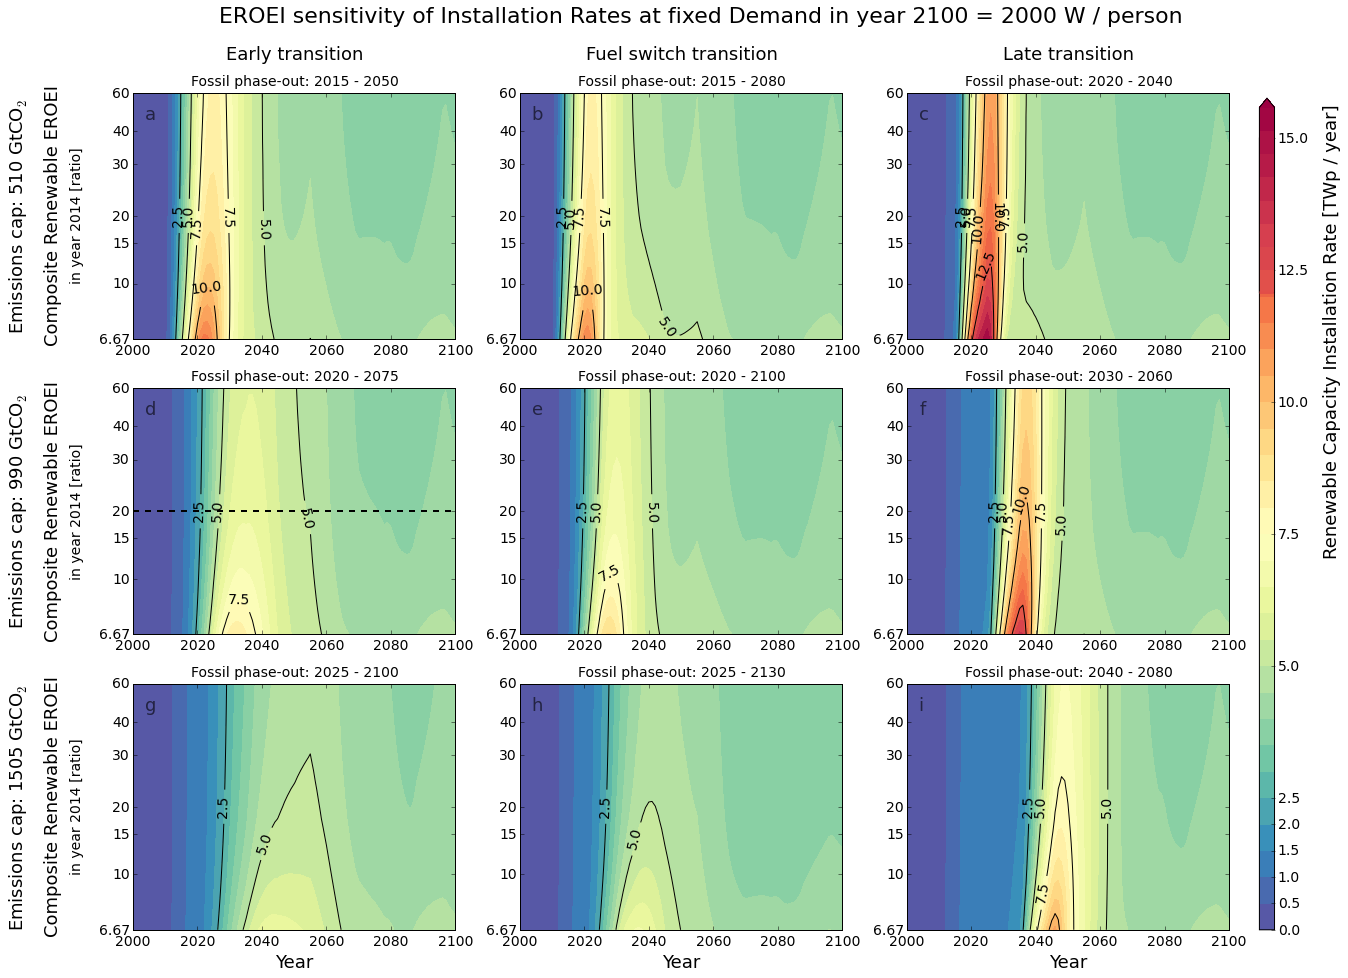

In [47]:
demand=10 #demand bracket
D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig, ax=plt.subplots(3,3,figsize=(21,15))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF[k].copy()[range(demand*21,(demand+1)*21)]
    df.index=range(1950,2111)
    df2=DF2[k].copy()[range(demand*21,(demand+1)*21)]
    df2.index=range(1950,2111)
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]
    
    #modified
    #a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
    #a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
    #original
    #a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='max')
    #new
    a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='max')
    b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
    ax[k/3][k%3].set_ylim(0,20)
    ax[k/3][k%3].set_xlim(0,100)
    ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    ticks=[0,4.5,7.8,10,14.2,16.9,20]
    ax[k/3][k%3].set_yticks(ticks)
    tick1=[6.67,10,15,20,30,40,60]
    ax[k/3][k%3].set_yticklabels(tick1,size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
        ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Renewable Capacity Installation Rate [TWp / year]',
        horizontalalignment='center',
        verticalalignment='top',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.770])
        fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
        cbar_ax.tick_params(labelsize=14) 
        cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
        fig.colorbar(a2, cax=cbar_ax, ticks=[])
        cbar_ax.tick_params(labelsize=14)
        cbar_ax.text(0.45, -0.005, '_',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=cbar_ax.transAxes,size=27,color="#e34e49")
        cbar_ax.text(0.45, 0, '_',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=cbar_ax.transAxes,size=27,color="#e34e49") 

ax[1][0].plot([10 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('EROEI sensitivity of Installation Rates at fixed Demand in year 2100 = '+repr(D)+' W / person',size=22)
plt.savefig(path+'/plots_highres/EROEI_Sensitivity_Rates_Demand'+repr(D)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All parser EROEI Rates

In [227]:
for demand in range(1,22):

    D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))

    vi=0
    vx=15.0
    vx2=35.0
    lev=vx/2.5+1
    lev2=(vx2-vx)/2.5+1
    fig, ax=plt.subplots(3,3,figsize=(21,15))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF[k].copy()[range(demand*21,(demand+1)*21)]
        df.index=range(1950,2111)
        df2=DF2[k].copy()[range(demand*21,(demand+1)*21)]
        df2.index=range(1950,2111)
        df+=df2/lifetime
        df=pd.rolling_mean(df,moving_window,center=True) 
        df=df.loc[2001:2101]

        a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
        a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
        b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
        ax[k/3][k%3].set_ylim(0,20)
        ax[k/3][k%3].set_xlim(0,100)
        ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
        ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
        ticks=[0,4.5,7.8,10,14.2,16.9,20]
        ax[k/3][k%3].set_yticks(ticks)
        tick1=[6.67,10,15,20,30,40,60]
        ax[k/3][k%3].set_yticklabels(tick1,size=14)
        if (k/3==2):
            ax[k/3][k%3].set_xlabel('Year',size=18)
        if (k%3==0):
            ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
            ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
            ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        if (k/3==0):
            ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
        if (k==2):
            ax[k/3][k%3].text(1.32, 0.95, 'Renewable Capacity Installation Rate [TWp / year]',
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
            fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
            cbar_ax.tick_params(labelsize=14) 
            cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
            fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
            cbar_ax.tick_params(labelsize=14) 
            
    plt.suptitle('EROEI sensitivity of Installation Rates at fixed Demand in year 2100 = '+repr(D)+' W / person',size=22)
    plt.savefig(path+'/plots/EROEI_Sensitivity_Rates_Demand'+repr(D)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
    plt.close()

EROEI Cumulative

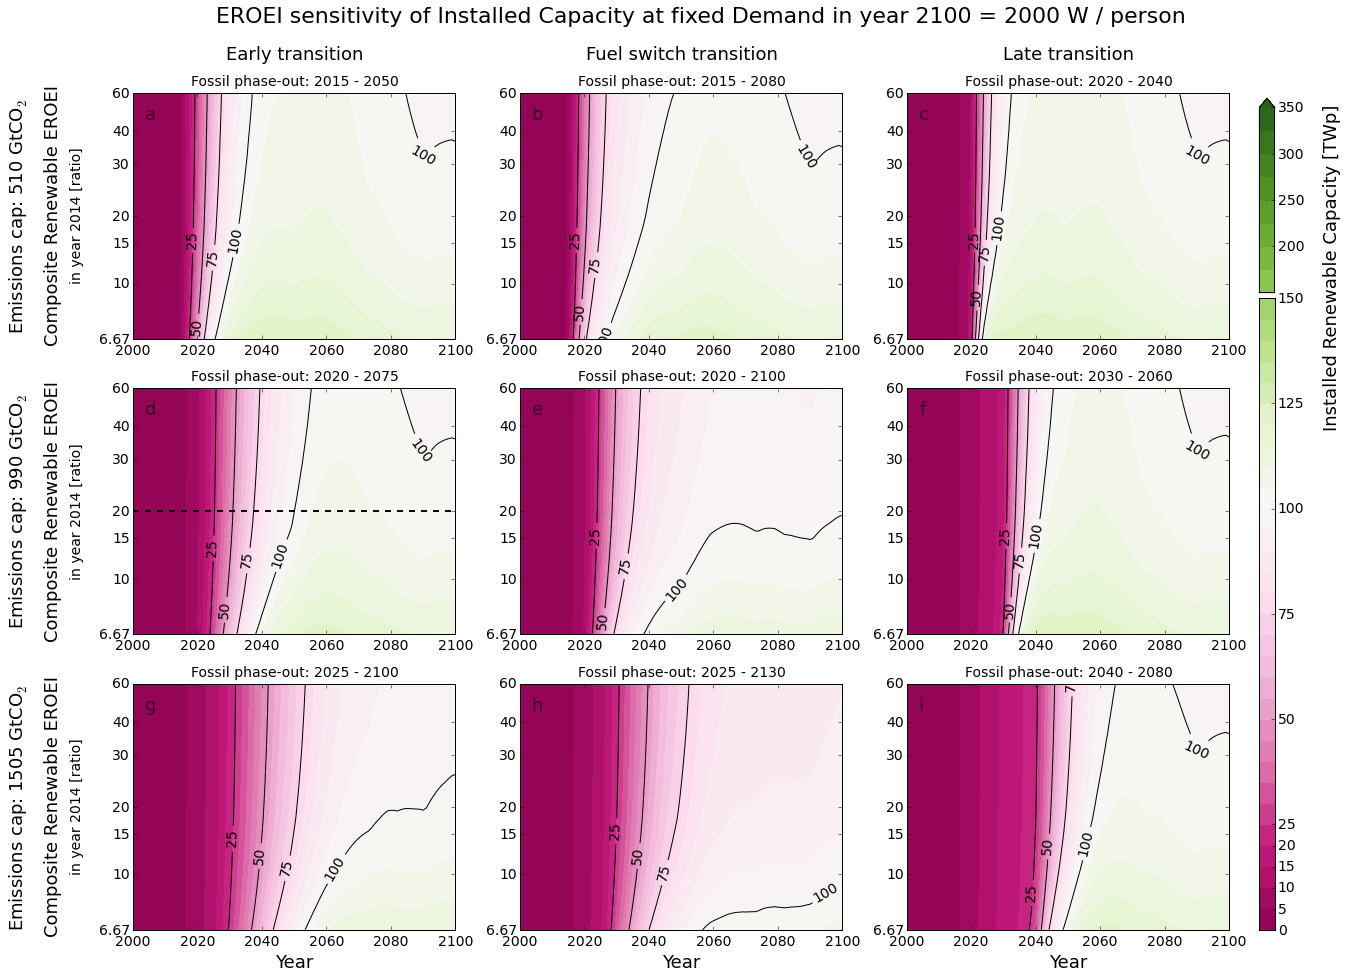

In [98]:
demand=10 #demand bracket
D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))

vi=0
vx=150
vx2=350
lev=vx/25+1
lev2=(vx2-vx)/25+1

fig, ax=plt.subplots(3,3,figsize=(21,15))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF2[k].copy()[range(demand*21,(demand+1)*21)]
    df.index=range(1950,2111)
    df=df.loc[2001:2101]
    
    a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
    a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
    b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(int),colors='k')
    ax[k/3][k%3].set_ylim(0,20)
    ax[k/3][k%3].set_xlim(0,100)
    ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    ticks=[0,4.5,7.8,10,14.2,16.9,20]
    ax[k/3][k%3].set_yticks(ticks)
    tick1=[6.67,10,15,20,30,40,60]
    ax[k/3][k%3].set_yticklabels(tick1,size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
        ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Installed Renewable Capacity [TWp]',
        horizontalalignment='center',
        verticalalignment='top',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
        fig.colorbar(a, cax=cbar_ax, ticks=[0,5,10,15,20,25,50,75,100,125,150])
        cbar_ax.tick_params(labelsize=14) 
        cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
        fig.colorbar(a2, cax=cbar_ax, ticks=[200,250,300,350])
        cbar_ax.tick_params(labelsize=14)  

ax[1][0].plot([10 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('EROEI sensitivity of Installed Capacity at fixed Demand in year 2100 = '+repr(D)+' W / person',size=22)
plt.savefig(path+'/plots_highres/EROEI_Sensitivity_Cumulative_Demand'+repr(D)+'_inv.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All parser EROEI Cumulative

In [343]:
for demand in range(1,22):

    D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))
    
    vi=0
    vx=150
    vx2=350
    lev=vx/25+1
    lev2=(vx2-vx)/25+1

    fig, ax=plt.subplots(3,3,figsize=(21,15))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF2[k].copy()[range(demand*21,(demand+1)*21)]
        df.index=range(1950,2111)
        df=df.loc[2001:2101]

        a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
        a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
        b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(int),colors='k')
        ax[k/3][k%3].set_ylim(0,20)
        ax[k/3][k%3].set_xlim(0,100)
        ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
        ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
        ticks=[0,4.5,7.8,10,14.2,16.9,20]
        ax[k/3][k%3].set_yticks(ticks)
        tick1=[6.67,10,15,20,30,40,60]
        ax[k/3][k%3].set_yticklabels(tick1,size=14)
        if (k/3==2):
            ax[k/3][k%3].set_xlabel('Year',size=18)
        if (k%3==0):
            ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
            ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
            ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        if (k/3==0):
            ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
        if (k==2):
            ax[k/3][k%3].text(1.32, 0.95, 'Installed Renewable Capacity [TWp]',
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
            fig.colorbar(a, cax=cbar_ax, ticks=[0,5,10,15,20,25,50,75,100,125,150])
            cbar_ax.tick_params(labelsize=14) 
            cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
            fig.colorbar(a2, cax=cbar_ax, ticks=[200,250,300,350])
            cbar_ax.tick_params(labelsize=14) 

    plt.suptitle('EROEI sensitivity of Installed Capacity at fixed Demand in year 2100 = '+repr(D)+' W / person',size=22)
    plt.savefig(path+'/plots/EROEI_Sensitivity_Cumulative_Demand'+repr(D)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
    plt.close()

EROEI Epsilon

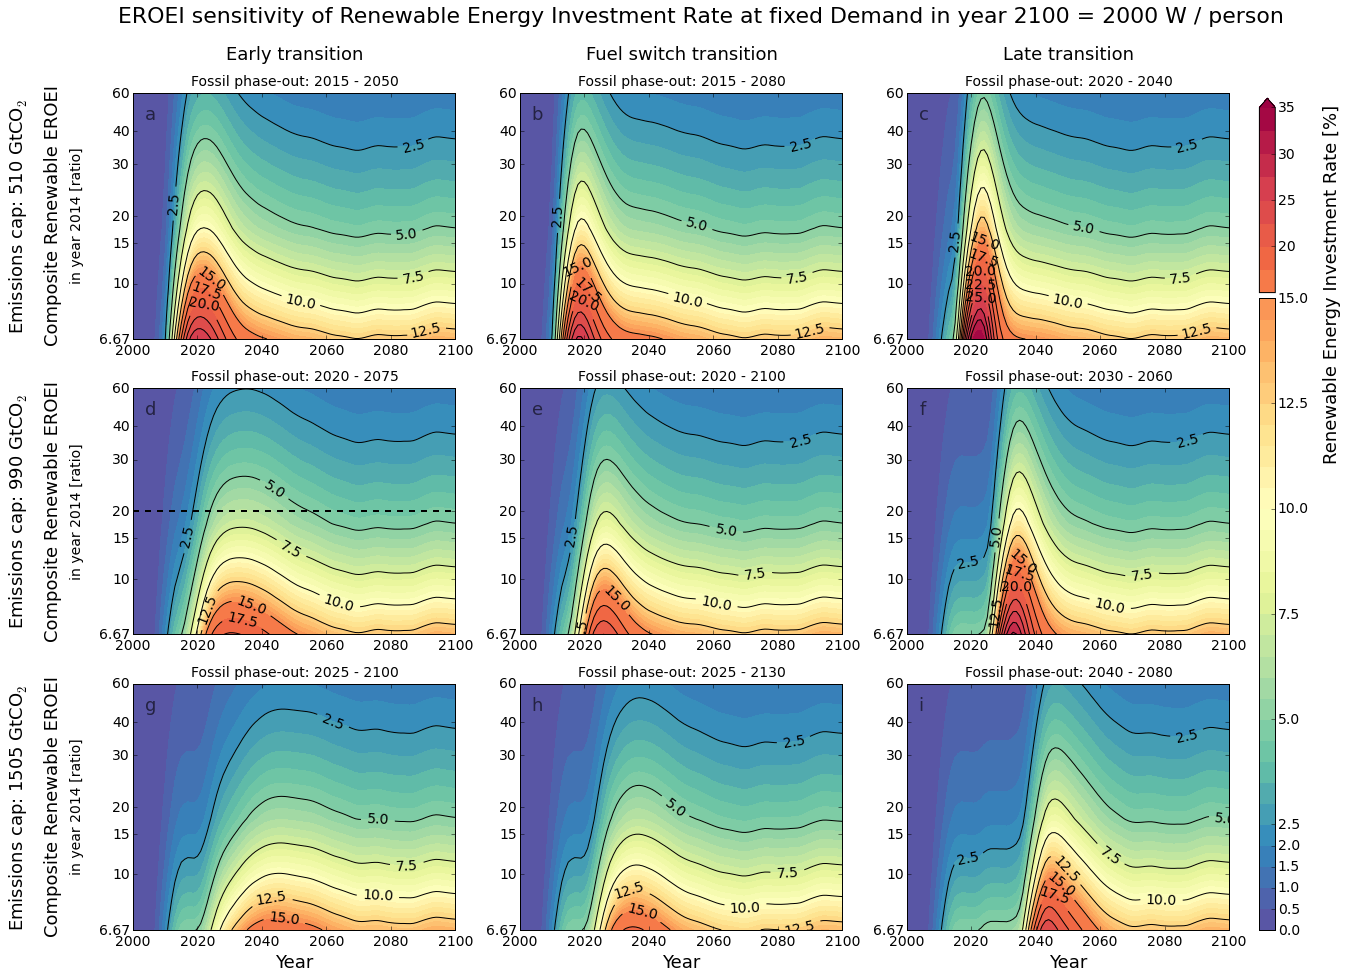

In [230]:
demand=10 #demand bracket
D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1

fig, ax=plt.subplots(3,3,figsize=(21,15))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()[range(demand*21,(demand+1)*21)]
    df.index=range(1950,2111)
    df=df.loc[2001:2101]
    
    a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
    a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
    b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
    ax[k/3][k%3].set_ylim(0,20)
    ax[k/3][k%3].set_xlim(0,100)
    ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    ticks=[0,4.5,7.8,10,14.2,16.9,20]
    ax[k/3][k%3].set_yticks(ticks)
    tick1=[6.67,10,15,20,30,40,60]
    ax[k/3][k%3].set_yticklabels(tick1,size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
        ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Renewable Energy Investment Rate [%]',
        horizontalalignment='center',
        verticalalignment='top',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
        fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
        cbar_ax.tick_params(labelsize=14) 
        cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
        fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
        cbar_ax.tick_params(labelsize=14)  

ax[1][0].plot([10 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('EROEI sensitivity of Renewable Energy Investment Rate at fixed Demand in year 2100 = '+repr(D)+' W / person',size=22)
plt.savefig(path+'/plots_highres/EROEI_Sensitivity_Epsilon_Demand'+repr(D)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All parser EROEI Epsilon

In [231]:
for demand in range(1,22):

    D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))
    
    vi=0
    vx=15.0
    vx2=35.0
    lev=vx/2.5+1
    lev2=(vx2-vx)/2.5+1

    fig, ax=plt.subplots(3,3,figsize=(21,15))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF3[k].copy()[range(demand*21,(demand+1)*21)]
        df.index=range(1950,2111)
        df=df.loc[2001:2101]

        a2=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
        a=ax[k/3][k%3].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
        b=ax[k/3][k%3].contour(df.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
        ax[k/3][k%3].set_ylim(0,20)
        ax[k/3][k%3].set_xlim(0,100)
        ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
        ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
        ticks=[0,4.5,7.8,10,14.2,16.9,20]
        ax[k/3][k%3].set_yticks(ticks)
        tick1=[6.67,10,15,20,30,40,60]
        ax[k/3][k%3].set_yticklabels(tick1,size=14)
        if (k/3==2):
            ax[k/3][k%3].set_xlabel('Year',size=18)
        if (k%3==0):
            ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
            ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
            ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        if (k/3==0):
            ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
        if (k==2):
            ax[k/3][k%3].text(1.32, 0.95, 'Renewable Energy Investment Rate [%]',
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
            fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
            cbar_ax.tick_params(labelsize=14) 
            cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
            fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
            cbar_ax.tick_params(labelsize=14)  

    plt.suptitle('EROEI sensitivity of Renewable Energy Investment Rate at fixed Demand in year 2100 = '+repr(D)+' W / person',size=22)
    plt.savefig(path+'/plots/EROEI_Sensitivity_Epsilon_Demand'+repr(D)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
    plt.close()

#Surfaces

Rate

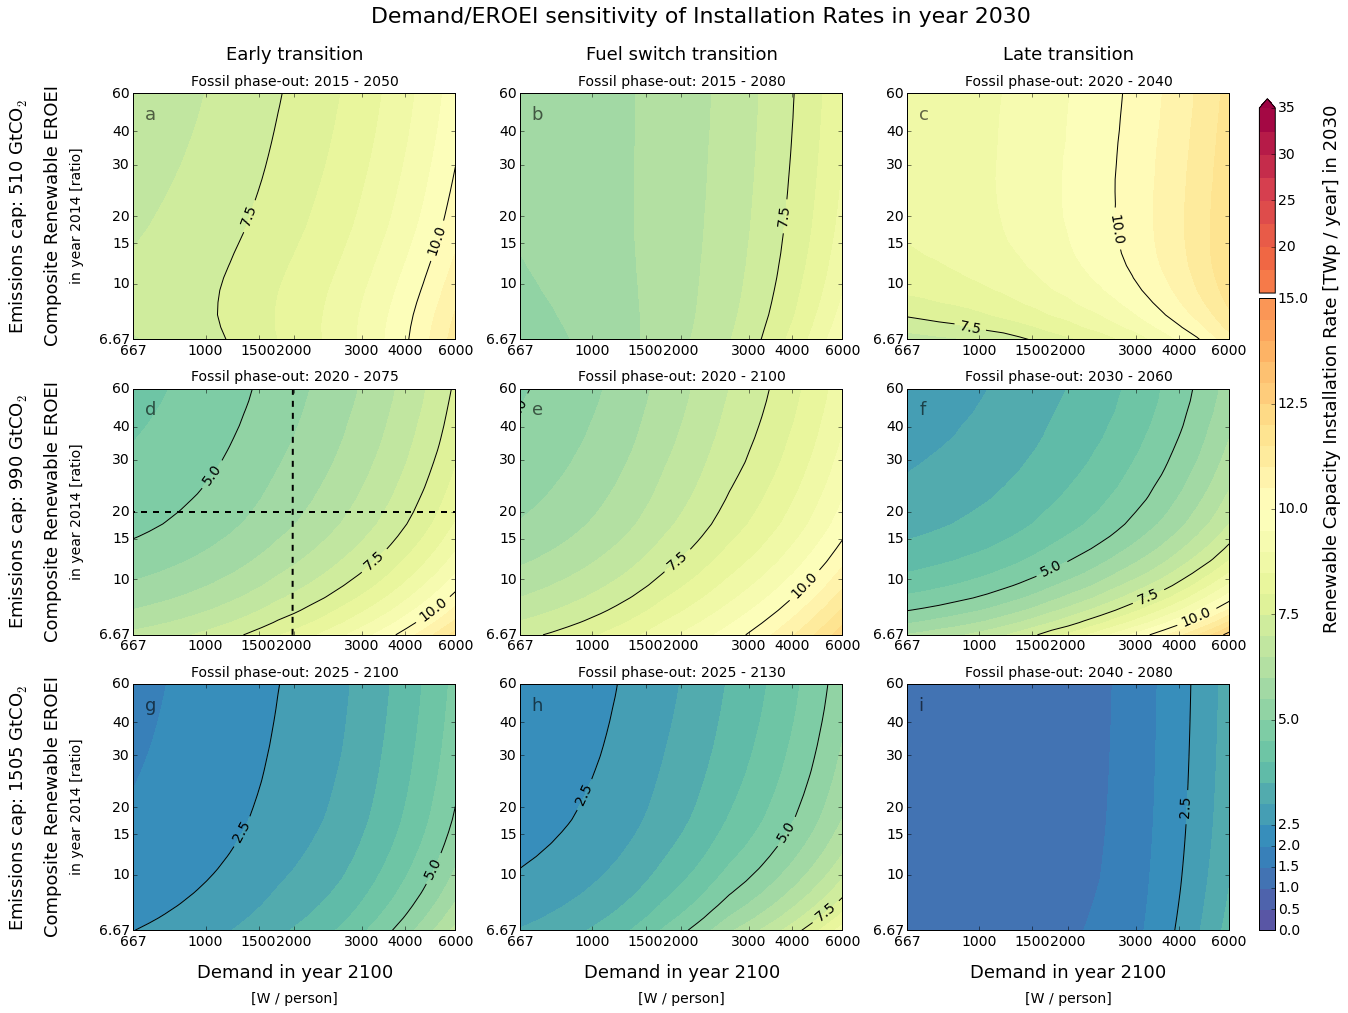

In [232]:
year=2030

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig, ax=plt.subplots(3,3,figsize=(21,15))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF[k].copy()
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]
    
    dk=pd.DataFrame()
    break_after=21
    for i in range(len(df.loc[year])/break_after):
        dl=pd.DataFrame(df.loc[year][i*break_after:(i+1)*break_after]).T
        dl.columns=range(break_after)
        dk=pd.concat([dk,dl])
    
    a2=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
    a=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
    b=ax[k/3][k%3].contour(dk.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
    ax[k/3][k%3].set_ylim(0,20)
    ax[k/3][k%3].set_xlim(1,21)
    ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
    ax[k/3][k%3].set_xticks(np.array([0,4.5,7.8,10,14.2,16.9,20])+1)
    ax[k/3][k%3].set_xticklabels([667,1000,1500,2000,3000,4000,6000],size=14)
    ax[k/3][k%3].set_yticks([0,4.5,7.8,10,14.2,16.9,20])
    ax[k/3][k%3].set_yticklabels([6.67,10,15,20,30,40,60],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Demand in year 2100',size=18,labelpad=15)
        ax[k/3][k%3].text(0.5, -0.25, '[W / person]',
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax[k/3][k%3].transAxes,size=14)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
        ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Renewable Capacity Installation Rate [TWp / year] in '+repr(year),
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
        fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
        cbar_ax.tick_params(labelsize=14) 
        cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
        fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
        cbar_ax.tick_params(labelsize=14) 

ax[1][0].plot([10 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
ax[1][0].plot([10.9,11],[0,100],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand/EROEI sensitivity of Installation Rates in year '+repr(year),size=22)
plt.savefig(path+'/plots_highres/Surface_Year'+repr(year)+'_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All years

In [233]:
for year in range(2001,2101):

    vi=0
    vx=15.0
    vx2=35.0
    lev=vx/2.5+1
    lev2=(vx2-vx)/2.5+1

    fig, ax=plt.subplots(3,3,figsize=(21,15))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF[k].copy()
        df.index=range(1950,2111)
        df2=DF2[k].copy()
        df2.index=range(1950,2111)
        df+=df2/lifetime
        df=pd.rolling_mean(df,moving_window,center=True) 
        df=df.loc[2001:2101]

        dk=pd.DataFrame()
        break_after=21
        for i in range(len(df.loc[year])/break_after):
            dl=pd.DataFrame(df.loc[year][i*break_after:(i+1)*break_after]).T
            dl.columns=range(break_after)
            dk=pd.concat([dk,dl])

        a2=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
        a=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
        b=ax[k/3][k%3].contour(dk.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
        ax[k/3][k%3].set_ylim(0,20)
        ax[k/3][k%3].set_xlim(1,21)
        ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
        ax[k/3][k%3].set_xticks(np.array([0,4.5,7.8,10,14.2,16.9,20])+1)
        ax[k/3][k%3].set_xticklabels([667,1000,1500,2000,3000,4000,6000],size=14)
        ax[k/3][k%3].set_yticks([0,4.5,7.8,10,14.2,16.9,20])
        ax[k/3][k%3].set_yticklabels([6.67,10,15,20,30,40,60],size=14)
        if (k/3==2):
            ax[k/3][k%3].set_xlabel('Demand in year 2100',size=18,labelpad=15)
            ax[k/3][k%3].text(0.5, -0.25, '[W / person]',
                horizontalalignment='center',
                verticalalignment='top',
                transform=ax[k/3][k%3].transAxes,size=14)
        if (k%3==0):
            ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
            ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
                horizontalalignment='right',
                verticalalignment='center',rotation=90,
                transform=ax[k/3][k%3].transAxes,size=18)
            ax[k/3][k%3].text(-0.32, 0.5, cap,
                horizontalalignment='right',
                verticalalignment='center',rotation=90,
                transform=ax[k/3][k%3].transAxes,size=18)
        if (k/3==0):
            ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
                horizontalalignment='center',
                verticalalignment='bottom',
                transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
        if (k==2):
            ax[k/3][k%3].text(1.32, 0.95, 'Renewable Capacity Installation Rate [TWp / year] in '+repr(year),
                horizontalalignment='center',
                verticalalignment='top',rotation=90,
                transform=ax[k/3][k%3].transAxes,size=18)

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
            fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
            cbar_ax.tick_params(labelsize=14) 
            cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
            fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
            cbar_ax.tick_params(labelsize=14) 

    plt.suptitle('Demand/EROEI sensitivity of Installation Rates in year '+repr(year),size=22)
    plt.savefig(path+'/plots/Surface_Year'+repr(year)+'_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
    plt.close()

Cumulative

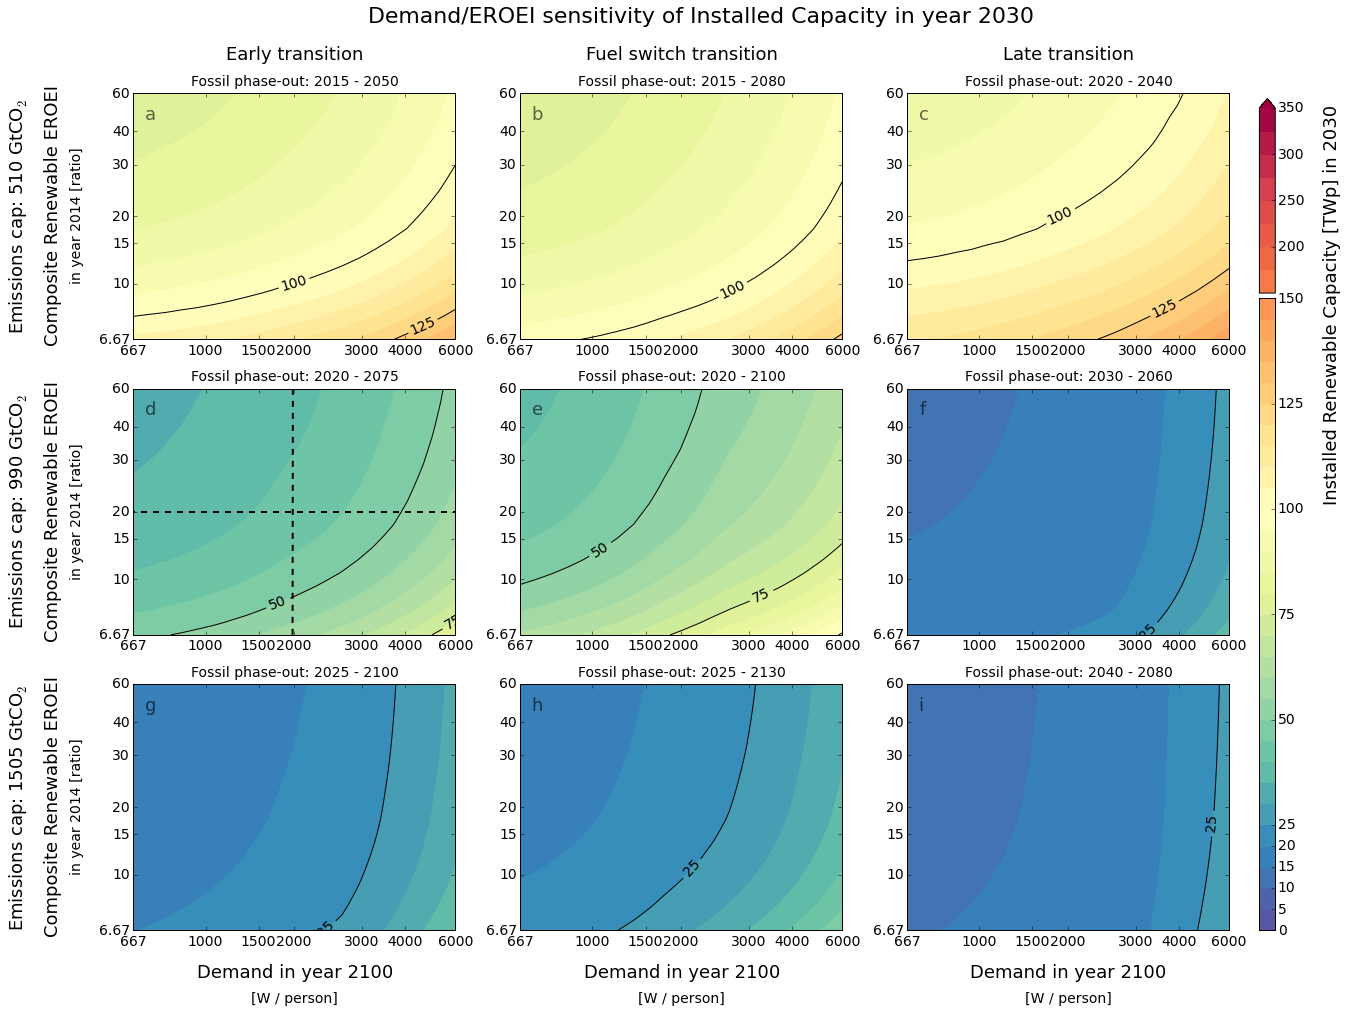

In [344]:
year=2030

vi=0
vx=150
vx2=350
lev=vx/25+1
lev2=(vx2-vx)/25+1

fig, ax=plt.subplots(3,3,figsize=(21,15))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF2[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2001:2101]
    
    dk=pd.DataFrame()
    break_after=21
    for i in range(len(df.loc[year])/break_after):
        dl=pd.DataFrame(df.loc[year][i*break_after:(i+1)*break_after]).T
        dl.columns=range(break_after)
        dk=pd.concat([dk,dl])
    
    a2=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
    a=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
    b=ax[k/3][k%3].contour(dk.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(int),colors='k')
    ax[k/3][k%3].set_ylim(0,20)
    ax[k/3][k%3].set_xlim(1,21)
    ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
    ax[k/3][k%3].set_xticks(np.array([0,4.5,7.8,10,14.2,16.9,20])+1)
    ax[k/3][k%3].set_xticklabels([667,1000,1500,2000,3000,4000,6000],size=14)
    ax[k/3][k%3].set_yticks([0,4.5,7.8,10,14.2,16.9,20])
    ax[k/3][k%3].set_yticklabels([6.67,10,15,20,30,40,60],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Demand in year 2100',size=18,labelpad=15)
        ax[k/3][k%3].text(0.5, -0.25, '[W / person]',
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax[k/3][k%3].transAxes,size=14)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
        ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Installed Renewable Capacity [TWp] in '+repr(year),
        horizontalalignment='center',
        verticalalignment='top',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
        fig.colorbar(a, cax=cbar_ax, ticks=[0,5,10,15,20,25,50,75,100,125,150])
        cbar_ax.tick_params(labelsize=14) 
        cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
        fig.colorbar(a2, cax=cbar_ax, ticks=[200,250,300,350])
        cbar_ax.tick_params(labelsize=14)  

ax[1][0].plot([10 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
ax[1][0].plot([10.9,11],[0,100],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand/EROEI sensitivity of Installed Capacity in year '+repr(year),size=22)
plt.savefig(path+'/plots_highres/Surface_Year'+repr(year)+'_Cumulative.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All years

In [345]:
year=2030

for year in range(2001,2101):

    vi=0
    vx=150
    vx2=350
    lev=vx/25+1
    lev2=(vx2-vx)/25+1

    fig, ax=plt.subplots(3,3,figsize=(21,15))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF2[k].copy()
        df.index=range(1950,2111)
        df=df.loc[2001:2101]

        dk=pd.DataFrame()
        break_after=21
        for i in range(len(df.loc[year])/break_after):
            dl=pd.DataFrame(df.loc[year][i*break_after:(i+1)*break_after]).T
            dl.columns=range(break_after)
            dk=pd.concat([dk,dl])

        a2=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
        a=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
        b=ax[k/3][k%3].contour(dk.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(int),colors='k')
        ax[k/3][k%3].set_ylim(0,20)
        ax[k/3][k%3].set_xlim(1,21)
        ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
        ax[k/3][k%3].set_xticks(np.array([0,4.5,7.8,10,14.2,16.9,20])+1)
        ax[k/3][k%3].set_xticklabels([667,1000,1500,2000,3000,4000,6000],size=14)
        ax[k/3][k%3].set_yticks([0,4.5,7.8,10,14.2,16.9,20])
        ax[k/3][k%3].set_yticklabels([6.67,10,15,20,30,40,60],size=14)
        if (k/3==2):
            ax[k/3][k%3].set_xlabel('Demand in year 2100',size=18,labelpad=15)
            ax[k/3][k%3].text(0.5, -0.25, '[W / person]',
                horizontalalignment='center',
                verticalalignment='top',
                transform=ax[k/3][k%3].transAxes,size=14)
        if (k%3==0):
            ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
            ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
            ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        if (k/3==0):
            ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
        if (k==2):
            ax[k/3][k%3].text(1.32, 0.95, 'Installed Renewable Capacity [TWp] in '+repr(year),
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
            fig.colorbar(a, cax=cbar_ax, ticks=[0,5,10,15,20,25,50,75,100,125,150])
            cbar_ax.tick_params(labelsize=14) 
            cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
            fig.colorbar(a2, cax=cbar_ax, ticks=[200,250,300,350])
            cbar_ax.tick_params(labelsize=14) 

    plt.suptitle('Demand/EROEI sensitivity of Installed Capacity in year '+repr(year),size=22)    
    plt.savefig(path+'/plots/Surface_Year'+repr(year)+'_Cumulative.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
    plt.close()

Epsilon

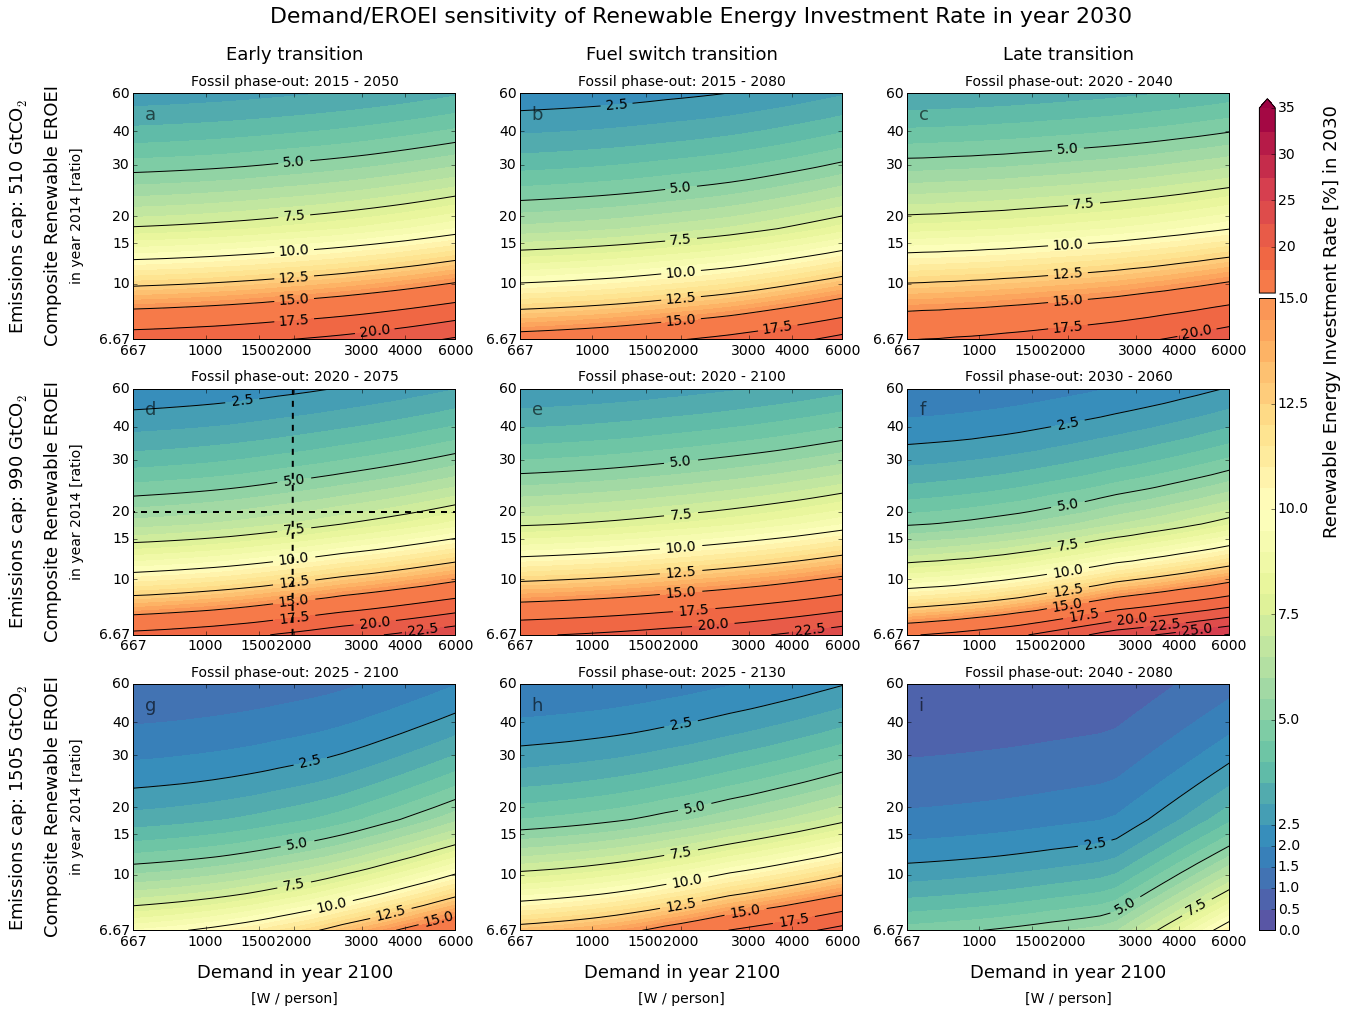

In [236]:
year=2030

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1

fig, ax=plt.subplots(3,3,figsize=(21,15))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2001:2101]
    
    dk=pd.DataFrame()
    break_after=21
    for i in range(len(df.loc[year])/break_after):
        dl=pd.DataFrame(df.loc[year][i*break_after:(i+1)*break_after]).T
        dl.columns=range(break_after)
        dk=pd.concat([dk,dl])
    
    a2=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
    a=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
    b=ax[k/3][k%3].contour(dk.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
    ax[k/3][k%3].set_ylim(0,20)
    ax[k/3][k%3].set_xlim(1,21)
    ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
    ax[k/3][k%3].set_xticks(np.array([0,4.5,7.8,10,14.2,16.9,20])+1)
    ax[k/3][k%3].set_xticklabels([667,1000,1500,2000,3000,4000,6000],size=14)
    ax[k/3][k%3].set_yticks([0,4.5,7.8,10,14.2,16.9,20])
    ax[k/3][k%3].set_yticklabels([6.67,10,15,20,30,40,60],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Demand in year 2100',size=18,labelpad=15)
        ax[k/3][k%3].text(0.5, -0.25, '[W / person]',
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax[k/3][k%3].transAxes,size=14)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
        ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Renewable Energy Investment Rate [%] in '+repr(year),
        horizontalalignment='center',
        verticalalignment='top',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
        fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
        cbar_ax.tick_params(labelsize=14) 
        cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
        fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
        cbar_ax.tick_params(labelsize=14) 

ax[1][0].plot([10 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
ax[1][0].plot([10.9,11],[0,100],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand/EROEI sensitivity of Renewable Energy Investment Rate in year '+repr(year),size=22)
plt.savefig(path+'/plots_highres/Surface_Year'+repr(year)+'_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All years

In [237]:
year=2030

for year in range(2001,2101):

    vi=0
    vx=15.0
    vx2=35.0
    lev=vx/2.5+1
    lev2=(vx2-vx)/2.5+1

    fig, ax=plt.subplots(3,3,figsize=(21,15))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF3[k].copy()
        df.index=range(1950,2111)
        df=df.loc[2001:2101]

        dk=pd.DataFrame()
        break_after=21
        for i in range(len(df.loc[year])/break_after):
            dl=pd.DataFrame(df.loc[year][i*break_after:(i+1)*break_after]).T
            dl.columns=range(break_after)
            dk=pd.concat([dk,dl])

        a2=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-vx2*10/7.0,vmax=vx2)
        a=ax[k/3][k%3].contourf(dk.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,vmin=vi,vmax=vx*4/3.0)
        b=ax[k/3][k%3].contour(dk.T,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='k')
        ax[k/3][k%3].set_ylim(0,20)
        ax[k/3][k%3].set_xlim(1,21)
        ax[k/3][k%3].clabel(b, fmt = '%r',inline=1, fontsize=14)
        ax[k/3][k%3].set_xticks(np.array([0,4.5,7.8,10,14.2,16.9,20])+1)
        ax[k/3][k%3].set_xticklabels([667,1000,1500,2000,3000,4000,6000],size=14)
        ax[k/3][k%3].set_yticks([0,4.5,7.8,10,14.2,16.9,20])
        ax[k/3][k%3].set_yticklabels([6.67,10,15,20,30,40,60],size=14)
        if (k/3==2):
            ax[k/3][k%3].set_xlabel('Demand in year 2100',size=18,labelpad=15)
            ax[k/3][k%3].text(0.5, -0.25, '[W / person]',
                horizontalalignment='center',
                verticalalignment='top',
                transform=ax[k/3][k%3].transAxes,size=14)
        if (k%3==0):
            ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
            ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
            ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        if (k/3==0):
            ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(0.04, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
        if (k==2):
            ax[k/3][k%3].text(1.32, 0.95, 'Renewable Energy Investment Rate [%] in '+repr(year),
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.585])
            fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.5,1.0,1.5,2.0,2.5,5.0,7.5,10.0,12.5,15.0])
            cbar_ax.tick_params(labelsize=14) 
            cbar_ax = fig.add_axes([0.87, 0.715, 0.01, 0.18])
            fig.colorbar(a2, cax=cbar_ax, ticks=[20.0,25.0,30.0,35.0])
            cbar_ax.tick_params(labelsize=14) 

    plt.suptitle('Demand/EROEI sensitivity of Renewable Energy Investment Rate in year '+repr(year),size=22)    
    plt.savefig(path+'/plots/Surface_Year'+repr(year)+'_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
    plt.close()

#Histograms

Scenarios

In [8]:
mycolors[1],mycolors[0]=mycolors[0],mycolors[1]
mycolors2=['#01665e','#8c510a','#c51b7d']

demand=10 #demand bracket
eroei=9 #eroei bracket
D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

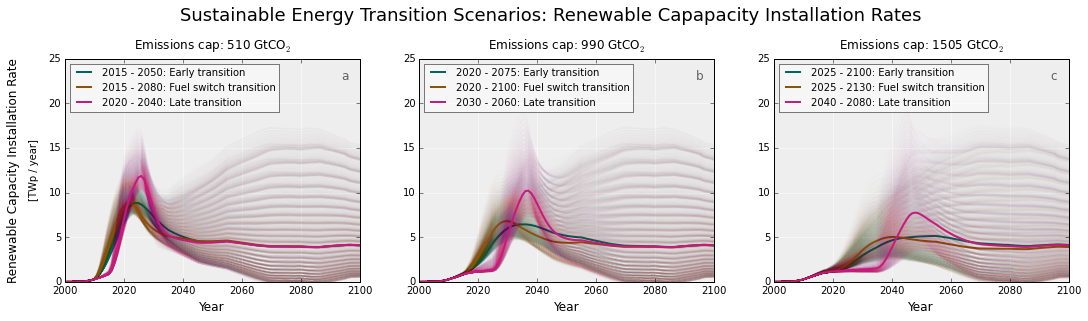

In [242]:
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(1,3,figsize=(18,4),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k%3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF[k].copy()
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]  
    
    for i in range(len(df.columns)):
        ax[k/3].plot(df[[i]],c=mycolors2[k%3],linewidth=2,alpha=0.01)
        if i==0: 
            if k==0: DM=df.copy()
            dk=df.copy()
        else: 
            DM+=df
            dk+=df
    dk/=len(df.columns)
            
    #default Demand+EROEI
    df=DF[k].copy()[[demand*21+eroei+1]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()[[demand*21+eroei+1]]
    df2.index=range(1950,2111)
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]  
    ax[k/3].plot(df,c=mycolors2[k%3],linewidth=2,alpha=1,label=title[18:]+': '+tran+' transition')
    
    ax[k/3].grid(color='white', linestyle='solid')
    ax[k/3].set_ylim(0,25)
    ax[k/3].set_yticklabels([0,5,10,15,20,25],size=10)
    ax[k/3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=10)
    if (k<3):
        ax[k].set_xlabel('Year',size=12)
        ax[k].text(0.94, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k].transAxes,size=12,alpha=0.6)
    if (k==0):
        ax[k].set_ylabel('[TWp / year]',size=10,labelpad=10)
        ax[k].text(-0.15, 0.5, 'Renewable Capacity Installation Rate',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k].transAxes,size=12)
    if (k<3):
        ax[k].text(0.5, 1.02, cap,
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k].transAxes,size=12)
    if (k>5):
        ax[k%3].legend(loc=2,framealpha=0.5,fontsize=10)

plt.suptitle('Sustainable Energy Transition Scenarios: Renewable Capapacity Installation Rates',size=18,y=1.08)
plt.savefig(path+'/plots/Scenarios_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/Scenarios_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()
DM/=len(order)

In [250]:
mycolors3=['#00221a','#01665e','#45aa9f', '#481006','#8c510a','#cf954e', '#810739', '#c51b7d', '#f95fbf']

In [251]:
vi=0
vx=15
lev=vx/2.5+1

eroeis=[3,9,13]
demands=[5,10,16]
for i in range(3): 
    eroei=eroeis[i]
    demand=demands[i]

    fig, ax=plt.subplots(1,1,figsize=(18,14),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        
        df=DF[k].copy()[[demand*21+eroei+1]]
        df.index=range(1950,2111)
        df2=DF2[k].copy()[[demand*21+eroei+1]]
        df2.index=range(1950,2111)
        df+=df2/lifetime
        df=pd.rolling_mean(df,moving_window,center=True) 
        df=df.loc[2001:2101]  
        ax.plot(df,color=mycolors3[k],linewidth=2,alpha=1,label=cap+' - '+title[18:]+': '+tran+' transition')

        ax.grid(color='white', linestyle='solid')
        ax.set_ylim(0,12)
        ax.set_yticks(0.5*np.arange(28))
        ax.set_xticks(np.arange(101))
        
        a=[]
        for i in range(101):
            if (i%5==0): a.append(2000+i) 
            else: a.append('')
        ax.set_xticklabels(a,size=10)
        ax.set_xlabel('Year',size=12)
        ax.set_ylabel('Renewable Capacity Installation Rate [TWp / year]',size=10,labelpad=10)
        ax.legend(loc=1,framealpha=0.5,fontsize=10)

    D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))
    E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

    plt.suptitle('High Resolution Sustainable Energy Transition Paths',size=18,y=0.95)
    plt.title('EROEI: '+repr(E)+' | Demand: '+repr(D),size=12,y=1.01)
    plt.savefig(path+'/plots_highres/Histograms_Rates_Categorized_HighRes'+'EROEI'+repr(E)+'_Demand'+repr(D)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
    plt.close()
    DM/=len(order)

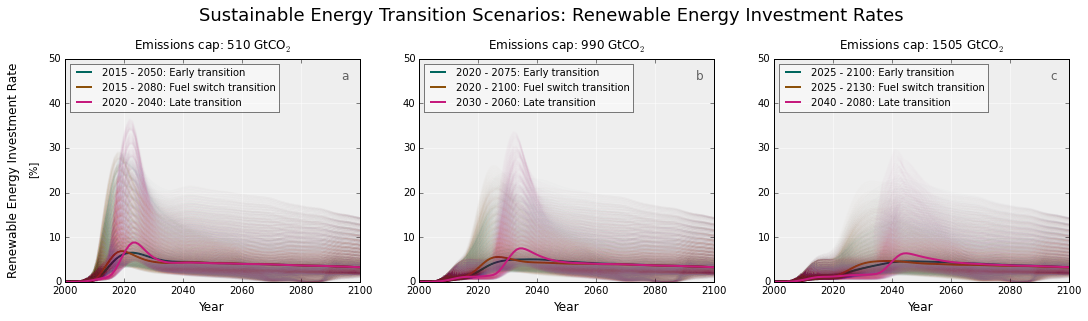

In [248]:
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(1,3,figsize=(18,4),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k%3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2001:2101]  
    
    for i in range(len(df.columns)):
        ax[k/3].plot(df[[i]],c=mycolors2[k%3],linewidth=2,alpha=0.01)
        if i==0: 
            if k==0: DM=df.copy()
            dk=df.copy()
        else: 
            DM+=df
            dk+=df
    dk/=len(df.columns)
            
    #ax[k/3].plot(dk.T.max(),c=mycolors2[k%3],linewidth=1,alpha=1)
    #ax[k/3].plot(dk.T.min(),c=mycolors2[k%3],linewidth=1,alpha=1)
    
    #default Demand+EROEI
    df=DF3[k].copy()[[demand*21+eroei+1]]
    df.index=range(1950,2111)
    df=df.loc[2001:2101]  
    ax[k/3].plot(df,c=mycolors2[k%3],linewidth=2,alpha=1,label=title[18:]+': '+tran+' transition')
    
    ax[k/3].grid(color='white', linestyle='solid')
    ax[k/3].set_ylim(0,50)
    ax[k/3].set_yticklabels([0,10,20,30,40,50],size=10)
    ax[k/3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=10)
    if (k<3):
        ax[k].set_xlabel('Year',size=12)
        ax[k].text(0.94, 0.95, abc[k],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[k].transAxes,size=12,alpha=0.6)
    if (k==0):
        ax[k].set_ylabel('[%]',size=10,labelpad=10)
        ax[k].text(-0.15, 0.5, 'Renewable Energy Investment Rate',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k].transAxes,size=12)
    if (k<3):
        ax[k].text(0.5, 1.02, cap,
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k].transAxes,size=12)
    if (k>5):
        ax[k%3].legend(loc=2,framealpha=0.5,fontsize=10)

plt.suptitle('Sustainable Energy Transition Scenarios: Renewable Energy Investment Rates',size=18,y=1.08)
plt.savefig(path+'/plots/Scenarios_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/Scenarios_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()
DM/=len(order)

In [246]:
vi=0
vx=15
lev=vx/2.5+1

eroeis=[3,9,13]
demands=[5,10,16]
for i in range(3): 
    eroei=eroeis[i]
    demand=demands[i]

    fig, ax=plt.subplots(1,1,figsize=(18,14),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

    for k in range(len(order)):
        title=titless[k/3][k%3]
        base=bases[k/3]
        cap=caps[k/3]
        tran=trans[k%3]
        share=shares[k/3]
        i=order[k]+7

        df=DF3[k].copy()[[demand*21+eroei+1]]
        df.index=range(1950,2111)
        df=df.loc[2001:2101]  
    
        ax.plot(df,color=mycolors3[k],linewidth=2,alpha=1,label=cap+' - '+title[18:]+': '+tran+' transition')

        ax.grid(color='white', linestyle='solid')
        ax.set_ylim(0,12)
        ax.set_yticks(0.5*np.arange(51))
        ax.set_xticks(np.arange(101))
        #ax.set_yticklabels(range(16),size=10)
        a=[]
        for i in range(101):
            if (i%5==0): a.append(2000+i) 
            else: a.append('')
        ax.set_xticklabels(a,size=10)
        ax.set_xlabel('Year',size=12)
        ax.set_ylabel('Renewable Energy Investment Rate',size=10,labelpad=10)
        ax.legend(loc=1,framealpha=0.5,fontsize=10)

    D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))
    E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

    plt.suptitle('High Resolution Sustainable Energy Transition Paths',size=18,y=0.95)
    plt.title('EROEI: '+repr(E)+' | Demand: '+repr(D),size=12,y=1.01)
    plt.savefig(path+'/plots_highres/Histograms_Epsilon_Categorized_HighRes'+'EROEI'+repr(E)+'_Demand'+repr(D)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
    plt.close()
    DM/=len(order)

Envelopes

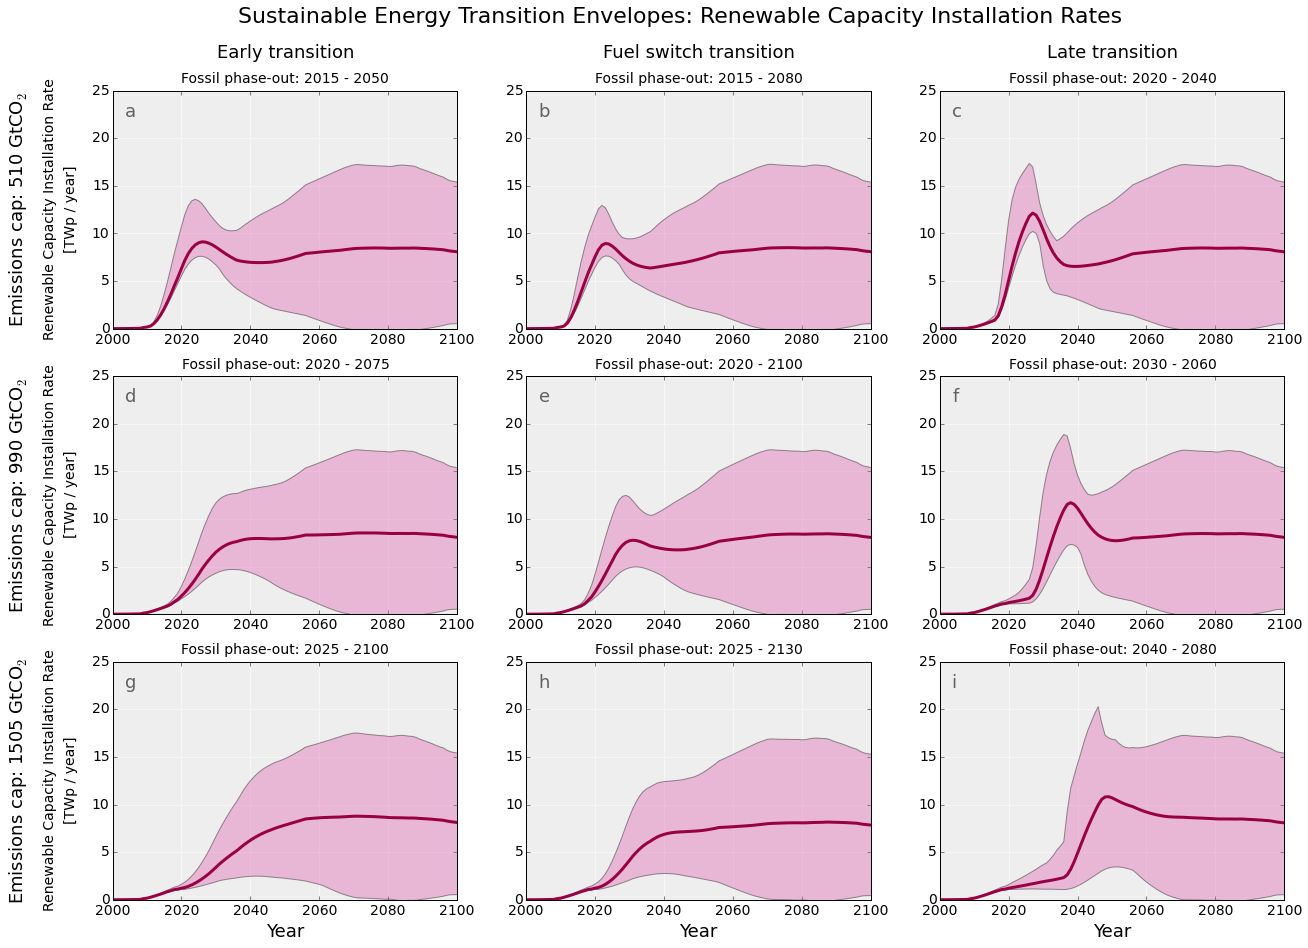

In [252]:
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(3,3,figsize=(21,14.5),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF[k].copy()
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2000:2101]  
    
    for i in range(len(df.columns)):
        if i==0: 
            if k==0: DM=df.copy()
            dk=df.copy()
        else: 
            DM+=df
            dk+=df
    dk/=len(df.columns)
            
    ax[k/3][k%3].fill_between(dk.index,dk.T.min(),dk.T.max(),facecolor=mycolors[0], alpha=0.4)
    
    #default Demand+EROEI
    df=DF[k].copy()[[demand*21+eroei+1]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()[[demand*21+eroei+1]]
    df2.index=range(1950,2111)
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2000:2101]  
    ax[k/3][k%3].plot(df.index,df,c=mycolors[2],linewidth=3,alpha=1)
    
    ax[k/3][k%3].grid(color='white', linestyle='solid')
    ax[k/3][k%3].set_ylim(0,25)
    ax[k/3][k%3].set_xlim(2000,2100)
    ax[k/3][k%3].set_yticklabels([0,5,10,15,20,25],size=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('[TWp / year]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.16, 0.5, 'Renewable Capacity Installation Rate ',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(-0.24, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    
plt.suptitle('Sustainable Energy Transition Envelopes: Renewable Capacity Installation Rates',size=22)
plt.savefig(path+'/plots/Envelopes_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
plt.savefig(path+'/plots_highres/Envelopes_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()
DM/=len(order)

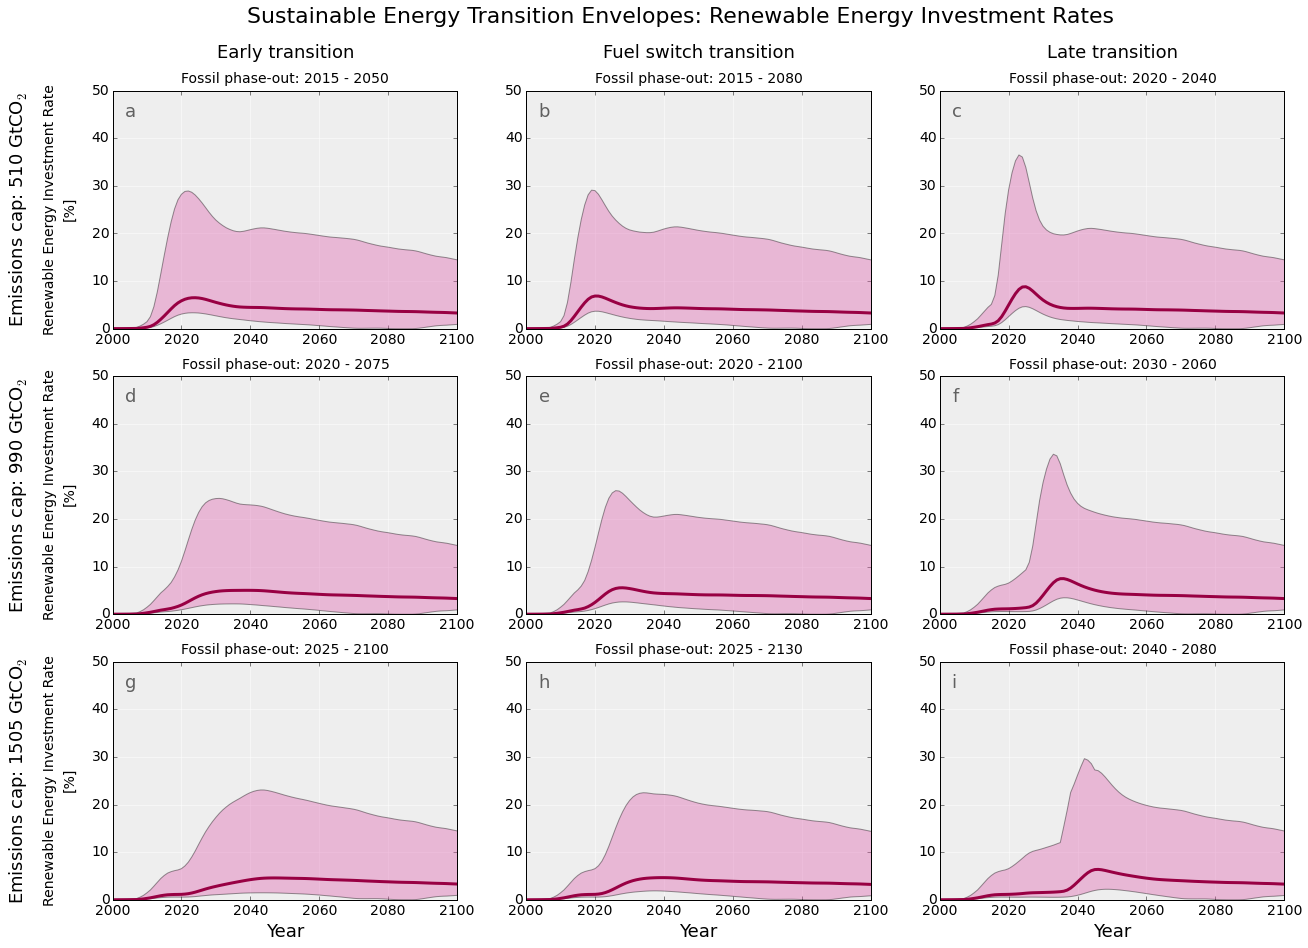

In [253]:
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(3,3,figsize=(21,14.5),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101]  
    
    for i in range(len(df.columns)):
        if i==0: 
            if k==0: DM=df.copy()
            dk=df.copy()
        else: 
            DM+=df
            dk+=df
    dk/=len(df.columns)
            
    ax[k/3][k%3].fill_between(dk.index,dk.T.min(),dk.T.max(),facecolor=mycolors[0], alpha=0.4)
    #mean
    #ax[k/3][k%3].plot(dk.index,(dk.T.min()+dk.T.max())/2,c=mycolors[2],linewidth=3,alpha=1)
    
    #default Demand+EROEI
    df=DF3[k].copy()[[demand*21+eroei+1]]
    df.index=range(1950,2111)
    df=df.loc[2000:2101]  
    ax[k/3][k%3].plot(df.index,df,c=mycolors[2],linewidth=3,alpha=1)
    
    ax[k/3][k%3].grid(color='white', linestyle='solid')
    ax[k/3][k%3].set_ylim(0,50)
    ax[k/3][k%3].set_xlim(2000,2100)
    ax[k/3][k%3].set_yticklabels([0,10,20,30,40,50],size=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('[%]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.16, 0.5, 'Renewable Energy Investment Rate',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(-0.24, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    
plt.suptitle('Sustainable Energy Transition Envelopes: Renewable Energy Investment Rates',size=22)
plt.savefig(path+'/plots/Envelopes_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
plt.savefig(path+'/plots_highres/Envelopes_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()
DM/=len(order)

Frequencies

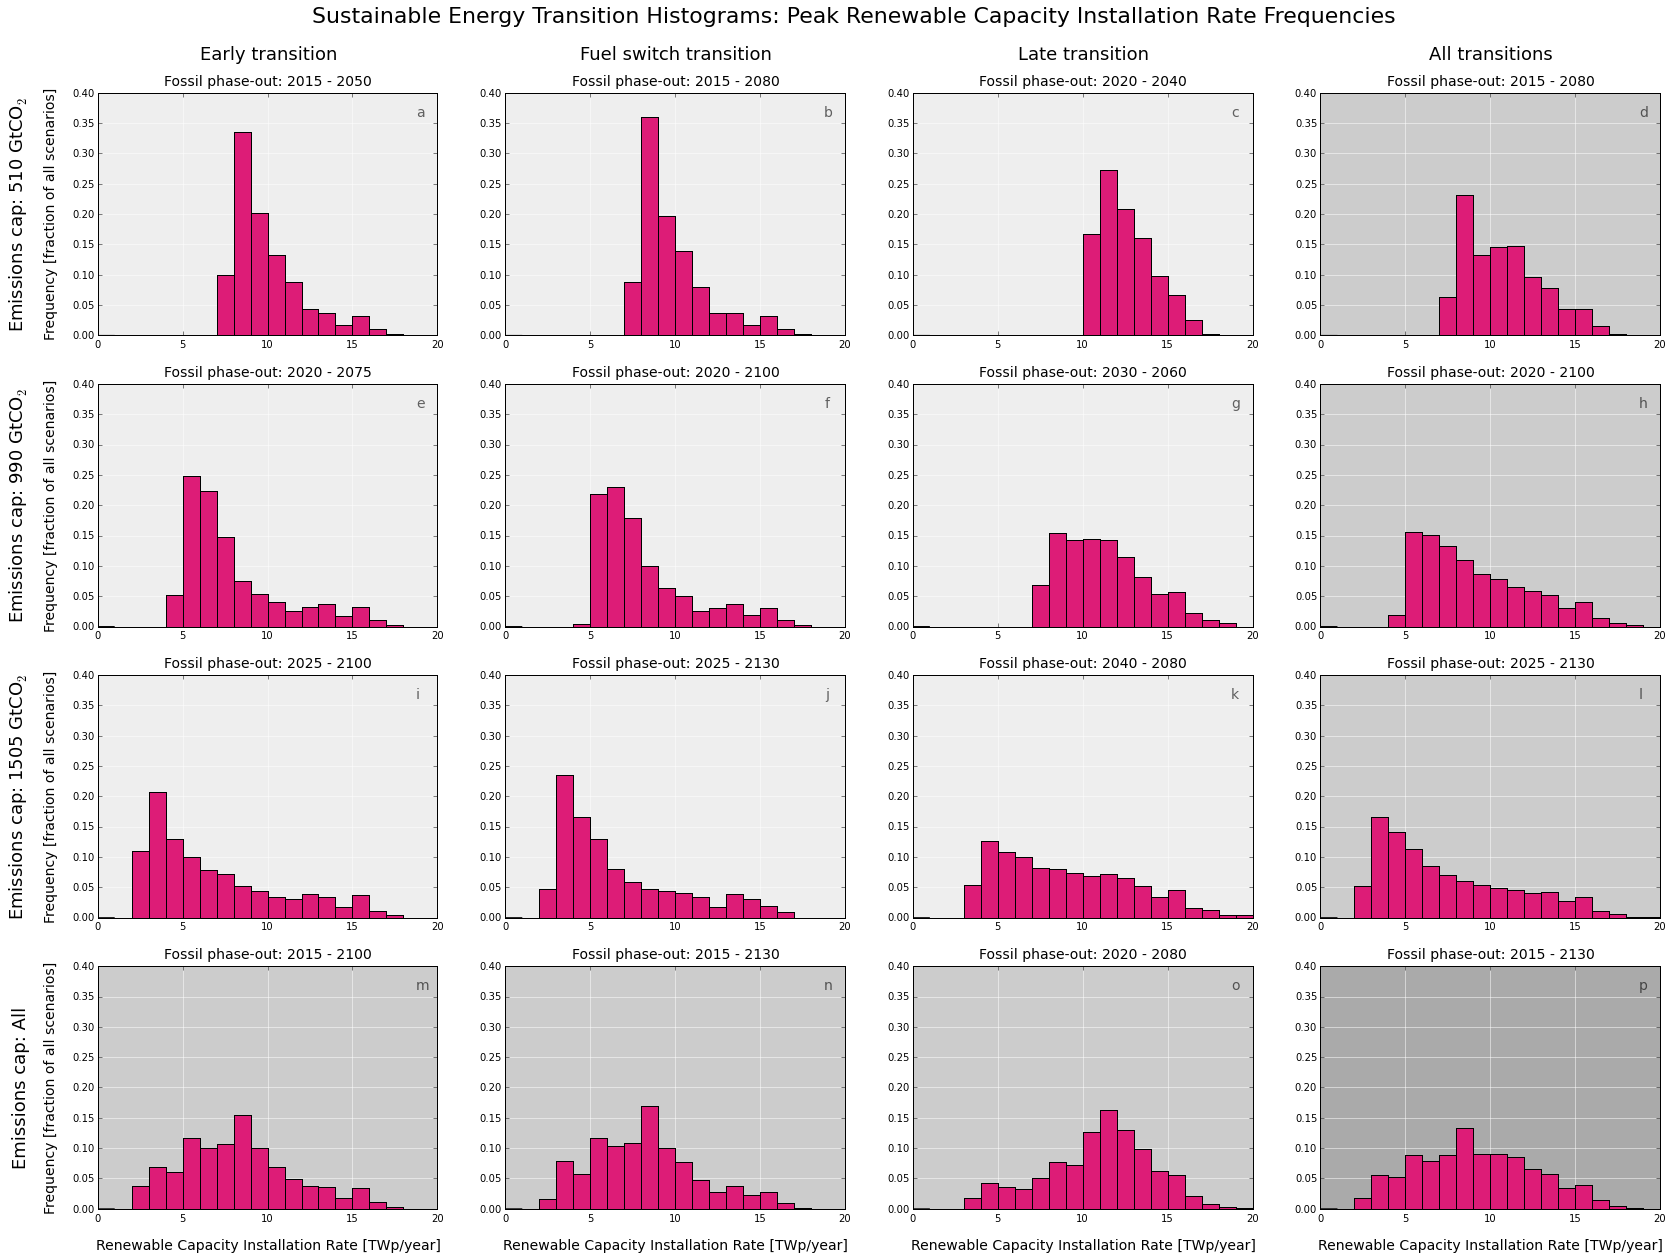

In [8]:
histcolor='#dd1c77'
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(4,4,figsize=(28,20),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

master=[]
master1=[[],[],[]]
master2=[[],[],[]]
bins=range(21)

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF[k].copy()
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2000:2101]  
    
    for i in range(len(df.columns)):
        if i==0: 
            if k==0: DM=df.copy()
            dk=df.copy()
        else: 
            DM+=df
            dk+=df
    dk/=len(df.columns)
    
    ax[k/3][k%3].hist(dk.max(),bins=bins,color=histcolor,normed=1)
    
    master1[k/3]=np.append(master1[k/3],dk.max())
    master2[k%3]=np.append(master2[k%3],dk.max())
    master=np.append(master,dk.max())
    
    ax[k/3][k%3].grid(color='white', linestyle='solid')
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('Frequency [fraction of all scenarios]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.2, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18) 
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)

ax[3][3].grid(color='white', linestyle='solid')
ax[3][3].set_axis_bgcolor('#AAAAAA')
ax[3][3].text(0.5, 1.02, 'Fossil phase-out: 2015 - 2130',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[3][3].transAxes,size=14)
ax[3][0].text(-0.2, 0.5, 'Emissions cap: All',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[3][0].transAxes,size=18)
ax[3][0].set_ylabel('Frequency [fraction of all scenarios]',size=14,labelpad=15)
ax[0][3].text(0.5, 1.12, 'All transitions',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[0][3].transAxes,size=18)  
ax[3][3].hist(master,bins=bins,color=histcolor,normed=1)
    
    
for i in range(4):
    for j in range(4):
        ax[i][j].set_ylim(0,0.4)
        ax[i][j].set_xlim(0,20)
        ax[i][j].text(0.94, 0.95, abc[i*4+j],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[i][j].transAxes,size=14,alpha=0.6)
    ax[3][i].set_xlabel('Renewable Capacity Installation Rate [TWp/year]',size=14,labelpad=15)
    
titless2=['Fossil phase-out: 2015 - 2080',
  'Fossil phase-out: 2020 - 2100',
  'Fossil phase-out: 2025 - 2130']
titless3=['Fossil phase-out: 2015 - 2100',
  'Fossil phase-out: 2015 - 2130',
  'Fossil phase-out: 2020 - 2080']
        
for k in range(3):
    ax[3][k].grid(color='white', linestyle='solid')
    ax[k][3].grid(color='white', linestyle='solid')
    ax[k][3].set_axis_bgcolor('#CCCCCC')
    ax[3][k].set_axis_bgcolor('#CCCCCC')
    ax[3][k].text(0.5, 1.02, titless3[k],
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[3][k].transAxes,size=14)
    ax[k][3].text(0.5, 1.02, titless2[k],
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k][3].transAxes,size=14)
    ax[3][k].hist(master2[k],bins=bins,color=histcolor,normed=1)
    ax[k][3].hist(master1[k],bins=bins,color=histcolor,normed=1)
   
    
plt.suptitle('Sustainable Energy Transition Histograms: Peak Renewable Capacity Installation Rate Frequencies',size=22,y=0.96)
#plt.savefig(path+'/plots/Histograms_Peak_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
#plt.savefig(path+'/plots_highres/Histograms_Peak_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()
DM/=len(order)

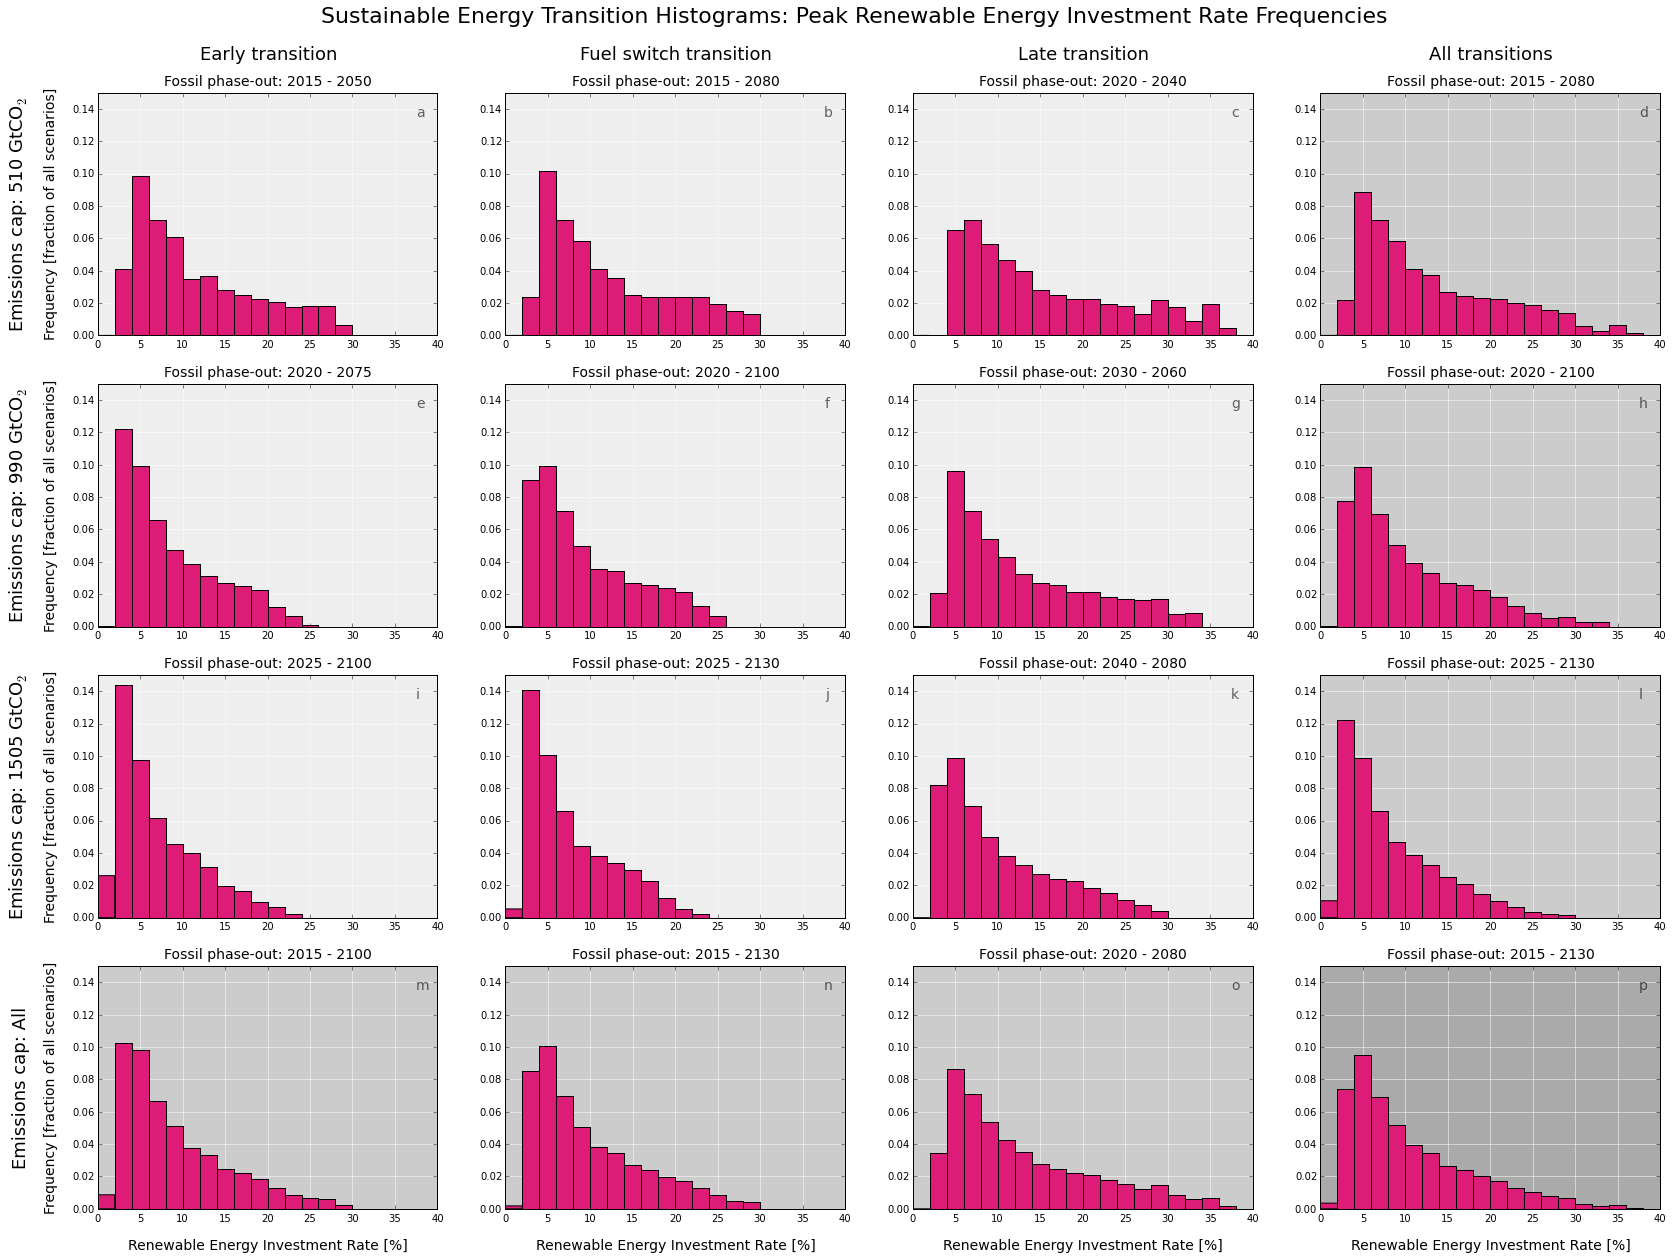

In [258]:
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(4,4,figsize=(28,20),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

master=[]
master1=[[],[],[]]
master2=[[],[],[]]
bins=range(41)[::2]

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101]  
    
    for i in range(len(df.columns)):
        if i==0: 
            if k==0: DM=df.copy()
            dk=df.copy()
        else: 
            DM+=df
            dk+=df
    dk/=len(df.columns)
    
    ax[k/3][k%3].hist(dk.max(),bins=bins,color=histcolor,normed=1)
    
    master1[k/3]=np.append(master1[k/3],dk.max())
    master2[k%3]=np.append(master2[k%3],dk.max())
    master=np.append(master,dk.max())
    
    ax[k/3][k%3].grid(color='white', linestyle='solid')
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('Frequency [fraction of all scenarios]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.2, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18) 
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)

ax[3][3].grid(color='white', linestyle='solid')
ax[3][3].set_axis_bgcolor('#AAAAAA')
ax[3][3].text(0.5, 1.02, 'Fossil phase-out: 2015 - 2130',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[3][3].transAxes,size=14)
ax[3][0].text(-0.2, 0.5, 'Emissions cap: All',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[3][0].transAxes,size=18)
ax[3][0].set_ylabel('Frequency [fraction of all scenarios]',size=14,labelpad=15)
ax[0][3].text(0.5, 1.12, 'All transitions',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[0][3].transAxes,size=18)  
ax[3][3].hist(master,bins=bins,color=histcolor,normed=1)
    
    
for i in range(4):
    for j in range(4):
        ax[i][j].set_ylim(0,0.15)
        ax[i][j].set_xlim(0,40)
        ax[i][j].text(0.94, 0.95, abc[i*4+j],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[i][j].transAxes,size=14,alpha=0.6)
    ax[3][i].set_xlabel('Renewable Energy Investment Rate [%]',size=14,labelpad=15)
        
titless2=['Fossil phase-out: 2015 - 2080',
  'Fossil phase-out: 2020 - 2100',
  'Fossil phase-out: 2025 - 2130']
titless3=['Fossil phase-out: 2015 - 2100',
  'Fossil phase-out: 2015 - 2130',
  'Fossil phase-out: 2020 - 2080']
        
for k in range(3):
    ax[3][k].grid(color='white', linestyle='solid')
    ax[k][3].grid(color='white', linestyle='solid')
    ax[k][3].set_axis_bgcolor('#CCCCCC')
    ax[3][k].set_axis_bgcolor('#CCCCCC')
    ax[3][k].text(0.5, 1.02, titless3[k],
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[3][k].transAxes,size=14)
    ax[k][3].text(0.5, 1.02, titless2[k],
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k][3].transAxes,size=14)
    ax[3][k].hist(master2[k],bins=bins,color=histcolor,normed=1)
    ax[k][3].hist(master1[k],bins=bins,color=histcolor,normed=1)    
    
plt.suptitle('Sustainable Energy Transition Histograms: Peak Renewable Energy Investment Rate Frequencies',size=22,y=0.96)
plt.savefig(path+'/plots/Histograms_Peak_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
plt.savefig(path+'/plots_highres/Histograms_Peak_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()
DM/=len(order)

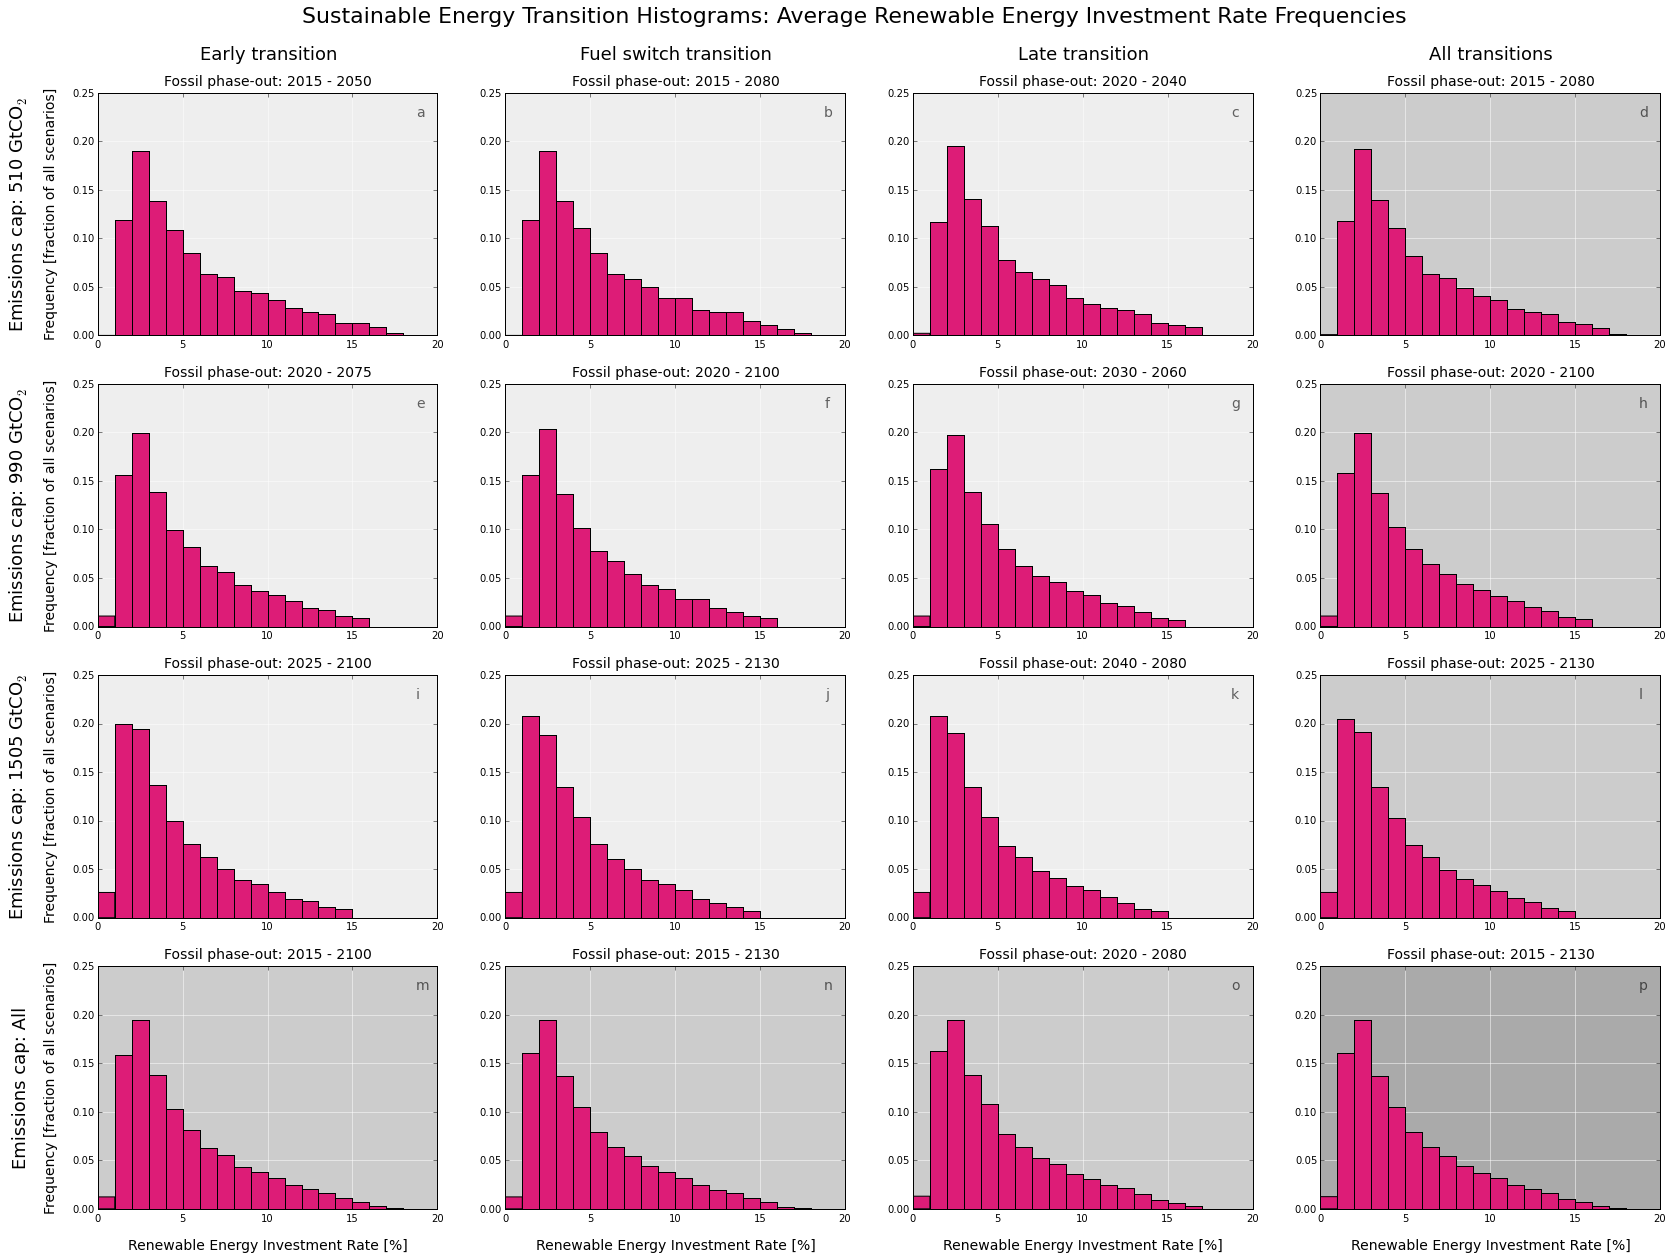

In [260]:
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(4,4,figsize=(28,20),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

master=[]
master1=[[],[],[]]
master2=[[],[],[]]
bins=range(41)

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101]  
    
    for i in range(len(df.columns)):
        if i==0: 
            if k==0: DM=df.copy()
            dk=df.copy()
        else: 
            DM+=df
            dk+=df
    dk/=len(df.columns)
    
    ax[k/3][k%3].hist(dk.mean(),bins=bins,color=histcolor,normed=1)
    
    master1[k/3]=np.append(master1[k/3],dk.mean())
    master2[k%3]=np.append(master2[k%3],dk.mean())
    master=np.append(master,dk.mean())
    
    ax[k/3][k%3].grid(color='white', linestyle='solid')
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('Frequency [fraction of all scenarios]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.2, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18) 
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=14)

ax[3][3].grid(color='white', linestyle='solid')
ax[3][3].set_axis_bgcolor('#AAAAAA')
ax[3][3].text(0.5, 1.02, 'Fossil phase-out: 2015 - 2130',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[3][3].transAxes,size=14)
ax[3][0].text(-0.2, 0.5, 'Emissions cap: All',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[3][0].transAxes,size=18)
ax[3][0].set_ylabel('Frequency [fraction of all scenarios]',size=14,labelpad=15)
ax[0][3].text(0.5, 1.12, 'All transitions',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[0][3].transAxes,size=18)  
ax[3][3].hist(master,bins=bins,color=histcolor,normed=1)
    
    
for i in range(4):
    for j in range(4):
        ax[i][j].set_ylim(0,0.25)
        ax[i][j].set_xlim(0,20)
        ax[i][j].text(0.94, 0.95, abc[i*4+j],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[i][j].transAxes,size=14,alpha=0.6)
    ax[3][i].set_xlabel('Renewable Energy Investment Rate [%]',size=14,labelpad=15)
        
titless2=['Fossil phase-out: 2015 - 2080',
  'Fossil phase-out: 2020 - 2100',
  'Fossil phase-out: 2025 - 2130']
titless3=['Fossil phase-out: 2015 - 2100',
  'Fossil phase-out: 2015 - 2130',
  'Fossil phase-out: 2020 - 2080']
        
for k in range(3):
    ax[3][k].grid(color='white', linestyle='solid')
    ax[k][3].grid(color='white', linestyle='solid')
    ax[k][3].set_axis_bgcolor('#CCCCCC')
    ax[3][k].set_axis_bgcolor('#CCCCCC')
    ax[3][k].text(0.5, 1.02, titless3[k],
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[3][k].transAxes,size=14)
    ax[k][3].text(0.5, 1.02, titless2[k],
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k][3].transAxes,size=14)
    ax[3][k].hist(master2[k],bins=bins,color=histcolor,normed=1)
    ax[k][3].hist(master1[k],bins=bins,color=histcolor,normed=1)    
    
plt.suptitle('Sustainable Energy Transition Histograms: Average Renewable Energy Investment Rate Frequencies',size=22,y=0.96)
plt.savefig(path+'/plots/Histograms_Avg_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
plt.savefig(path+'/plots_highres/Histograms_Avg_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()
DM/=len(order)

#Transition difficulty/feasibility index

Input Distributions

In [9]:
DD=[]
EE=[]
for demand in range(1,22):
    D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))
    DD.append(D)
for eroei in range(21):
    E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))
    EE.append(E)
    
catalog=pd.read_excel('data/parameters/params7.xlsx').set_index('Run')

In [10]:
def epsilon_p(x): #epsilon peak
    lamda=0.5
    mu=10
    return 1-1/(1+np.exp(-lamda*(x-mu)))
def epsilon_a(x): #epsilon average
    lamda=1
    mu=4
    return 1-1/(1+np.exp(-lamda*(x-mu)))
def eroei_p(x):
    lamda=6
    mu=np.log(25)
    return 1-1/(1+np.exp(-lamda*(np.log(x)-mu)))
def demand_p(x):
    lamda=5.5
    mu=np.log(1600)
    return 1/(1+np.exp(-lamda*(np.log(x)-mu)))

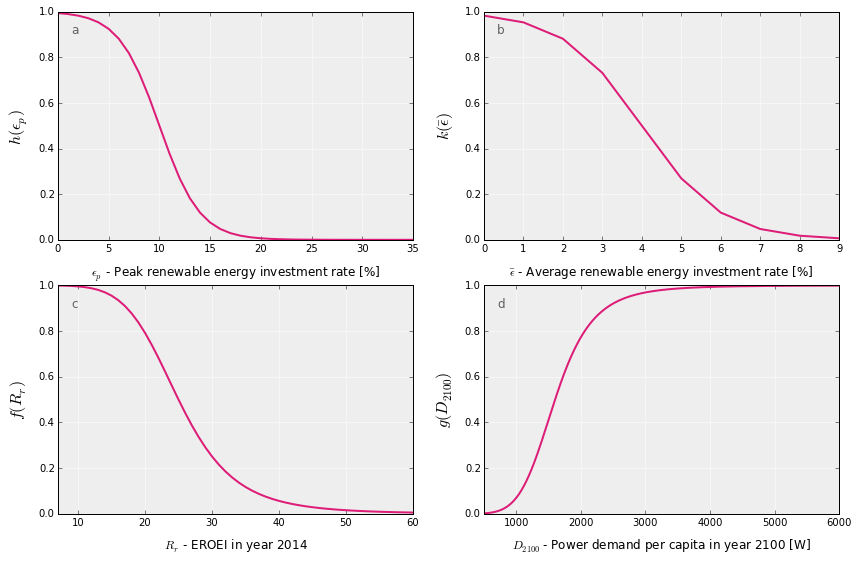

In [70]:
fig, ax = plt.subplots(2,2,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(14,9))

for i in range(2):
    for j in range(2):
        ax[i][j].grid(color='white', linestyle='solid')
        
x=np.arange(36)*1.0
ax[0][0].plot(x,epsilon_p(x),color=histcolor,linewidth=2)
ax[0][0].set_xlabel(r'$\epsilon_p$ - Peak renewable energy investment rate [%]',size=12,labelpad=10)
ax[0][0].set_ylabel(r"$h(\epsilon_p)$",size=16,labelpad=10)

x=np.arange(10)*1.0
ax[0][1].plot(x,epsilon_a(x),color=histcolor,linewidth=2)
ax[0][1].set_xlabel(r'$\bar{\epsilon}$ - Average renewable energy investment rate [%]',size=12,labelpad=10)
ax[0][1].set_ylabel(r"$k(\bar{\epsilon})$",size=16,labelpad=10)

x=7+np.arange(54)*1.0
ax[1][0].plot(x,eroei_p(x),color=histcolor,linewidth=2)
ax[1][0].set_xlabel(r'$R_r$ - EROEI in year 2014',size=12,labelpad=10)
ax[1][0].set_xlim([7,60])
ax[1][0].set_ylabel(r"$f(R_r)$",size=16,labelpad=10)

x=500+np.arange(5501)*1.0
ax[1][1].plot(x,demand_p(x),color=histcolor,linewidth=2)
ax[1][1].set_xlabel(r'$D_{2100}$ - Power demand per capita in year 2100 [W]',size=12,labelpad=10)
ax[1][1].set_xlim([500,6000])
ax[1][1].set_ylabel(r"$g(D_{2100})$",size=16,labelpad=10)

for k in range(4):
    ax[k/2][k%2].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/2][k%2].transAxes,size=12,alpha=0.6)

plt.savefig(path+'/plots/distributions.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=100)
plt.savefig(path+'/plots_highres/distributions.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

EROEI and Demand Sensitivity of Peak and Average Epsilon Indices

Average

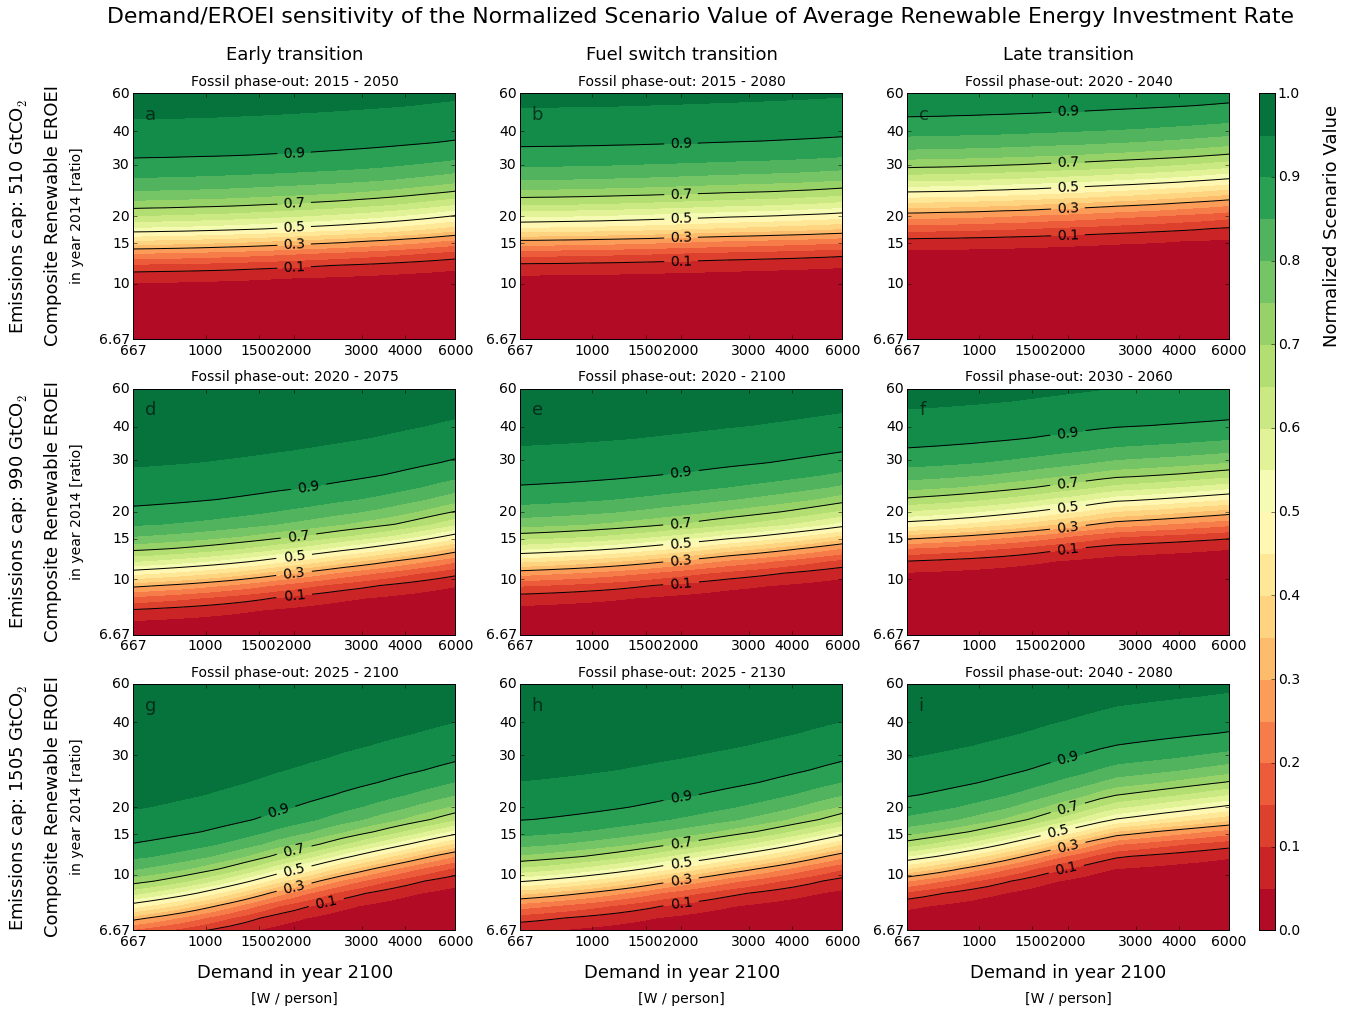

In [266]:
vi=0
vx=1
lev=vx/0.1+1

fig, ax=plt.subplots(3,3,figsize=(21,15))

dz=pd.DataFrame()
        
#reparse real data
for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101] 
    
    dz=pd.DataFrame()
    for i in range(len(df.columns)):
        ee=catalog.loc['wind EROEI'][i+1] #get run eroei
        dd=catalog.loc['final demand'][i+1] #get run demand
        ei=i%21 #get run eroei index
        di=i/21 #get run demand index
        pi=df[[i]].max().values[0] #get epsilon index (max epsilon)
        ai=df[[i]].mean().values[0] #get epsilon index (mean epsilon)

        #transition difficulty index
        tdi =   eroei_p(np.array([ee]))[0]*\
                demand_p(np.array([dd]))[0]*\
                epsilon_p(np.array([pi]))[0]*\
                epsilon_a(np.array([ai]))[0]

        if dd not in dz.columns:
            dz[dd]=1.0
        if ee not in dz.index:
            dz=dz.T
            dz[ee]=1.0
            dz=dz.T
        dz.loc[ee][dd]=epsilon_p(np.array([pi]))[0]
    
    a=ax[k/3][k%3].contourf(dz,levels=np.linspace(vi,vx,(lev-1)*2+1),cmap='RdYlGn')
    b=ax[k/3][k%3].contour(dz,levels=0.1+np.linspace(vi,vx,(lev-1)*0.5+1),colors='k')
    ax[k/3][k%3].clabel(b, fmt = '%.1f',inline=1, fontsize=14)
    ax[k/3][k%3].set_ylim(0,20)
    ax[k/3][k%3].set_xlim(1,21)
    ax[k/3][k%3].set_xticks(np.array([0,4.5,7.8,10,14.2,16.9,20])+1)
    ax[k/3][k%3].set_xticklabels([667,1000,1500,2000,3000,4000,6000],size=14)
    ax[k/3][k%3].set_yticks([0,4.5,7.8,10,14.2,16.9,20])
    ax[k/3][k%3].set_yticklabels([6.67,10,15,20,30,40,60],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Demand in year 2100',size=18,labelpad=15)
        ax[k/3][k%3].text(0.5, -0.25, '[W / person]',
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax[k/3][k%3].transAxes,size=14)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
        ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Normalized Scenario Value',
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.775])
        fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
        cbar_ax.tick_params(labelsize=14) 

plt.suptitle('Demand/EROEI sensitivity of the Normalized Scenario Value of Average Renewable Energy Investment Rate',size=22)
plt.savefig(path+'/plots_highres/Sensitivity_Average_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots/Sensitivity_Average_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

Peak

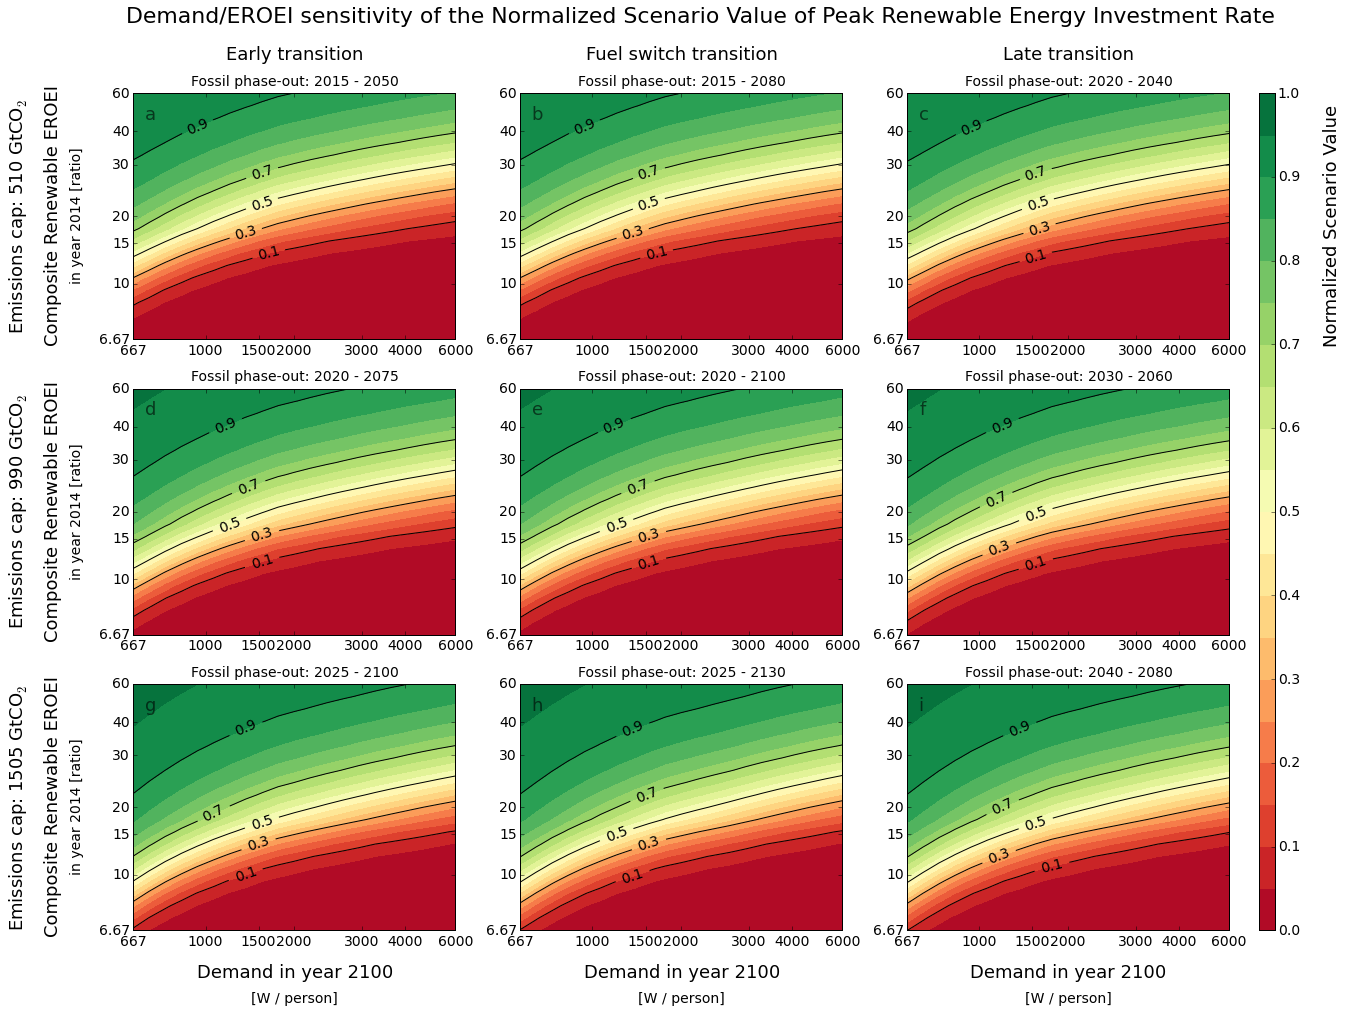

In [267]:
vi=0
vx=1
lev=vx/0.1+1

fig, ax=plt.subplots(3,3,figsize=(21,15))

dz=pd.DataFrame()
        
#reparse real data
for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101] 
    
    dz=pd.DataFrame()
    for i in range(len(df.columns)):
        ee=catalog.loc['wind EROEI'][i+1] #get run eroei
        dd=catalog.loc['final demand'][i+1] #get run demand
        ei=i%21 #get run eroei index
        di=i/21 #get run demand index
        pi=df[[i]].max().values[0] #get epsilon index (max epsilon)
        ai=df[[i]].mean().values[0] #get epsilon index (mean epsilon)

        #transition difficulty index
        tdi =   eroei_p(np.array([ee]))[0]*\
                demand_p(np.array([dd]))[0]*\
                epsilon_p(np.array([pi]))[0]*\
                epsilon_a(np.array([ai]))[0]

        if dd not in dz.columns:
            dz[dd]=1.0
        if ee not in dz.index:
            dz=dz.T
            dz[ee]=1.0
            dz=dz.T
        dz.loc[ee][dd]=epsilon_a(np.array([ai]))[0]
    
    a=ax[k/3][k%3].contourf(dz,levels=np.linspace(vi,vx,(lev-1)*2+1),cmap='RdYlGn')
    b=ax[k/3][k%3].contour(dz,levels=0.1+np.linspace(vi,vx,(lev-1)*0.5+1),colors='k')
    ax[k/3][k%3].clabel(b, fmt = '%.1f',inline=1, fontsize=14)
    ax[k/3][k%3].set_ylim(0,20)
    ax[k/3][k%3].set_xlim(1,21)
    ax[k/3][k%3].set_xticks(np.array([0,4.5,7.8,10,14.2,16.9,20])+1)
    ax[k/3][k%3].set_xticklabels([667,1000,1500,2000,3000,4000,6000],size=14)
    ax[k/3][k%3].set_yticks([0,4.5,7.8,10,14.2,16.9,20])
    ax[k/3][k%3].set_yticklabels([6.67,10,15,20,30,40,60],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Demand in year 2100',size=18,labelpad=15)
        ax[k/3][k%3].text(0.5, -0.25, '[W / person]',
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax[k/3][k%3].transAxes,size=14)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
        ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)        
    if (k==2):
        ax[k/3][k%3].text(1.32, 0.95, 'Normalized Scenario Value',
            horizontalalignment='center',
            verticalalignment='top',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.775])
        fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
        cbar_ax.tick_params(labelsize=14) 

plt.suptitle('Demand/EROEI sensitivity of the Normalized Scenario Value of Peak Renewable Energy Investment Rate',size=22)
plt.savefig(path+'/plots_highres/Sensitivity_Peak_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots/Sensitivity_Peak_Epsilon.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

Surfaces

In [18]:
#get max
dz=pd.DataFrame()
maxi=0
for k in range(len(order)):
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101] 
    
    dz=pd.DataFrame()
    for i in range(len(df.columns)):
        ee=catalog.loc['wind EROEI'][i+1] #get run eroei
        dd=catalog.loc['final demand'][i+1] #get run demand
        ei=i%21 #get run eroei index
        di=i/21 #get run demand index
        pi=df[[i]].max().values[0] #get epsilon index (max epsilon)
        ai=df[[i]].mean().values[0] #get epsilon index (mean epsilon)

        #transition difficulty index
        tdi =   eroei_p(np.array([ee]))[0]*\
                demand_p(np.array([dd]))[0]*\
                epsilon_p(np.array([pi]))[0]*\
                epsilon_a(np.array([ai]))[0]

        if dd not in dz.columns:
            dz[dd]=1.0
        if ee not in dz.index:
            dz=dz.T
            dz[ee]=1.0
            dz=dz.T
        dz.loc[ee][dd]=tdi   
    maxi=max(maxi,max(dz.max()))
    
#colorbar
from matplotlib import cm
levels=20
fillcolors=cm.RdYlGn(np.arange(256))[::(256/(levels-1))]
alpha=0.9

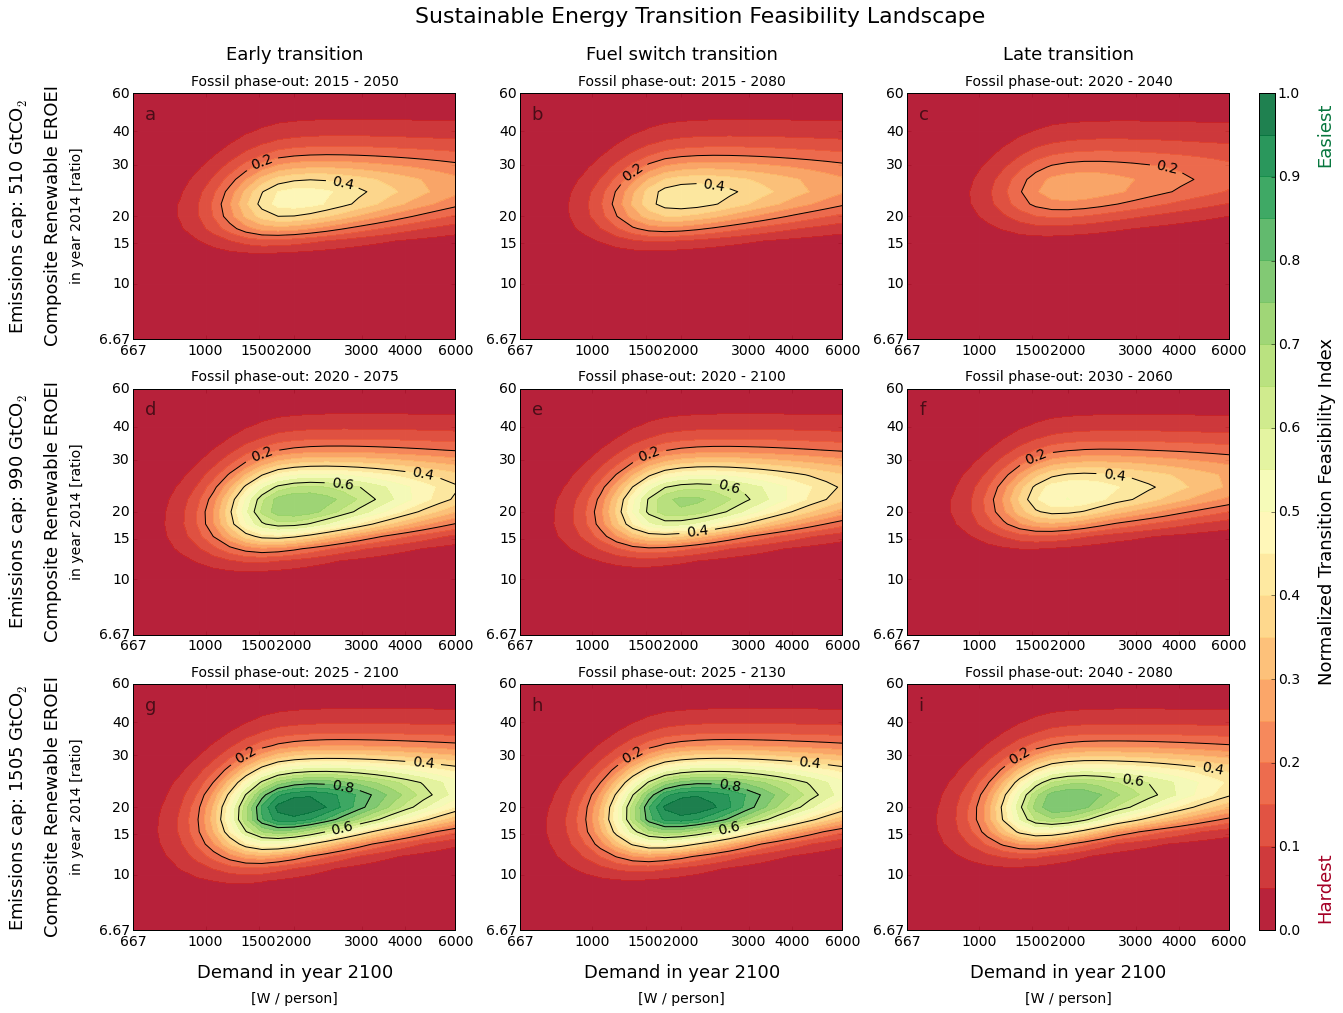

In [17]:
vi=0
vx=1
lev=vx/0.1+1

fig, ax=plt.subplots(3,3,figsize=(21,15),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

dz=pd.DataFrame()

#reparse real data
for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101] 
    
    dz=pd.DataFrame()
    for i in range(len(df.columns)):
        ee=catalog.loc['wind EROEI'][i+1] #get run eroei
        dd=catalog.loc['final demand'][i+1] #get run demand
        ei=i%21 #get run eroei index
        di=i/21 #get run demand index
        pi=df[[i]].max().values[0] #get epsilon index (max epsilon)
        ai=df[[i]].mean().values[0] #get epsilon index (mean epsilon)

        #transition difficulty/feasibility index
        tdi =   eroei_p(np.array([ee]))[0]*\
                demand_p(np.array([dd]))[0]*\
                epsilon_p(np.array([pi]))[0]*\
                epsilon_a(np.array([ai]))[0]

        if dd not in dz.columns:
            dz[dd]=1.0
        if ee not in dz.index:
            dz=dz.T
            dz[ee]=1.0
            dz=dz.T
        dz.loc[ee][dd]=tdi
    
    dz/=maxi
    
    a=ax[k/3][k%3].contourf(dz,levels=np.linspace(vi,vx,(lev-1)*2+1),cmap='RdYlGn',alpha=alpha)
    b=ax[k/3][k%3].contour(dz,levels=0.0+np.linspace(vi,vx,(lev-1)*0.5+1),colors='k')
    ax[k/3][k%3].clabel(b, fmt = '%.1f',inline=1, fontsize=14)
    ax[k/3][k%3].grid(color='white', linestyle='solid')
    ax[k/3][k%3].set_ylim(0,20)
    ax[k/3][k%3].set_xlim(1,21)
    ax[k/3][k%3].set_xticks(np.array([0,4.5,7.8,10,14.2,16.9,20])+1)
    ax[k/3][k%3].set_xticklabels([667,1000,1500,2000,3000,4000,6000],size=14)
    ax[k/3][k%3].set_yticks([0,4.5,7.8,10,14.2,16.9,20])
    ax[k/3][k%3].set_yticklabels([6.67,10,15,20,30,40,60],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Demand in year 2100',size=18,labelpad=15)
        ax[k/3][k%3].text(0.5, -0.25, '[W / person]',
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax[k/3][k%3].transAxes,size=14)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('in year 2014 [ratio]',size=14,labelpad=16)
        ax[k/3][k%3].text(-0.22, 0.5, 'Composite Renewable EROEI',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
        ax[k/3][k%3].text(-0.32, 0.5, cap,
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.775])
        fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], alpha=alpha)
        cbar_ax.tick_params(labelsize=14)         
        cbar_ax.text(4.5, 0.95, 'Easiest',
                horizontalalignment='center',
                verticalalignment='center',rotation=90,
                transform=cbar_ax.transAxes,size=18,color=fillcolors[levels-1])
        cbar_ax.text(4.5, 0.05, 'Hardest',
                horizontalalignment='center',
                verticalalignment='center',rotation=90,
                transform=cbar_ax.transAxes,size=18,color=fillcolors[0])
        cbar_ax.text(4.5, 0.5, 'Normalized Transition Feasibility Index',
                horizontalalignment='center',
                verticalalignment='center',rotation=90,
                transform=cbar_ax.transAxes,size=18,color='k')
        
plt.suptitle('Sustainable Energy Transition Feasibility Landscape',size=22)
plt.savefig(path+'/plots_highres/TDI_Surface.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots/TDI_Surface.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

All scenarios

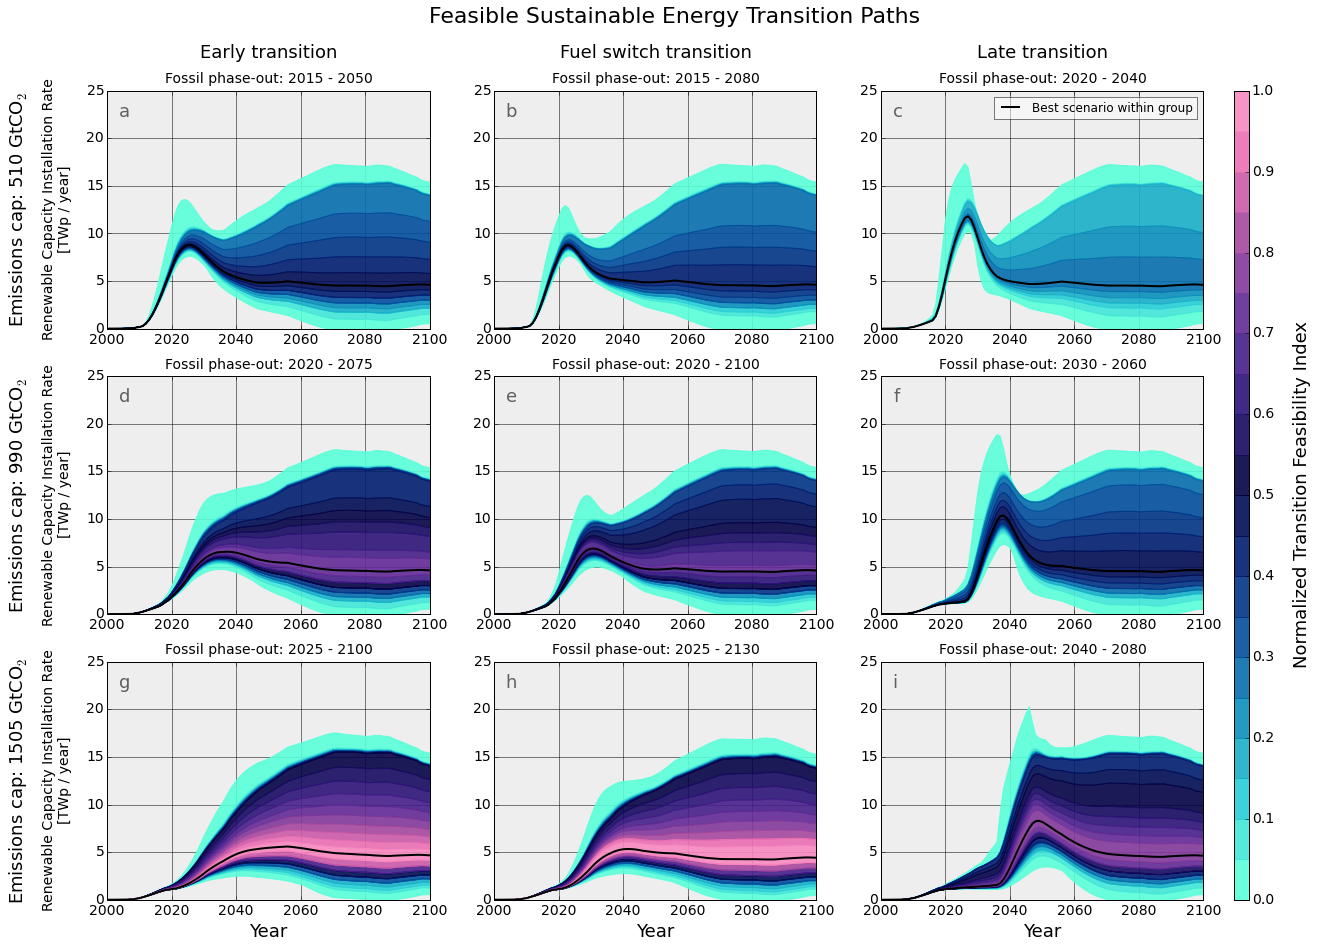

In [47]:
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(3,3,figsize=(21,14.5),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))
demand=10
eroei=9
catalog=pd.read_excel('data/parameters/params7.xlsx').set_index('Run')
maxitdi=0
maxii=0

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101] 
    
    df4=DF[k].copy()
    df4.index=range(1950,2111)
    df5=DF2[k].copy()
    df5.index=range(1950,2111)
    df4+=df5/lifetime
    df4=pd.rolling_mean(df4,moving_window,center=True) 
    df4=df4.loc[2000:2101] 
    
    dk=[pd.DataFrame() for i in range(levels+1)]
    
    for i in range(len(df.columns)):
        ee=catalog.loc['wind EROEI'][i+1] #get run eroei
        dd=catalog.loc['final demand'][i+1] #get run demand
        ei=i%21 #get run eroei index
        di=i/21 #get run demand index
        pi=df[[i]].max().values[0] #get epsilon index (max epsilon)
        ai=df[[i]].mean().values[0] #get epsilon index (mean epsilon)
        
        #transition difficulty index
        tdi =   eroei_p(np.array([ee]))[0]*\
                demand_p(np.array([dd]))[0]*\
                epsilon_p(np.array([pi]))[0]*\
                epsilon_a(np.array([ai]))[0]
        if tdi>maxitdi:
            maxitdi=tdi
            maxii=i
    
        for l in range(levels+1):
            if tdi>l*1.0/levels*maxi: 
                dk[l]=pd.concat([dk[l],df4[[i]]],axis=1)
    
    for l in range(levels):
        try:
            color=1-fillcolors[l]
            if (dk[l+1].empty):
                ax[k/3][k%3].fill_between(dk[l].index,dk[l].T.min(),dk[l].T.max(),\
                                          facecolor=color, edgecolor=color, alpha=alpha)
                ax[k/3][k%3].plot(df.index,df4[[maxii]],c='k',linewidth=2,label="Best scenario within group")
                if k==3:
                    s=df4[[maxii]]
                if k==5:
                    z=df4[[maxii]]
            else:
                ax[k/3][k%3].fill_between(dk[l].index,dk[l].T.min(),dk[l+1].T.min(),\
                                          facecolor=color, edgecolor=color, alpha=alpha)
                ax[k/3][k%3].fill_between(dk[l].index,dk[l+1].T.max(),dk[l].T.max(),\
                                          facecolor=color, edgecolor=color, alpha=alpha)
        except: pass
    
    
    ax[k/3][k%3].grid(color='black', linestyle='solid')
    ax[k/3][k%3].set_ylim(0,25)
    ax[k/3][k%3].set_xlim(2000,2100)
    ax[k/3][k%3].set_yticklabels([0,5,10,15,20,25],size=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('[TWp / year]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.16, 0.5, 'Renewable Capacity Installation Rate ',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(-0.24, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].legend(loc=1,framealpha=0.5)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.775])
cbar_ax.set_xlim(0,1)
cbar_ax.set_ylim(0,1)
for l in range(levels):
    color=1-fillcolors[l]
    cbar_ax.fill_between([0,1],[l*1.0/levels,l*1.0/levels],[(l+1)*1.0/levels,(l+1)*1.0/levels],\
                         facecolor=color, edgecolor=color, alpha=alpha)
cbar_ax.text(4.5, 0.95, 'Easiest',
        horizontalalignment='center',
        verticalalignment='center',rotation=90,
        transform=cbar_ax.transAxes,size=18,color=1-fillcolors[levels-1])
cbar_ax.text(4.5, 0.05, 'Hardest',
        horizontalalignment='center',
        verticalalignment='center',rotation=90,
        transform=cbar_ax.transAxes,size=18,color=1-fillcolors[0])
cbar_ax.text(4.5, 0.5, 'Normalized Transition Feasibility Index',
        horizontalalignment='center',
        verticalalignment='center',rotation=90,
        transform=cbar_ax.transAxes,size=18,color='k')
cbar_ax.yaxis.tick_right()
cbar_ax.set_xticks([])
cbar_ax.set_yticks(np.arange(levels+1)[::2]*1.0/levels)
cbar_ax.tick_params(labelsize=14) 

        
plt.suptitle('Feasible Sustainable Energy Transition Paths',size=22)
#plt.savefig(path+'/plots/TDI_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/TDI_Rates_inv.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

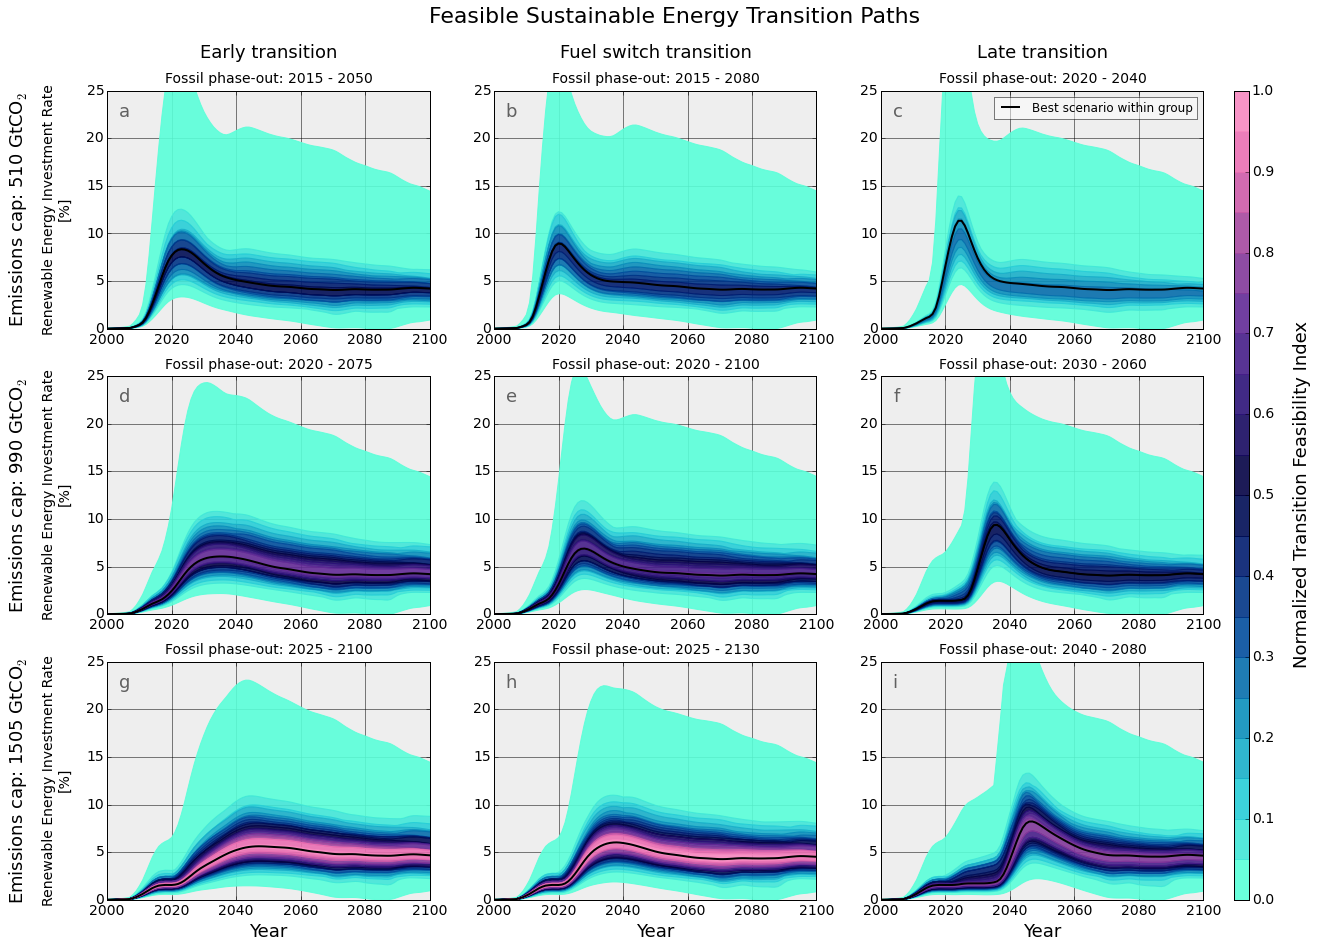

In [104]:
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(3,3,figsize=(21,14.5),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))
demand=10
eroei=9
catalog=pd.read_excel('data/parameters/params7.xlsx').set_index('Run')
maxitdi=0
maxii=0

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101] 
    
    df4=DF[k].copy()
    df4.index=range(1950,2111)
    df5=DF2[k].copy()
    df5.index=range(1950,2111)
    df4+=df5/lifetime
    df4=pd.rolling_mean(df4,moving_window,center=True) 
    df4=df4.loc[2000:2101] 
    
    dk=[pd.DataFrame() for i in range(levels+1)]
    
    for i in range(len(df.columns)):
        ee=catalog.loc['wind EROEI'][i+1] #get run eroei
        dd=catalog.loc['final demand'][i+1] #get run demand
        ei=i%21 #get run eroei index
        di=i/21 #get run demand index
        pi=df[[i]].max().values[0] #get epsilon index (max epsilon)
        ai=df[[i]].mean().values[0] #get epsilon index (mean epsilon)
        
        #transition difficulty index
        tdi =   eroei_p(np.array([ee]))[0]*\
                demand_p(np.array([dd]))[0]*\
                epsilon_p(np.array([pi]))[0]*\
                epsilon_a(np.array([ai]))[0]
        if tdi>maxitdi:
            maxitdi=tdi
            maxii=i
    
        for l in range(levels+1):
            if tdi>l*1.0/levels*maxi: 
                dk[l]=pd.concat([dk[l],df[[i]]],axis=1)
    
    for l in range(levels):
        try:
            color=1-fillcolors[l]
            if (dk[l+1].empty):
                ax[k/3][k%3].fill_between(dk[l].index,dk[l].T.min(),dk[l].T.max(),\
                                          facecolor=color, edgecolor=color, alpha=alpha)
                ax[k/3][k%3].plot(df.index,df[[maxii]],c='k',linewidth=2,label="Best scenario within group")
                if k==3:
                    s=df4[[maxii]]
                if k==5:
                    z=df4[[maxii]]
            else:
                ax[k/3][k%3].fill_between(dk[l].index,dk[l].T.min(),dk[l+1].T.min(),\
                                          facecolor=color, edgecolor=color, alpha=alpha)
                ax[k/3][k%3].fill_between(dk[l].index,dk[l+1].T.max(),dk[l].T.max(),\
                                          facecolor=color, edgecolor=color, alpha=alpha)
        except: pass
    
    
    ax[k/3][k%3].grid(color='black', linestyle='solid')
    ax[k/3][k%3].set_ylim(0,25)
    ax[k/3][k%3].set_xlim(2000,2100)
    ax[k/3][k%3].set_yticklabels([0,5,10,15,20,25],size=14)
    ax[k/3][k%3].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14)
    if (k/3==2):
        ax[k/3][k%3].set_xlabel('Year',size=18)
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('[%]',size=14,labelpad=15)
        ax[k/3][k%3].text(-0.16, 0.5, 'Renewable Energy Investment Rate ',
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=14)
        ax[k/3][k%3].text(-0.24, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    ax[k/3][k%3].text(0.04, 0.95, abc[k],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[k/3][k%3].transAxes,size=18,alpha=0.6)
    if (k==2):
        ax[k/3][k%3].legend(loc=1,framealpha=0.5)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.775])
cbar_ax.set_xlim(0,1)
cbar_ax.set_ylim(0,1)
for l in range(levels):
    color=1-fillcolors[l]
    cbar_ax.fill_between([0,1],[l*1.0/levels,l*1.0/levels],[(l+1)*1.0/levels,(l+1)*1.0/levels],\
                         facecolor=color, edgecolor=color, alpha=alpha)
cbar_ax.text(4.5, 0.95, 'Easiest',
        horizontalalignment='center',
        verticalalignment='center',rotation=90,
        transform=cbar_ax.transAxes,size=18,color=1-fillcolors[levels-1])
cbar_ax.text(4.5, 0.05, 'Hardest',
        horizontalalignment='center',
        verticalalignment='center',rotation=90,
        transform=cbar_ax.transAxes,size=18,color=1-fillcolors[0])
cbar_ax.text(4.5, 0.5, 'Normalized Transition Feasibility Index',
        horizontalalignment='center',
        verticalalignment='center',rotation=90,
        transform=cbar_ax.transAxes,size=18,color='k')
cbar_ax.yaxis.tick_right()
cbar_ax.set_xticks([])
cbar_ax.set_yticks(np.arange(levels+1)[::2]*1.0/levels)
cbar_ax.tick_params(labelsize=14) 

        
plt.suptitle('Feasible Sustainable Energy Transition Paths',size=22)
#plt.savefig(path+'/plots/TDI_Rates.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/TDI_Epsilon_inv.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

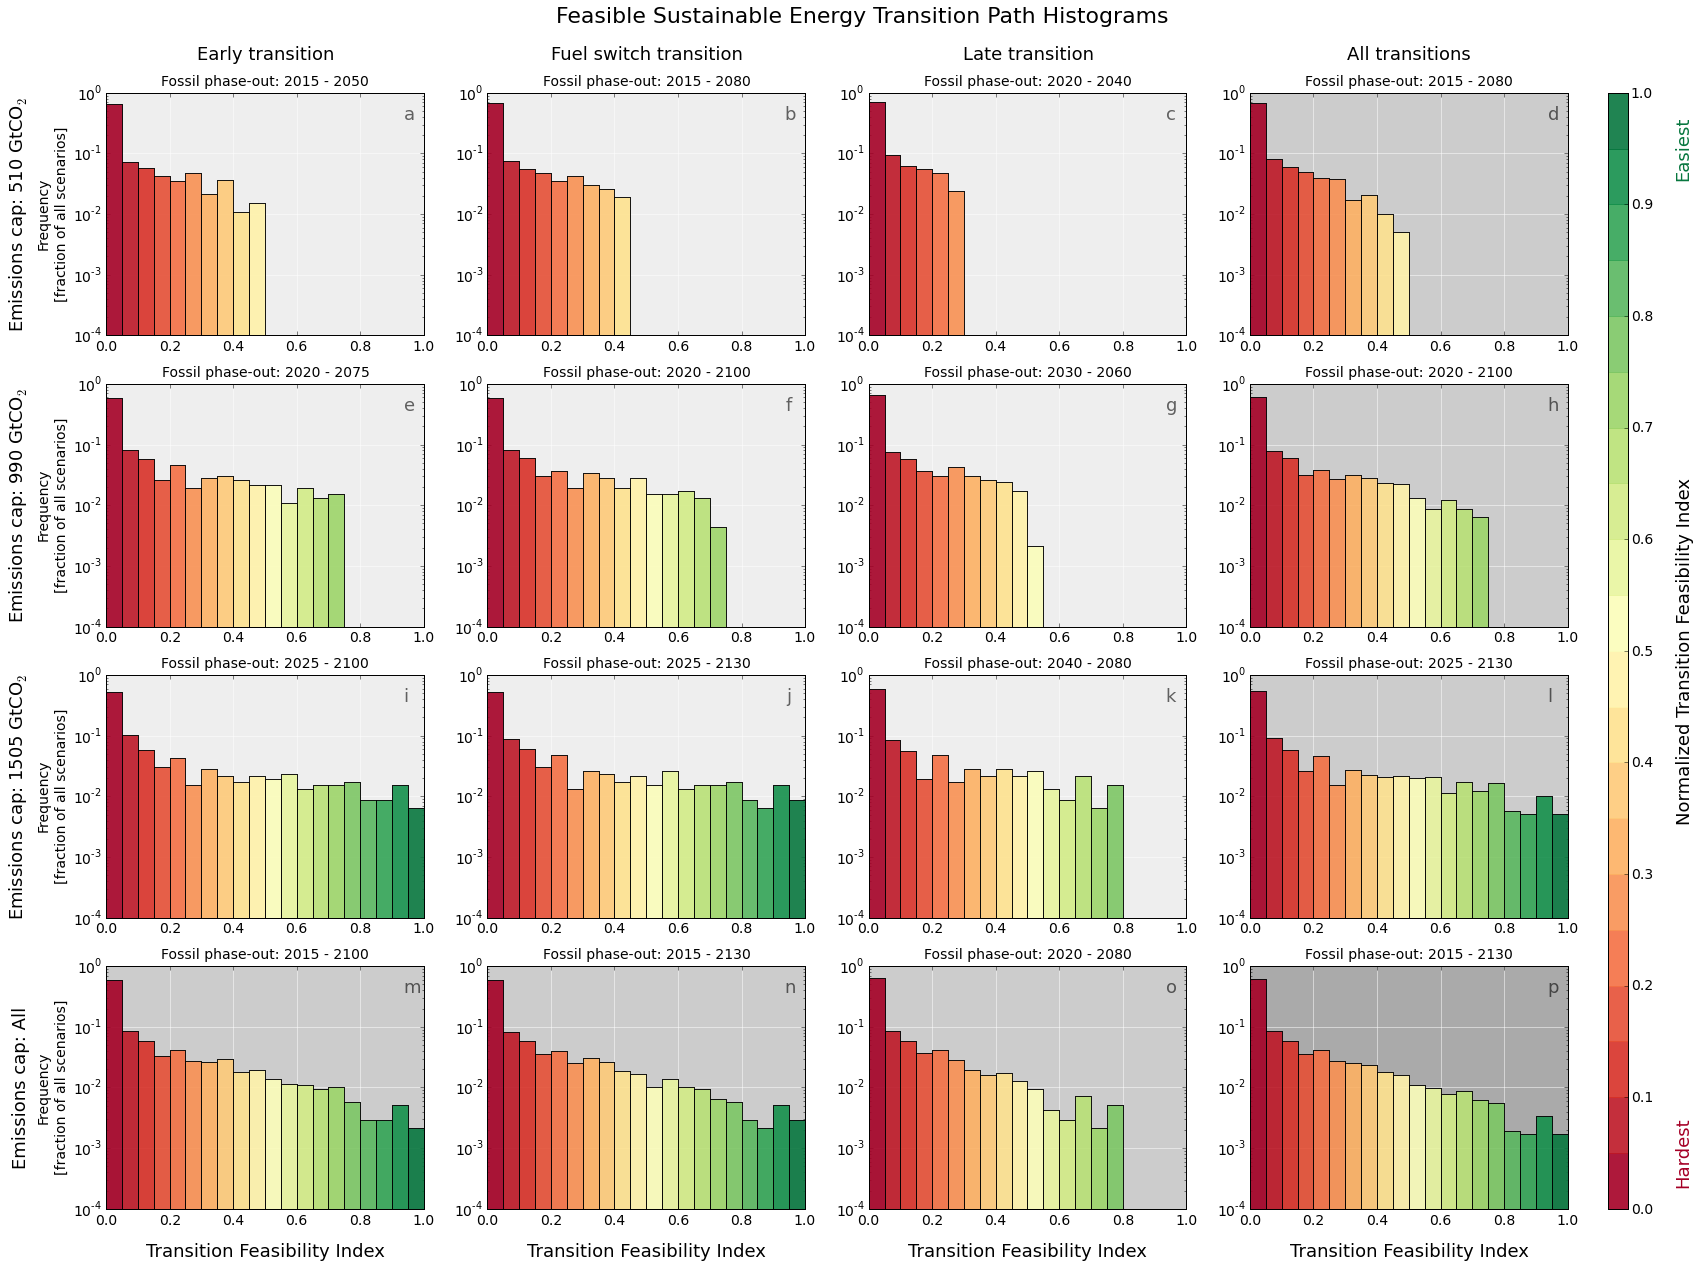

In [139]:
vi=0
vx=15
lev=vx/2.5+1
fig, ax=plt.subplots(4,4,figsize=(28,20),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True))

master=[]
inner=[[] for k in range(len(order))]
master1=[[],[],[]]
master2=[[],[],[]]
bins=np.arange(21)/20.0

for k in range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7
    
    df=DF3[k].copy()
    df.index=range(1950,2111)
    df=df.loc[2000:2101] 
    
    df4=DF[k].copy()
    df4.index=range(1950,2111)
    df5=DF2[k].copy()
    df5.index=range(1950,2111)
    df4+=df5/lifetime
    df4=pd.rolling_mean(df4,moving_window,center=True) 
    df4=df4.loc[2000:2101] 
    
    dk=[pd.DataFrame() for i in range(levels+1)]
    
    for i in range(len(df.columns)):
        ee=catalog.loc['wind EROEI'][i+1] #get run eroei
        dd=catalog.loc['final demand'][i+1] #get run demand
        ei=i%21 #get run eroei index
        di=i/21 #get run demand index
        pi=df[[i]].max().values[0] #get epsilon index (max epsilon)
        ai=df[[i]].mean().values[0] #get epsilon index (mean epsilon)
        
        #transition difficulty index
        tdi =   eroei_p(np.array([ee]))[0]*\
                demand_p(np.array([dd]))[0]*\
                epsilon_p(np.array([pi]))[0]*\
                epsilon_a(np.array([ai]))[0]
        if tdi>maxitdi:
            maxitdi=tdi
            maxii=i
    
        for l in range(levels+1):
            if tdi>l*1.0/levels*maxi: 
                dk[l]=pd.concat([dk[l],df4[[i]]],axis=1)
        
        master1[k/3]=np.append(master1[k/3],tdi*1.0/maxi)
        master2[k%3]=np.append(master2[k%3],tdi*1.0/maxi)
        master=np.append(master,tdi*1.0/maxi)
        inner[k]=np.append(inner[k],tdi*1.0/maxi)
    
    ax[k/3][k%3].grid(color='white', linestyle='solid')
    ax[k/3][k%3].set_yscale('log')
    ax[k/3][k%3].set_ylim(0.0001,1)
    ax[k/3][k%3].tick_params(labelsize=14) 
    if (k%3==0):
        ax[k/3][k%3].set_ylabel('Frequency\n[fraction of all scenarios]',size=14,labelpad=5)
        ax[k/3][k%3].text(-0.24, 0.5, cap,
        horizontalalignment='right',
        verticalalignment='center',rotation=90,
        transform=ax[k/3][k%3].transAxes,size=18)
    if (k/3==0):
        ax[k/3][k%3].text(0.5, 1.12, tran+' transition',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k/3][k%3].transAxes,size=18)
    ax[k/3][k%3].text(0.5, 1.02, title,
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[k/3][k%3].transAxes,size=14)
    
for i in range(4):
    for j in range(4):
        ax[i][j].text(0.94, 0.95, abc[i*4+j],
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[i][j].transAxes,size=18,alpha=0.6)

ax[3][3].grid(color='white', linestyle='solid')
ax[3][3].set_axis_bgcolor('#AAAAAA')
ax[3][3].set_yscale('log')
ax[3][3].set_ylim(0.0001,1)
ax[3][3].tick_params(labelsize=14) 
ax[3][3].text(0.5, 1.02, 'Fossil phase-out: 2015 - 2130',
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[3][3].transAxes,size=14)
ax[3][0].text(-0.24, 0.5, 'Emissions cap: All',
            horizontalalignment='right',
            verticalalignment='center',rotation=90,
            transform=ax[3][0].transAxes,size=18)
ax[3][0].set_ylabel('Frequency\n[fraction of all scenarios]',size=14,labelpad=5)
ax[0][3].text(0.5, 1.12, 'All transitions',
            horizontalalignment='center',
            verticalalignment='bottom',
            transform=ax[0][3].transAxes,size=18)  

#master/=max(np.histogram(master)[0])
for l in range(levels):
    for k in range(len(order)):
        try:
            m=inner[k][((inner[k]>(1.0/levels)*l)&(inner[k]<=(1.0/levels)*(l+1)))]   
            ax[k/3][k%3].bar(np.histogram(m,bins=bins)[1][1:],\
                         np.histogram(m,bins=bins)[0]*1.0/sum(np.histogram(inner[k],bins=bins)[0]),-bins[1],\
                         color=fillcolors[l],alpha=alpha)
        except: pass
    try:
        m=master[((master>(1.0/levels)*l)&(master<=(1.0/levels)*(l+1)))]   
        ax[3][3].bar(np.histogram(m,bins=bins)[1][1:],\
                     np.histogram(m,bins=bins)[0]*1.0/sum(np.histogram(master,bins=bins)[0]),-bins[1],\
                     color=fillcolors[l],alpha=alpha)
    except: pass
    

for i in range(4):
    ax[3][i].set_xlabel('Transition Feasibility Index',size=18,labelpad=15)
        
titless2=['Fossil phase-out: 2015 - 2080',
  'Fossil phase-out: 2020 - 2100',
  'Fossil phase-out: 2025 - 2130']
titless3=['Fossil phase-out: 2015 - 2100',
  'Fossil phase-out: 2015 - 2130',
  'Fossil phase-out: 2020 - 2080']
        
for k in range(3):
    ax[3][k].grid(color='white', linestyle='solid')
    ax[k][3].grid(color='white', linestyle='solid')
    ax[k][3].set_axis_bgcolor('#CCCCCC')
    ax[3][k].set_axis_bgcolor('#CCCCCC')
    ax[k][3].set_yscale('log')
    ax[3][k].set_yscale('log')
    ax[3][k].set_ylim(0.0001,1)
    ax[k][3].set_ylim(0.0001,1)
    ax[k][3].tick_params(labelsize=14) 
    ax[3][k].tick_params(labelsize=14) 
    ax[3][k].text(0.5, 1.02, titless3[k],
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[3][k].transAxes,size=14)
    ax[k][3].text(0.5, 1.02, titless2[k],
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax[k][3].transAxes,size=14)
    for l in range(levels):
        try: 
            m=master2[k][((master2[k]>(1.0/levels)*l)&(master2[k]<=(1.0/levels)*(l+1)))]   
            ax[3][k].bar(np.histogram(m,bins=bins)[1][1:],\
                         np.histogram(m,bins=bins)[0]*1.0/sum(np.histogram(master2[k],bins=bins)[0]),-bins[1],\
                         color=fillcolors[l],alpha=alpha)    
        except: pass
        try: 
            m=master1[k][((master1[k]>(1.0/levels)*l)&(master1[k]<=(1.0/levels)*(l+1)))]   
            ax[k][3].bar(np.histogram(m,bins=bins)[1][1:],\
                         np.histogram(m,bins=bins)[0]*1.0/sum(np.histogram(master1[k],bins=bins)[0]),-bins[1],\
                         color=fillcolors[l],alpha=alpha)
        except: pass

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.125, 0.01, 0.775])
cbar_ax.set_xlim(0,1)
cbar_ax.set_ylim(0,1)
for l in range(levels):
    cbar_ax.fill_between([0,1],[l*1.0/levels,l*1.0/levels],[(l+1)*1.0/levels,(l+1)*1.0/levels],\
                         facecolor=fillcolors[l], edgecolor=fillcolors[l], alpha=alpha)
cbar_ax.text(3.8, 0.95, 'Easiest',
        horizontalalignment='center',
        verticalalignment='center',rotation=90,
        transform=cbar_ax.transAxes,size=18,color=fillcolors[levels-1])
cbar_ax.text(3.8, 0.05, 'Hardest',
        horizontalalignment='center',
        verticalalignment='center',rotation=90,
        transform=cbar_ax.transAxes,size=18,color=fillcolors[0])
cbar_ax.text(3.8, 0.5, 'Normalized Transition Feasibility Index',
        horizontalalignment='center',
        verticalalignment='center',rotation=90,
        transform=cbar_ax.transAxes,size=18,color='k')
cbar_ax.yaxis.tick_right()
cbar_ax.set_xticks([])
cbar_ax.set_yticks(np.arange(levels+1)[::2]*1.0/levels)
cbar_ax.tick_params(labelsize=14) 

plt.suptitle('Feasible Sustainable Energy Transition Path Histograms',size=22,y=0.96)
plt.savefig(path+'/plots/TDI_Histograms.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=50)
plt.savefig(path+'/plots_highres/TDI_Histograms.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

#Cuts

In [49]:
#redefine smooth window
moving_window=12
    
df=pd.read_excel('data/results/cut.xlsx',sheetname='net')
sets={}
for i in df.T.iteritems():
    if np.isnan(i[1][1]):
        l=i[1][0]
        sets[i[1][0]]=[[],[]]
    else: 
        sets[l][0].append(i[1][0])
        sets[l][1].append(i[1][1])
df=pd.read_excel('data/results/cut.xlsx',sheetname='gross')
sets2={}
for i in df.T.iteritems():
    if np.isnan(i[1][1]):
        l=i[1][0]
        sets2[i[1][0]]=[[],[]]
    else: 
        sets2[l][0].append(i[1][0])
        sets2[l][1].append(i[1][1])
sets2.pop('net');
df=pd.read_excel('data/results/cut.xlsx',sheetname='capacity')
sets3={}
for i in df.T.iteritems():
    if np.isnan(i[1][1]):
        l=i[1][0]
        sets3[i[1][0]]=[[],[]]
    else: 
        sets3[l][0].append(i[1][0])
        sets3[l][1].append(i[1][1])    
sets3b={}
for el in sets3:
    sets3b[el]=[[],[]]
    sets3b[el][0]=sets3[el][0]
    z=[sets3[el][1][i+1]-sets3[el][1][i]+sets3[el][1][i]/lifetime for i in range(len(sets3[el][1])-1)]
    z.append(z[::-1][0])
    sets3b[el][1]=pd.rolling_mean(pd.DataFrame(z),moving_window,center=True)[0].values
    sets3b[el][1]=list(sets3b[el][1][:-moving_window/2+1])
    for i in range(moving_window/2-1):
        sets3b[el][1].append(sets3b[el][1][::-1][0]*2-sets3b[el][1][::-1][1])
df=pd.read_excel('data/results/cut.xlsx',sheetname='eps')
sets4={}
for i in df.T.iteritems():
    if np.isnan(i[1][1]):
        l=i[1][0]
        sets4[i[1][0]]=[[],[]]
    else: 
        sets4[l][0].append(i[1][0])
        sets4[l][1].append(i[1][1])
df=pd.read_excel('data/results/cut.xlsx',sheetname='eroei')
sets5={}
for i in df.T.iteritems():
    if np.isnan(i[1][1]):
        l=i[1][0]
        sets5[i[1][0]]=[[],[]]
    else: 
        sets5[l][0].append(i[1][0])
        sets5[l][1].append(i[1][1])
df=pd.read_excel('data/results/cut.xlsx',sheetname='historical_capacity')
sets6={}
for i in df.T.iteritems():
    if np.isnan(i[1][1]):
        l=i[1][0]
        sets6[i[1][0]]=[[],[]]
    else: 
        sets6[l][0].append(i[1][0])
        sets6[l][1].append(i[1][1])

In [50]:
#renewale net adjustment
for i in {u'geoth.',u'wind',u'PV',u'CSP'}:
    sets2[i][1]=np.array(sets2[i][1])-np.array(sets[i][1])

In [51]:
fuels=[u'hydro',u'nuclear',u'biofuels',u'other',u'biomass',u'coal',u'oil',u'gas',u'geoth.',u'wind',u'PV',u'CSP']
#fuelcolors=['#5e4fa2','#3288bd','#66c2a5','#abdda4','#9e0142','#d53e4f','#f46d43','#78c679','#e6f598','#fee08b','#fdae61']
fuelcolors=['#41b6c4','#1d91c0','#225ea8','#253494','#5e4fa2','#7a0177','#ae017e','#dd3497','#a6d96a','#d9ef8b','#fee08b','#fdae61']

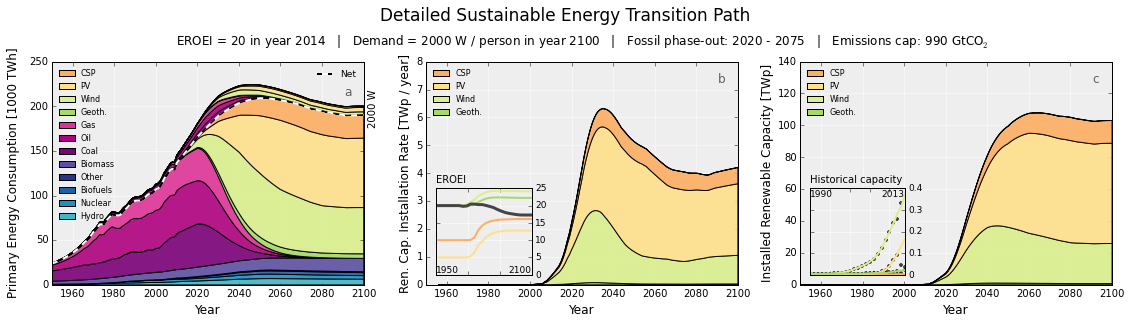

In [346]:
x=sets[u'CSP'][0]
y=[0 for i in range(len(x))]
net=pd.DataFrame([0 for i in range(len(x))])
gross=pd.DataFrame([0 for i in range(len(x))])
labels=[]
fig, ax = plt.subplots(1,3,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(19,4))

#transition
ax[0].text(0.94, 0.89, abc[0],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[0].transAxes,size=12,alpha=0.6)
for i in range(1,3):
    ax[i].text(0.94, 0.95, abc[i],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[i].transAxes,size=12,alpha=0.6)

for i in range(len(fuels[5:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    gross+=pd.DataFrame(sets2[fuel][1])
    y=np.vstack((sets2[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
for i in range(len(fuels)):
    fuel=fuels[::-1][i]
    gross+=pd.DataFrame(sets[fuel][1])
    net+=pd.DataFrame(sets[fuel][1])
    y=np.vstack((sets[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[0].stackplot(x,y,alpha=0.9,colors=fuelcolors+fuelcolors[5:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[5:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[0].legend(proxy[7:], (labels[7:]),loc=2,framealpha=0,fontsize=8) 

ax2=ax[0].twinx()
ax3=ax[0].twinx()
ax2.plot([0],[0],linewidth=2,linestyle='-',color='k',label='Net')
ax3.plot([0],[0],linewidth=2,linestyle='--',color='w',label='    ')
ax2.plot(x,net,linewidth=2,linestyle='--',color='w')

ax[0].grid(color='white', linestyle='solid')
ax[0].set_ylim(0,250000)
ax[0].set_xlim(1950,2100)
ax[0].set_yticklabels([0,50,100,150,200,250],size=10)
ax[0].set_xticklabels([1940,1960,1980,2000,2020,2040,2060,2080,2100],size=10)
ax[0].set_xlabel('Year',size=12)
ax[0].set_ylabel('Primary Energy Consumption [1000 TWh]',size=12,labelpad=10)

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax3.set_yticks([])
ax2.legend(ncol=2,loc=0,framealpha=0,fontsize=9)
ax3.legend(ncol=2,loc=0,framealpha=0,fontsize=9)
ax2.text(1.045, 0.79, '2000 W',
    horizontalalignment='right',
    verticalalignment='center',rotation=90,
    transform=ax2.transAxes,size=10,color='k')

#rates

y=[0 for i in range(len(x))]
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    y=np.vstack((sets3[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[2].stackplot(x,y,alpha=0.9,colors=fuelcolors[8:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors[8:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[2].legend(proxy, (labels),loc=2,framealpha=0,fontsize=8) 
ax[2].grid(color='white', linestyle='solid')
ax[2].set_ylim(0,140)
ax[2].set_xlim(1950,2100)
ax[2].set_yticklabels([0,20,40,60,80,100,120,140],size=10)
ax[2].set_xticklabels([1940,1960,1980,2000,2020,2040,2060,2080,2100],size=10)
ax[2].set_xlabel('Year',size=12)
ax[2].set_ylabel('Installed Renewable Capacity [TWp]',size=12,labelpad=5)

#epsilon

y=[0 for i in range(len(x))]
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    y=np.vstack((sets3b[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[1].stackplot(x,y,alpha=0.9,colors=fuelcolors[8:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors[8:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[1].legend(proxy, (labels),loc=2,framealpha=0,fontsize=8) 
ax[1].grid(color='white', linestyle='solid')
ax[1].set_ylim(0,8)
ax[1].set_xlim(1950,2100)
ax[1].set_yticklabels([0,1,2,3,4,5,6,7,8],size=10)
ax[1].set_xticklabels([1940,1960,1980,2000,2020,2040,2060,2080,2100],size=10)
ax[1].set_xlabel('Year',size=12)
ax[1].set_ylabel('Ren. Cap. Installation Rate [TWp / year]',size=12,labelpad=5)

#eroei
ax[1].text(0.08, 0.47, 'EROEI',
    horizontalalignment='center',
    verticalalignment='center',
    transform=ax[1].transAxes,size=10,color='k')
ax3 = plt.axes([.406, .16, .07, .3], axisbg='#EEEEEE',axisbelow=True)
ax3.tick_params(direction='in')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax4=ax3.twinx()

labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    ax4.plot(sets5[fuel][1],linewidth=2,color=fuelcolors[::-1][i])
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
ax4.plot(sets5[u'Dataset Title 8'][1],linewidth=3,color='#444444') 
ax3.grid(color='white', linestyle='solid')
ax3.set_xticks([0,8.3,16.7,25])
ax4.set_ylim(0,25)
ax4.set_yticklabels([0,5,10,15,20,25],size=9)
ax4.text(0.01, 0, '1950',
    horizontalalignment='left',
    verticalalignment='bottom',
    transform=ax4.transAxes,size=9,color='k')
ax4.text(0.99, 0, '2100',
    horizontalalignment='right',
    verticalalignment='bottom',
    transform=ax4.transAxes,size=9,color='k')

#historical
ax[2].text(0.03, 0.47, 'Historical capacity',
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax[2].transAxes,size=10,color='k')
ax3 = plt.axes([.679, .16, .07, .3], axisbg='#EEEEEE',axisbelow=True)
ax3.tick_params(direction='in')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax4=ax3.twinx()

for i in range(4,8):
    ax4.plot(sets6[u'Dataset Title '+repr(i)][1],linestyle='None',marker='o',markersize=3,color='#444444') 
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    ax4.plot(sets6[fuel][1],linewidth=2,color=fuelcolors[::-1][i])
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
ax3.grid(color='white', linestyle='solid')
ax4.set_xlim(40,64)
ax3.set_xlim(40,64)
ax3.set_xticks([40,45,50,55,60])
ax4.set_ylim(0,0.4)
ax4.set_yticks([0,0.1,0.2,0.3,0.4])
ax3.set_ylim(0,0.4)
ax3.set_yticks([0,0.1,0.2,0.3,0.4])
ax4.set_yticklabels([0,0.1,0.2,0.3,0.4],size=9)
ax4.text(0.01, 0.99, '1990',
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax4.transAxes,size=9,color='k')
ax4.text(0.985, 0.99, '2013',
    horizontalalignment='right',
    verticalalignment='top',
    transform=ax4.transAxes,size=9,color='k')
ax[1].text(0.5, 1.05, r"EROEI = 20 in year 2014   |   Demand = 2000 W / person in year 2100   |   Fossil phase-out: 2020 - 2075   |   Emissions cap: 990 GtCO$_2$",
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[1].transAxes,size=12,color='k')

plt.suptitle('Detailed Sustainable Energy Transition Path',size=17,y=1.09)
plt.savefig(path+'/plots/cut.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/cut.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

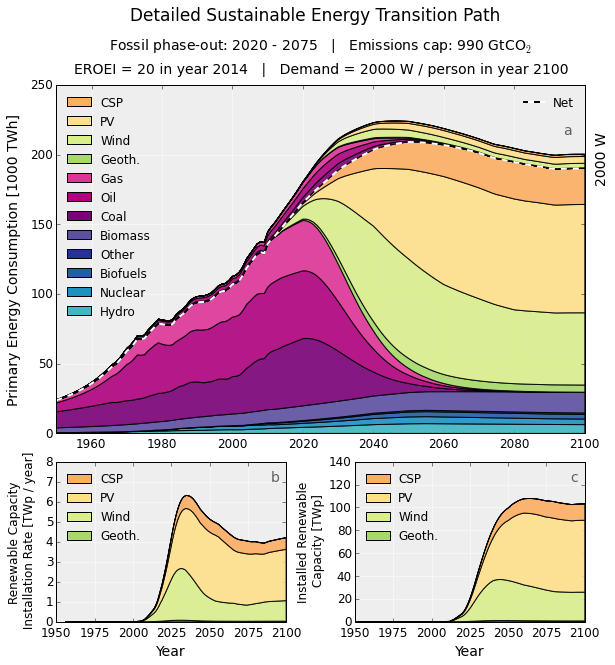

In [347]:
x=sets[u'CSP'][0]
y=[0 for i in range(len(x))]
net=pd.DataFrame([0 for i in range(len(x))])
gross=pd.DataFrame([0 for i in range(len(x))])
labels=[]

fig = plt.figure(figsize=(8,8))                                                               
ax=[]
ax.append(plt.subplot2grid((3,2), (0,0), rowspan=2, colspan=2, axisbg='#EEEEEE',axisbelow=True))
ax.append(plt.subplot2grid((3,2), (2,0), axisbg='#EEEEEE',axisbelow=True))                       
ax.append(plt.subplot2grid((3,2), (2,1), axisbg='#EEEEEE',axisbelow=True))                                            
fig.tight_layout()  
fig.subplots_adjust(wspace=0.3)

#transition
ax[0].text(0.96, 0.89, abc[0],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[0].transAxes,size=14,alpha=0.6)
for i in range(1,3):
    ax[i].text(0.94, 0.95, abc[i],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[i].transAxes,size=14,alpha=0.6)
    
for i in range(len(fuels[5:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    gross+=pd.DataFrame(sets2[fuel][1])
    y=np.vstack((sets2[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
for i in range(len(fuels)):
    fuel=fuels[::-1][i]
    gross+=pd.DataFrame(sets[fuel][1])
    net+=pd.DataFrame(sets[fuel][1])
    y=np.vstack((sets[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[0].stackplot(x,y,alpha=0.9,colors=fuelcolors+fuelcolors[5:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[5:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[0].legend(proxy[7:], (labels[7:]),loc=2,framealpha=0,fontsize=12) 

ax2=ax[0].twinx()
ax3=ax[0].twinx()
ax2.plot([0],[0],linewidth=2,linestyle='-',color='k',label='Net')
ax3.plot([0],[0],linewidth=2,linestyle='--',color='w',label='    ')
ax2.plot(x,net,linewidth=2,linestyle='--',color='w')

ax[0].grid(color='white', linestyle='solid')
ax[0].set_ylim(0,250000)
ax[0].set_xlim(1950,2100)
ax[0].set_yticklabels([0,50,100,150,200,250],size=12)
ax[0].set_xticklabels([1940,1960,1980,2000,2020,2040,2060,2080,2100],size=12)
#ax[0].set_xlabel('Year',size=12)
ax[0].set_ylabel('Primary Energy Consumption [1000 TWh]',size=14,labelpad=10)

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax3.set_yticks([])
ax2.legend(ncol=2,loc=0,framealpha=0,fontsize=12)
ax3.legend(ncol=2,loc=0,framealpha=0,fontsize=12)
ax2.text(1.045, 0.79, '2000 W',
    horizontalalignment='right',
    verticalalignment='center',rotation=90,
    transform=ax2.transAxes,size=14,color='k')

#rates

y=[0 for i in range(len(x))]
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    y=np.vstack((sets3[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[2].stackplot(x,y,alpha=0.9,colors=fuelcolors[8:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors[8:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[2].legend(proxy, (labels),loc=2,framealpha=0,fontsize=12) 
ax[2].grid(color='white', linestyle='solid')
ax[2].set_ylim(0,140)
ax[2].set_xlim(1950,2100)
ax[2].set_yticklabels([0,20,40,60,80,100,120,140],size=12)
y=[1950,1975,2000,2025,2050,2075,2100]
ax[2].set_xticks(y)
ax[2].set_xticklabels(y,size=12)
ax[2].set_xlabel('Year',size=14)
ax[2].set_ylabel('Installed Renewable \n Capacity [TWp]',size=12,labelpad=5)

#epsilon

y=[0 for i in range(len(x))]
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    y=np.vstack((sets3b[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[1].stackplot(x,y,alpha=0.9,colors=fuelcolors[8:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors[8:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[1].legend(proxy, (labels),loc=2,framealpha=0,fontsize=12) 
ax[1].grid(color='white', linestyle='solid')
ax[1].set_ylim(0,8)
ax[1].set_xlim(1950,2100)
ax[1].set_yticklabels([0,1,2,3,4,5,6,7,8],size=12)
y=[1950,1975,2000,2025,2050,2075,2100]
ax[1].set_xticks(y)
ax[1].set_xticklabels(y,size=12)
ax[1].set_xlabel('Year',size=14)
ax[1].set_ylabel('Renewable Capacity \n Installation Rate [TWp / year]',size=12,labelpad=10)
ax[0].text(1.15, 3.54, r"Fossil phase-out: 2020 - 2075   |   Emissions cap: 990 GtCO$_2$",
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[1].transAxes,size=14,color='k')
ax[0].text(1.15, 3.41, r"EROEI = 20 in year 2014   |   Demand = 2000 W / person in year 2100",
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[1].transAxes,size=14,color='k')

plt.suptitle('Detailed Sustainable Energy Transition Path',size=17,y=1.11)
plt.savefig(path+'/plots/cut2.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/cut2.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

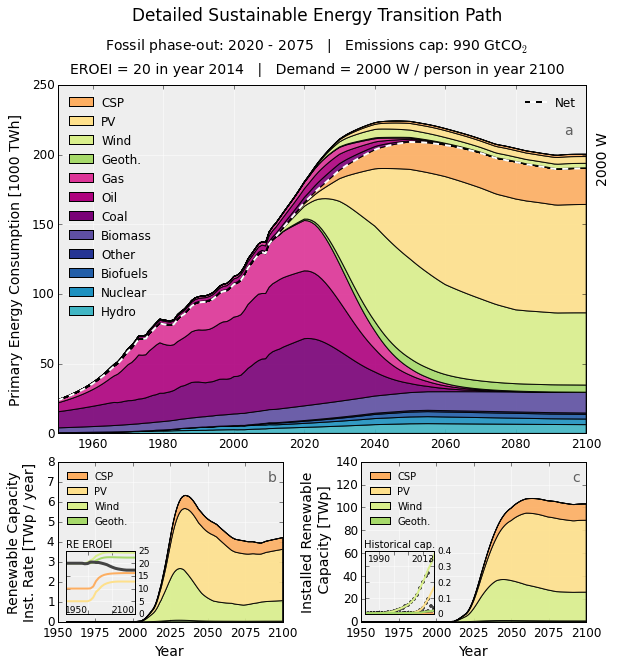

In [350]:
x=sets[u'CSP'][0]
y=[0 for i in range(len(x))]
net=pd.DataFrame([0 for i in range(len(x))])
gross=pd.DataFrame([0 for i in range(len(x))])
labels=[]

fig = plt.figure(figsize=(8,8))                                                               
ax=[]
ax.append(plt.subplot2grid((3,2), (0,0), rowspan=2, colspan=2, axisbg='#EEEEEE',axisbelow=True))
ax.append(plt.subplot2grid((3,2), (2,0), axisbg='#EEEEEE',axisbelow=True))                       
ax.append(plt.subplot2grid((3,2), (2,1), axisbg='#EEEEEE',axisbelow=True))                                            
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

#transition
ax[0].text(0.96, 0.89, abc[0],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[0].transAxes,size=14,alpha=0.6)
for i in range(1,3):
    ax[i].text(0.94, 0.95, abc[i],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[i].transAxes,size=14,alpha=0.6)
    
for i in range(len(fuels[5:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    gross+=pd.DataFrame(sets2[fuel][1])
    y=np.vstack((sets2[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
for i in range(len(fuels)):
    fuel=fuels[::-1][i]
    gross+=pd.DataFrame(sets[fuel][1])
    net+=pd.DataFrame(sets[fuel][1])
    y=np.vstack((sets[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[0].stackplot(x,y,alpha=0.9,colors=fuelcolors+fuelcolors[5:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[5:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[0].legend(proxy[7:], (labels[7:]),loc=2,framealpha=0,fontsize=12) 

ax2=ax[0].twinx()
ax3=ax[0].twinx()
ax2.plot([0],[0],linewidth=2,linestyle='-',color='k',label='Net')
ax3.plot([0],[0],linewidth=2,linestyle='--',color='w',label='    ')
ax2.plot(x,net,linewidth=2,linestyle='--',color='w')

ax[0].grid(color='white', linestyle='solid')
ax[0].set_ylim(0,250000)
ax[0].set_xlim(1950,2100)
ax[0].set_yticklabels([0,50,100,150,200,250],size=12)
ax[0].set_xticklabels([1940,1960,1980,2000,2020,2040,2060,2080,2100],size=12)
#ax[0].set_xlabel('Year',size=12)
ax[0].set_ylabel('Primary Energy Consumption [1000 TWh]',size=14,labelpad=10)

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax3.set_yticks([])
ax2.legend(ncol=2,loc=0,framealpha=0,fontsize=12)
ax3.legend(ncol=2,loc=0,framealpha=0,fontsize=12)
ax2.text(1.045, 0.79, '2000 W',
    horizontalalignment='right',
    verticalalignment='center',rotation=90,
    transform=ax2.transAxes,size=14,color='k')

#rates

y=[0 for i in range(len(x))]
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    y=np.vstack((sets3[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[2].stackplot(x,y,alpha=0.9,colors=fuelcolors[8:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors[8:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[2].legend(proxy, (labels),loc=2,framealpha=0,fontsize=10) 
ax[2].grid(color='white', linestyle='solid')
ax[2].set_ylim(0,140)
ax[2].set_xlim(1950,2100)
ax[2].set_yticklabels([0,20,40,60,80,100,120,140],size=12)
y=[1950,1975,2000,2025,2050,2075,2100]
ax[2].set_xticks(y)
ax[2].set_xticklabels(y,size=12)
ax[2].set_xlabel('Year',size=14)
ax[2].set_ylabel('Installed Renewable \n Capacity [TWp]',size=14,labelpad=5)

#epsilon

y=[0 for i in range(len(x))]
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    y=np.vstack((sets3b[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[1].stackplot(x,y,alpha=0.9,colors=fuelcolors[8:])
proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors[8:])[j-1]) for j,pol in enumerate(sp)][::-1]
ax[1].legend(proxy, (labels),loc=2,framealpha=0,fontsize=10) 
ax[1].grid(color='white', linestyle='solid')
ax[1].set_ylim(0,8)
ax[1].set_xlim(1950,2100)
ax[1].set_yticklabels([0,1,2,3,4,5,6,7,8],size=12)
y=[1950,1975,2000,2025,2050,2075,2100]
ax[1].set_xticks(y)
ax[1].set_xticklabels(y,size=12)
ax[1].set_xlabel('Year',size=14)
ax[1].set_ylabel('Renewable Capacity\nInst. Rate [TWp / year]',size=14,labelpad=10)


#eroei
ax3 = plt.axes([.065, .055, .12, .11], axisbg='#EEEEEE',axisbelow=True)
ax3.tick_params(direction='in')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax4=ax3.twinx()
ax3.text(0, 1.1, 'RE EROEI',
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax3.transAxes,size=10,color='k')


labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    ax4.plot(sets5[fuel][1],linewidth=2,color=fuelcolors[::-1][i])
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
ax4.plot(sets5[u'Dataset Title 8'][1],linewidth=3,color='#444444') 
ax3.grid(color='white', linestyle='solid')
ax3.set_xticks([0,8.3,16.7,25])
ax4.set_ylim(0,25)
ax4.set_yticklabels([0,5,10,15,20,25],size=9)
ax4.text(0.01, 0, '1950',
    horizontalalignment='left',
    verticalalignment='bottom',
    transform=ax4.transAxes,size=9,color='k')
ax4.text(0.99, 0, '2100',
    horizontalalignment='right',
    verticalalignment='bottom',
    transform=ax4.transAxes,size=9,color='k')

#historical
ax3 = plt.axes([.585, .055, .12, .11], axisbg='#EEEEEE',axisbelow=True)
ax3.tick_params(direction='in')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax4=ax3.twinx()
ax3.text(-0.02, 1.1, 'Historical cap.',
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax3.transAxes,size=10,color='k')

for i in range(4,8):
    ax4.plot(sets6[u'Dataset Title '+repr(i)][1],linestyle='None',marker='o',markersize=3,color='#444444') 
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    ax4.plot(sets6[fuel][1],linewidth=2,color=fuelcolors[::-1][i])
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
ax3.grid(color='white', linestyle='solid')
ax4.set_xlim(40,64)
ax3.set_xlim(40,64)
ax3.set_xticks([40,45,50,55,60])
ax4.set_ylim(0,0.4)
ax4.set_yticks([0,0.1,0.2,0.3,0.4])
ax3.set_ylim(0,0.4)
ax3.set_yticks([0,0.1,0.2,0.3,0.4])
ax4.set_yticklabels([0,0.1,0.2,0.3,0.4],size=9)
ax4.text(0.05, 0.95, '1990',
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax4.transAxes,size=9,color='k')
ax4.text(0.985, 0.95, '2013',
    horizontalalignment='right',
    verticalalignment='top',
    transform=ax4.transAxes,size=9,color='k')

ax[0].text(1.15, 3.54, r"Fossil phase-out: 2020 - 2075   |   Emissions cap: 990 GtCO$_2$",
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[1].transAxes,size=14,color='k')
ax[0].text(1.15, 3.41, r"EROEI = 20 in year 2014   |   Demand = 2000 W / person in year 2100",
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[1].transAxes,size=14,color='k')

plt.suptitle('Detailed Sustainable Energy Transition Path',size=17,y=1.11)
plt.savefig(path+'/plots/cut2_inset.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/cut2_inset.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

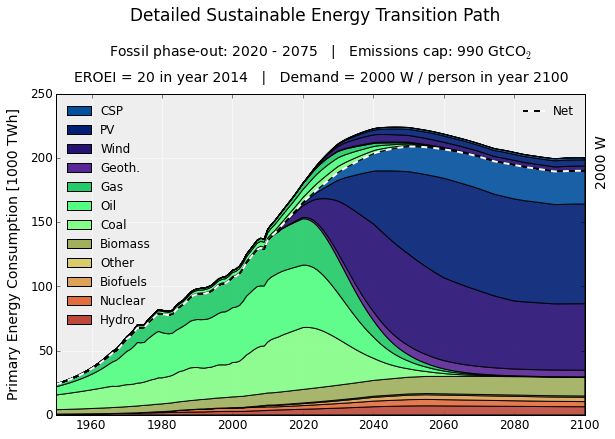

In [62]:
x=sets[u'CSP'][0]
y=[0 for i in range(len(x))]
net=pd.DataFrame([0 for i in range(len(x))])
gross=pd.DataFrame([0 for i in range(len(x))])
labels=[]

fig = plt.figure(figsize=(8,5))                                                               
ax=[]
ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg='#EEEEEE',axisbelow=True))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

for i in range(len(fuels[5:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    gross+=pd.DataFrame(sets2[fuel][1])
    y=np.vstack((sets2[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
for i in range(len(fuels)):
    fuel=fuels[::-1][i]
    gross+=pd.DataFrame(sets[fuel][1])
    net+=pd.DataFrame(sets[fuel][1])
    y=np.vstack((sets[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[0].stackplot(x,y,alpha=0.9,colors=[1-np.array(mpl.colors.hex2color(i)) for i in fuelcolors+fuelcolors[5:]])
proxy = [mpl.patches.Rectangle((0,0), 0,0, \
            facecolor=1-np.array(mpl.colors.hex2color((fuelcolors+fuelcolors[5:])[j-1]))) for j,pol in enumerate(sp)][::-1]
ax[0].legend(proxy[7:], (labels[7:]),loc=2,framealpha=0,fontsize=12) 

ax2=ax[0].twinx()
ax3=ax[0].twinx()
ax2.plot([0],[0],linewidth=2,linestyle='-',color='k',label='Net')
ax3.plot([0],[0],linewidth=2,linestyle='--',color='w',label='    ')
ax2.plot(x,net,linewidth=2,linestyle='--',color='w')

ax[0].grid(color='white', linestyle='solid')
ax[0].set_ylim(0,250000)
ax[0].set_xlim(1950,2100)
ax[0].set_yticklabels([0,50,100,150,200,250],size=12)
ax[0].set_xticklabels([1940,1960,1980,2000,2020,2040,2060,2080,2100],size=12)
#ax[0].set_xlabel('Year',size=12)
ax[0].set_ylabel('Primary Energy Consumption [1000 TWh]',size=14,labelpad=10)

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax3.set_yticks([])
ax2.legend(ncol=2,loc=0,framealpha=0,fontsize=12)
ax3.legend(ncol=2,loc=0,framealpha=0,fontsize=12)
ax2.text(1.045, 0.79, '2000 W',
    horizontalalignment='right',
    verticalalignment='center',rotation=90,
    transform=ax2.transAxes,size=14,color='k')

ax[0].text(0.5, 1.1, r"Fossil phase-out: 2020 - 2075   |   Emissions cap: 990 GtCO$_2$",
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[0].transAxes,size=14,color='k')
ax[0].text(0.5, 1.03, r"EROEI = 20 in year 2014   |   Demand = 2000 W / person in year 2100",
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[0].transAxes,size=14,color='k')

plt.suptitle('Detailed Sustainable Energy Transition Path',size=17,y=1.2)
#plt.savefig(path+'/plots/cut3.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/cut3_inv.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

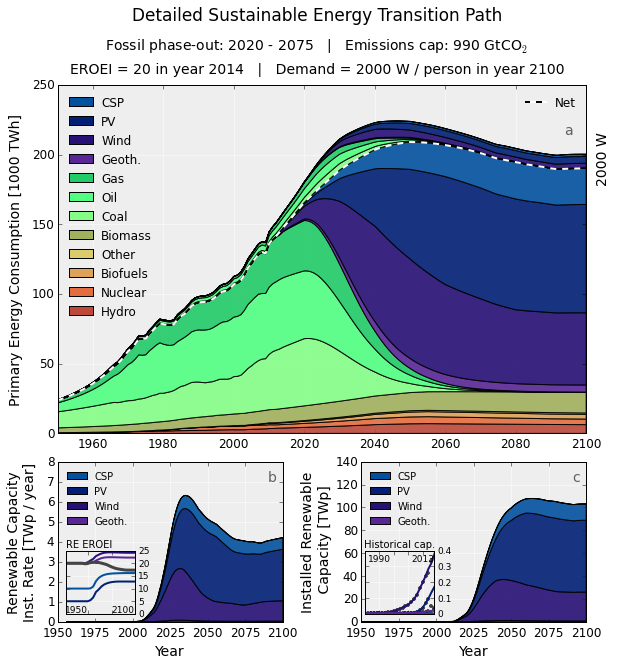

In [103]:
x=sets[u'CSP'][0]
y=[0 for i in range(len(x))]
net=pd.DataFrame([0 for i in range(len(x))])
gross=pd.DataFrame([0 for i in range(len(x))])
labels=[]

fig = plt.figure(figsize=(8,8))                                                               
ax=[]
ax.append(plt.subplot2grid((3,2), (0,0), rowspan=2, colspan=2, axisbg='#EEEEEE',axisbelow=True))
ax.append(plt.subplot2grid((3,2), (2,0), axisbg='#EEEEEE',axisbelow=True))                       
ax.append(plt.subplot2grid((3,2), (2,1), axisbg='#EEEEEE',axisbelow=True))                                            
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

#transition
ax[0].text(0.96, 0.89, abc[0],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[0].transAxes,size=14,alpha=0.6)
for i in range(1,3):
    ax[i].text(0.94, 0.95, abc[i],
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax[i].transAxes,size=14,alpha=0.6)
    
for i in range(len(fuels[5:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    gross+=pd.DataFrame(sets2[fuel][1])
    y=np.vstack((sets2[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
for i in range(len(fuels)):
    fuel=fuels[::-1][i]
    gross+=pd.DataFrame(sets[fuel][1])
    net+=pd.DataFrame(sets[fuel][1])
    y=np.vstack((sets[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[0].stackplot(x,y,alpha=0.9,colors=[1-np.array(mpl.colors.hex2color(i)) for i in fuelcolors+fuelcolors[5:]])
proxy = [mpl.patches.Rectangle((0,0), 0,0, \
            facecolor=1-np.array(mpl.colors.hex2color((fuelcolors+fuelcolors[5:])[j-1]))) for j,pol in enumerate(sp)][::-1]
ax[0].legend(proxy[7:], (labels[7:]),loc=2,framealpha=0,fontsize=12) 

ax2=ax[0].twinx()
ax3=ax[0].twinx()
ax2.plot([0],[0],linewidth=2,linestyle='-',color='k',label='Net')
ax3.plot([0],[0],linewidth=2,linestyle='--',color='w',label='    ')
ax2.plot(x,net,linewidth=2,linestyle='--',color='w')

ax[0].grid(color='white', linestyle='solid')
ax[0].set_ylim(0,250000)
ax[0].set_xlim(1950,2100)
ax[0].set_yticklabels([0,50,100,150,200,250],size=12)
ax[0].set_xticklabels([1940,1960,1980,2000,2020,2040,2060,2080,2100],size=12)
#ax[0].set_xlabel('Year',size=12)
ax[0].set_ylabel('Primary Energy Consumption [1000 TWh]',size=14,labelpad=10)

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax3.set_yticks([])
ax2.legend(ncol=2,loc=0,framealpha=0,fontsize=12)
ax3.legend(ncol=2,loc=0,framealpha=0,fontsize=12)
ax2.text(1.045, 0.79, '2000 W',
    horizontalalignment='right',
    verticalalignment='center',rotation=90,
    transform=ax2.transAxes,size=14,color='k')

#rates

y=[0 for i in range(len(x))]
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    y=np.vstack((sets3[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[2].stackplot(x,y,alpha=0.9,colors=[1-np.array(mpl.colors.hex2color(i)) for i in fuelcolors[8:]])
proxy = [mpl.patches.Rectangle((0,0), 0,0, \
            facecolor=1-np.array(mpl.colors.hex2color((fuelcolors[8:])[j-1]))) for j,pol in enumerate(sp)][::-1]
ax[2].legend(proxy, (labels),loc=2,framealpha=0,fontsize=10) 
ax[2].grid(color='white', linestyle='solid')
ax[2].set_ylim(0,140)
ax[2].set_xlim(1950,2100)
ax[2].set_yticklabels([0,20,40,60,80,100,120,140],size=12)
y=[1950,1975,2000,2025,2050,2075,2100]
ax[2].set_xticks(y)
ax[2].set_xticklabels(y,size=12)
ax[2].set_xlabel('Year',size=14)
ax[2].set_ylabel('Installed Renewable \n Capacity [TWp]',size=14,labelpad=5)

#epsilon

y=[0 for i in range(len(x))]
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    y=np.vstack((sets3b[fuel][1],y)) 
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
    
sp=ax[1].stackplot(x,y,alpha=0.9,colors=[1-np.array(mpl.colors.hex2color(i)) for i in fuelcolors[8:]])
proxy = [mpl.patches.Rectangle((0,0), 0,0, \
            facecolor=1-np.array(mpl.colors.hex2color((fuelcolors[8:])[j-1]))) for j,pol in enumerate(sp)][::-1]
ax[1].legend(proxy, (labels),loc=2,framealpha=0,fontsize=10) 
ax[1].grid(color='white', linestyle='solid')
ax[1].set_ylim(0,8)
ax[1].set_xlim(1950,2100)
ax[1].set_yticklabels([0,1,2,3,4,5,6,7,8],size=12)
y=[1950,1975,2000,2025,2050,2075,2100]
ax[1].set_xticks(y)
ax[1].set_xticklabels(y,size=12)
ax[1].set_xlabel('Year',size=14)
ax[1].set_ylabel('Renewable Capacity\nInst. Rate [TWp / year]',size=14,labelpad=10)


#eroei
ax3 = plt.axes([.065, .055, .12, .11], axisbg='#EEEEEE',axisbelow=True)
ax3.tick_params(direction='in')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax4=ax3.twinx()
ax3.text(0, 1.1, 'RE EROEI',
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax3.transAxes,size=10,color='k')


labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    ax4.plot(sets5[fuel][1],linewidth=2,color=1-np.array(mpl.colors.hex2color(fuelcolors[::-1][i])))
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
ax4.plot(sets5[u'Dataset Title 8'][1],linewidth=3,color='#444444') 
ax3.grid(color='white', linestyle='solid')
ax3.set_xticks([0,8.3,16.7,25])
ax4.set_ylim(0,25)
ax4.set_yticklabels([0,5,10,15,20,25],size=9)
ax4.text(0.01, 0, '1950',
    horizontalalignment='left',
    verticalalignment='bottom',
    transform=ax4.transAxes,size=9,color='k')
ax4.text(0.99, 0, '2100',
    horizontalalignment='right',
    verticalalignment='bottom',
    transform=ax4.transAxes,size=9,color='k')

#historical
ax3 = plt.axes([.585, .055, .12, .11], axisbg='#EEEEEE',axisbelow=True)
ax3.tick_params(direction='in')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax4=ax3.twinx()
ax3.text(-0.02, 1.1, 'Historical cap.',
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax3.transAxes,size=10,color='k')

for i in range(4,8):
    ax4.plot(sets6[u'Dataset Title '+repr(i)][1],linestyle='None',marker='o',markersize=3,color='#444444') 
labels=[]
for i in range(len(fuels[8:])):
    fuel=fuels[::-1][i]
    if fuel==u'geoth.':fuel='geo'
    ax4.plot(sets6[fuel][1],linewidth=2,color=1-np.array(mpl.colors.hex2color(fuelcolors[::-1][i])))
    if fuel not in {u'PV',u'CSP'}:
        fuel=fuel.capitalize()
    labels.append(fuel)
ax3.grid(color='white', linestyle='solid')
ax4.set_xlim(40,64)
ax3.set_xlim(40,64)
ax3.set_xticks([40,45,50,55,60])
ax4.set_ylim(0,0.4)
ax4.set_yticks([0,0.1,0.2,0.3,0.4])
ax3.set_ylim(0,0.4)
ax3.set_yticks([0,0.1,0.2,0.3,0.4])
ax4.set_yticklabels([0,0.1,0.2,0.3,0.4],size=9)
ax4.text(0.05, 0.95, '1990',
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax4.transAxes,size=9,color='k')
ax4.text(0.985, 0.95, '2013',
    horizontalalignment='right',
    verticalalignment='top',
    transform=ax4.transAxes,size=9,color='k')

ax[0].text(1.15, 3.54, r"Fossil phase-out: 2020 - 2075   |   Emissions cap: 990 GtCO$_2$",
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[1].transAxes,size=14,color='k')
ax[0].text(1.15, 3.41, r"EROEI = 20 in year 2014   |   Demand = 2000 W / person in year 2100",
    horizontalalignment='center',
    verticalalignment='bottom',
    transform=ax[1].transAxes,size=14,color='k')

plt.suptitle('Detailed Sustainable Energy Transition Path',size=17,y=1.11)
#plt.savefig(path+'/plots/cut2_inset.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.savefig(path+'/plots_highres/cut2_inset_inv.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

<p><br><p>We would like to express our gratitude to all of the developers of the libraries used and especially to the affiliates of <i>EIA, BP and World Bank</i> for their great database and openly accesible data. The data manipulation algorithms are open sourced and freely reproducible under an <a href="http://opensource.org/licenses/MIT" target="_blank">MIT license</a>.</p>
<br>
<p><a href="http://www.csaladen.es" target="_blank">Dénes Csala</a>&nbsp;&nbsp;|&nbsp;&nbsp;2015</p>